In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle

In [5]:
train_data = pd.read_csv(r"C:\Users\user\Desktop\Disorder\dataset\train.csv")
test_data=pd.read_csv(r"C:\Users\user\Desktop\Disorder\dataset\test.csv")
df_train=train_data.copy()
df_test=test_data.copy()

In [7]:
df_train.tail()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
22078  PID0x5598          4.0                    Yes                   Yes   
22079  PID0x19cb          8.0                     No                   Yes   
22080  PID0x3c4f          8.0                    Yes                    No   
22081   PID0x13a          7.0                    Yes                    No   
22082  PID0x9332         11.0                    Yes                    No   

      Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
22078           Yes            No                5.258298               Lynn   
22079            No           Yes                4.974220            Matthew   
22080           Yes            No                5.186470               John   
22081           Yes           Yes                4.858543             Sharon   
22082            No            No                4.738067             Andrew   

      Family Name Father's name  ...  Birth defects  \
22078         NaN     Alhassane  ...       Multiple   
22079      Farley     Dartanion  ...       Multiple   
22080         NaN        Cavani  ...       Singular   
22081         NaN         Bomer  ...       Multiple   
22082        Mose          Eban  ...       Singular   

       White Blood cell count (thousand per microliter) Blood test result  \
22078                                          6.584811      inconclusive   
22079                                          7.041556      inconclusive   
22080                                          7.715464            normal   
22081                                          8.437670          abnormal   
22082                                         11.188371            normal   

      Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
22078       0.0       0.0       1.0       0.0        0.0   
22079       1.0       1.0       1.0       1.0        0.0   
22080       0.0       0.0       0.0       1.0        NaN   
22081       1.0       1.0       1.0       0.0        0.0   
22082       1.0       0.0       1.0       1.0        1.0   

                                   Genetic Disorder       Disorder Subclass  
22078   Mitochondrial genetic inheritance disorders          Leigh syndrome  
22079  Multifactorial genetic inheritance disorders                Diabetes  
22080   Mitochondrial genetic inheritance disorders  Mitochondrial myopathy  
22081                                           NaN          Leigh syndrome  
22082  Multifactorial genetic inheritance disorders                Diabetes  

[5 rows x 45 columns]

In [9]:
df_train.head()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [13]:
df_train.describe()

Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  20656.000000            22083.000000  16047.000000  16097.000000   
mean       6.974148                4.898871     34.526454     41.972852   
std        4.319475                0.199663      9.852598     13.035501   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763109     26.000000     31.000000   
50%        7.000000                4.899399     35.000000     42.000000   
75%       11.000000                5.033830     43.000000     53.000000   
max       14.000000                5.609829     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion  \
count  19956.0  19931.0  19936.0  19943.0  19913.0              19921.000000   
mean       0.0      0.0      0.0      1.0      0.0                  2.003062   
std        0.0      0.0      0.0      0.0      0.0                  1.411919   
min        0.0      0.0      0.0      1.0      0.0                  0.000000   
25%        0.0      0.0      0.0      1.0      0.0                  1.000000   
50%        0.0      0.0      0.0      1.0      0.0                  2.000000   
75%        0.0      0.0      0.0      1.0      0.0                  3.000000   
max        0.0      0.0      0.0      1.0      0.0                  4.000000   

       White Blood cell count (thousand per microliter)     Symptom 1  \
count                                      19935.000000  19928.000000   
mean                                           7.486224      0.592483   
std                                            2.653393      0.491385   
min                                            3.000000      0.000000   
25%                                            5.424703      0.000000   
50%                                            7.477132      1.000000   
75%                                            9.526152      1.000000   
max                                           12.000000      1.000000   

          Symptom 2     Symptom 3     Symptom 4     Symptom 5  
count  19861.000000  19982.000000  19970.000000  19930.000000  
mean       0.551886      0.536233      0.497747      0.461917  
std        0.497313      0.498698      0.500007      0.498560  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        1.000000      1.000000      0.000000      0.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

In [15]:
df_train.describe(include="object")

Patient Id Genes in mother's side Inherited from father Maternal gene  \
count       22083                  22083                 21777         19273   
unique      22083                      2                     2             2   
top     PID0x6418                    Yes                    No           Yes   
freq            1                  13143                 13133         10647   

       Paternal gene Patient First Name Family Name Father's name  \
count          22083              22083       12392         22083   
unique             2               2524        6282         16368   
top               No              James       Smith       Clardie   
freq           12508                420         157             6   

        Institute Name Location of Institute  ...  \
count            16977                 22083  ...   
unique              27                    26  ...   
top     Not applicable                     -  ...   
freq              8440                 10931  ...   

       Folic acid details (peri-conceptional) H/O serious maternal illness  \
count                                   19966                        19931   
unique                                      2                            2   
top                                       Yes                           No   
freq                                    10087                        10012   

       H/O radiation exposure (x-ray) H/O substance abuse  \
count                           19930               19888   
unique                              4                   4   
top                    Not applicable                   -   
freq                             5029                5042   

       Assisted conception IVF/ART  \
count                        19961   
unique                           2   
top                            Yes   
freq                         10012   

       History of anomalies in previous pregnancies Birth defects  \
count                                         19911         19929   
unique                                            2             2   
top                                             Yes      Singular   
freq                                          10082          9977   

        Blood test result                             Genetic Disorder  \
count               19938                                        19937   
unique                  4                                            3   
top     slightly abnormal  Mitochondrial genetic inheritance disorders   
freq                 5128                                        10202   

       Disorder Subclass  
count              19915  
unique                 9  
top       Leigh syndrome  
freq                5160  

[4 rows x 29 columns]

In [17]:
df_train.duplicated().count()


22083

In [19]:
df_train.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [21]:
# Calculate the percentage of missing values
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
print(missing_percentage)

Patient Id                                           0.000000
Patient Age                                          6.461984
Genes in mother's side                               0.000000
Inherited from father                                1.385681
Maternal gene                                       12.724720
Paternal gene                                        0.000000
Blood cell count (mcL)                               0.000000
Patient First Name                                   0.000000
Family Name                                         43.884436
Father's name                                        0.000000
Mother's age                                        27.333243
Father's age                                        27.106824
Institute Name                                      23.121858
Location of Institute                                0.000000
Status                                               0.000000
Respiratory Rate (breaths/min)                       9.731468
Heart Ra

In [23]:
df_train[df_train.isnull().all(1)].shape

(0, 45)

In [25]:
df_test[df_test.isnull().all(1)].shape


(0, 43)

In [27]:
df_train.isnull().sum().sort_values(ascending=False).head(10)


Family Name                                     9691
Mother's age                                    6036
Father's age                                    5986
Institute Name                                  5106
Autopsy shows birth defect (if applicable)      4392
Maternal gene                                   2810
Symptom 2                                       2222
H/O substance abuse                             2195
Gender                                          2173
History of anomalies in previous pregnancies    2172
dtype: int64

In [29]:
df_train['Genetic Disorder'].value_counts()


Genetic Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64

In [31]:
df_train['Disorder Subclass'].value_counts()


Disorder Subclass
Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: count, dtype: int64

In [33]:
for col in df_train.select_dtypes(include=["object"]):
    print(f"{df_train[col].value_counts()}\n")


Patient Id
PID0x6418    1
PID0x41cf    1
PID0x5b6c    1
PID0x42a8    1
PID0x869f    1
            ..
PID0x11ec    1
PID0x4737    1
PID0x8a5b    1
PID0x33b2    1
PID0x9332    1
Name: count, Length: 22083, dtype: int64

Genes in mother's side
Yes    13143
No      8940
Name: count, dtype: int64

Inherited from father
No     13133
Yes     8644
Name: count, dtype: int64

Maternal gene
Yes    10647
No      8626
Name: count, dtype: int64

Paternal gene
No     12508
Yes     9575
Name: count, dtype: int64

Patient First Name
James        420
John         372
Robert       355
Mary         329
Michael      321
            ... 
Sharice        1
Shasta         1
Maryalice      1
Roxann         1
Cathrine       1
Name: count, Length: 2524, dtype: int64

Family Name
Smith       157
Williams    106
Johnson      99
Brown        90
Jones        81
           ... 
Losey         1
Muldrow       1
Randell       1
Clouser       1
Mose          1
Name: count, Length: 6282, dtype: int64

Father's name
Clardie

In [ ]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

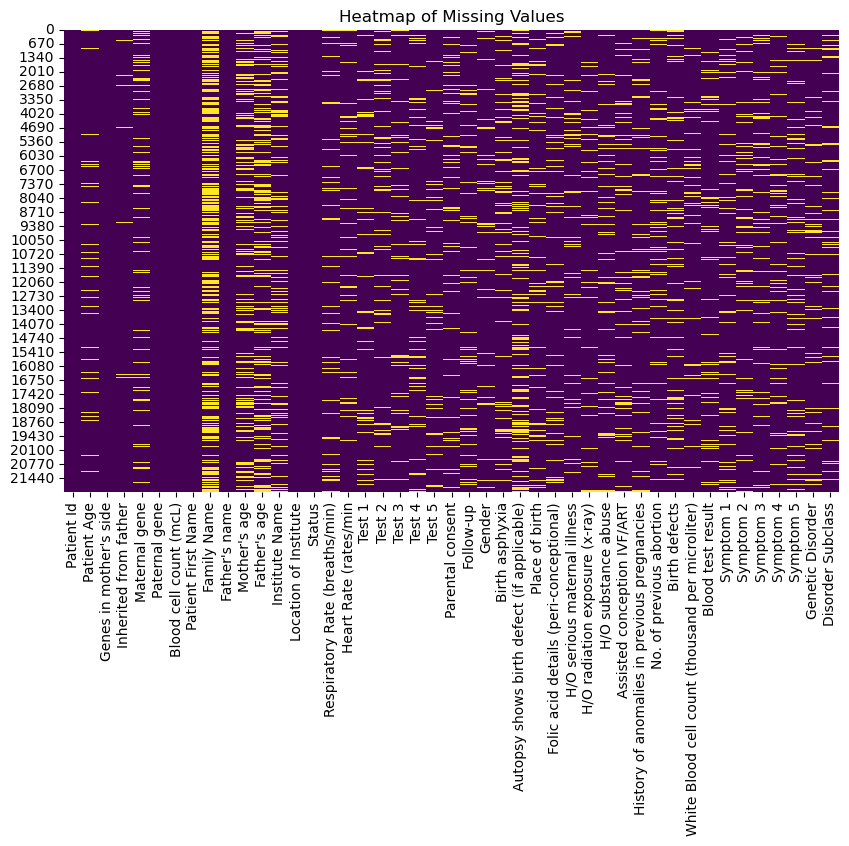

In [35]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

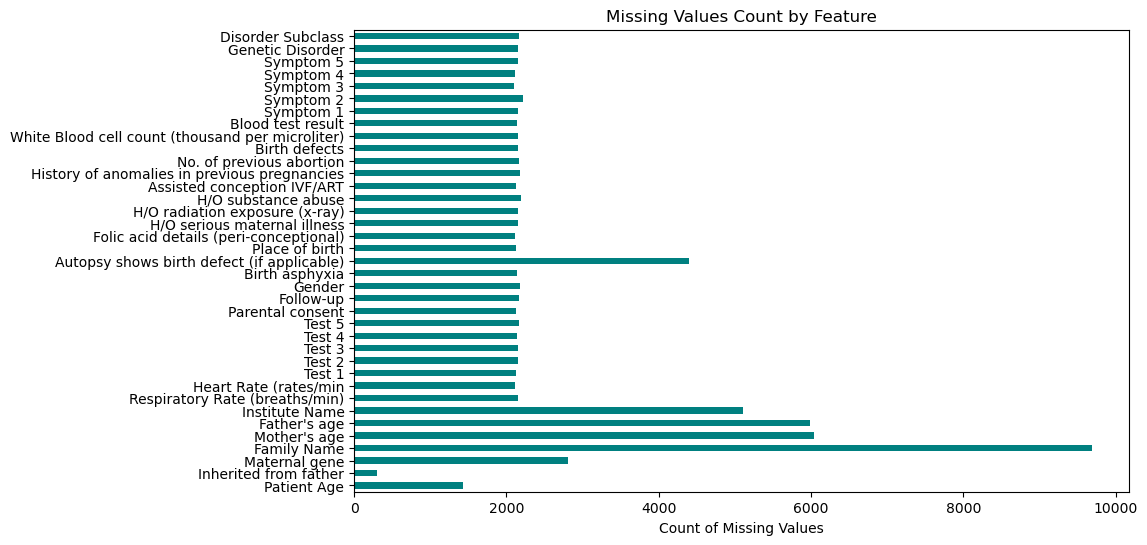

In [37]:
# Bar plot to show the count of missing values per column
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10,6))
missing_values.plot(kind='barh', color='teal')
plt.title('Missing Values Count by Feature')
plt.xlabel('Count of Missing Values')
plt.show()

preprocessing

In [39]:
def preprocess_data(df):
    # Drop rows where all values are NaN
    df = df.dropna(how='all')



    columns_to_drop = [
        "Patient Id",
        "Family Name",
        "Institute Name",
        "Patient First Name",
        "Father's name",
        "Location of Institute",
        "Parental consent",
        "Test 1",
        "Test 2",
        "Test 3",
        "Test 4",
        "Test 5",
        "Mother's age",
        "Father's age"
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    cat_columns = ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']
    # Convert the spe   cified columns to categorical
    for col in cat_columns:
                df[col] = df[col].astype('object')
    # Disorder mapping
    disorder_mapping = {
        "Leber's hereditary optic neuropathy": "Mitochondrial genetic inheritance disorders",
        "Leigh syndrome": "Mitochondrial genetic inheritance disorders",
        "Mitochondrial myopathy": "Mitochondrial genetic inheritance disorders",
        "Alzheimer's": "Multifactorial genetic inheritance disorders",
        "Cancer": "Multifactorial genetic inheritance disorders",
        "Diabetes": "Multifactorial genetic inheritance disorders",
        "Cystic fibrosis": "Single-gene inheritance diseases",
        "Hemochromatosis": "Single-gene inheritance diseases",
        "Tay-Sachs": "Single-gene inheritance diseases",
    }

     # Fill missing 'Genetic Disorder' based on 'Disorder Subclass'
    def fill_genetic_disorder(row):
        if pd.isnull(row["Genetic Disorder"]) and row["Disorder Subclass"] in disorder_mapping:
            return disorder_mapping[row["Disorder Subclass"]]
        else:
            return row["Genetic Disorder"]

    df["Genetic Disorder"] = df.apply(fill_genetic_disorder, axis=1)

    # Fill missing values in 'Genetic Disorder' and 'Disorder Subclass'
    def fill_missing_values(df):
        # Fill missing 'Genetic Disorder' based on 'Disorder Subclass'
        for subclass in df['Disorder Subclass'].dropna().unique():
            mode_genetic_disorder = df[df['Disorder Subclass'] == subclass]['Genetic Disorder'].mode()
            if not mode_genetic_disorder.empty:
                df.loc[
                    (df['Disorder Subclass'] == subclass) & (df['Genetic Disorder'].isnull()),
                           'Genetic Disorder'
                ] = mode_genetic_disorder[0]

        # Fill missing 'Disorder Subclass' based on 'Genetic Disorder'
        for disorder in df['Genetic Disorder'].dropna().unique():
            mode_disorder_subclass = df[df['Genetic Disorder'] == disorder]['Disorder Subclass'].mode()
            if not mode_disorder_subclass.empty:
                df.loc[
                    (df['Genetic Disorder'] == disorder) & (df['Disorder Subclass'].isnull()),
                    'Disorder Subclass'
                ] = mode_disorder_subclass[0]

        return df
    df = fill_missing_values(df)

    # Drop rows where either 'Genetic Disorder' or 'Disorder Subclass' is NaN
    df = df.dropna(subset=["Genetic Disorder", "Disorder Subclass"])

    # Fill null values in each group
    grouped = df.groupby(["Genetic Disorder", "Disorder Subclass"])

    def fill_nulls(group):
        for column in group.columns:
            if group[column].isnull().any():
                if group[column].dtype == 'object':
                    mode_value = group[column].mode()
                    if not mode_value.empty:
                        group[column] = group[column].fillna(mode_value[0])
                else:
                    median_value = group[column].median()
                    group[column] = group[column].fillna(median_value)
        return group

    df_filled = grouped.apply(fill_nulls).reset_index(drop=True)

    # Define values to replace with 'Missing'
    missing_values = ["No record", "Not available", "Not applicable", "-", "Ambiguous"]

    # Replace specified values with 'Missing' in categorical columns
    categorical_cols = df_filled.select_dtypes(include='object').columns
    for col in categorical_cols:
        df_filled[col] = df_filled[col].replace(missing_values, 'Missing')
    df_filled['Symptom Count'] = df_filled[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].sum(axis=1)
    df_filled.drop(columns=['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True)
    df_filled['Total Blood Cell Count'] = df_filled['Blood cell count (mcL)'] + df_filled['White Blood cell count (thousand per microliter)']
    df_filled.drop(columns=['Blood cell count (mcL)', 'White Blood cell count (thousand per microliter)'], inplace=True)
    df_filled['Combined_disorder'] = df_filled.apply(lambda row: f"{row['Genetic Disorder'].replace(' ', '_')}_"f"{row['Disorder Subclass'].replace(' ', '_')}",
    axis=1)
    return df_filled

# Example usage:
df_train = preprocess_data(df_train)


                
    

C:\Users\user\AppData\Local\Temp\ipykernel_12660\1921529023.py:86: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[column] = group[column].fillna(mode_value[0])
C:\Users\user\AppData\Local\Temp\ipykernel_12660\1921529023.py:92: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = grouped.apply(fill_nulls).reset_index(drop=True)


In [41]:
df_train.isnull().sum().head()  # now we donot have any nulls in our data


Patient Age               0
Genes in mother's side    0
Inherited from father     0
Maternal gene             0
Paternal gene             0
dtype: int64

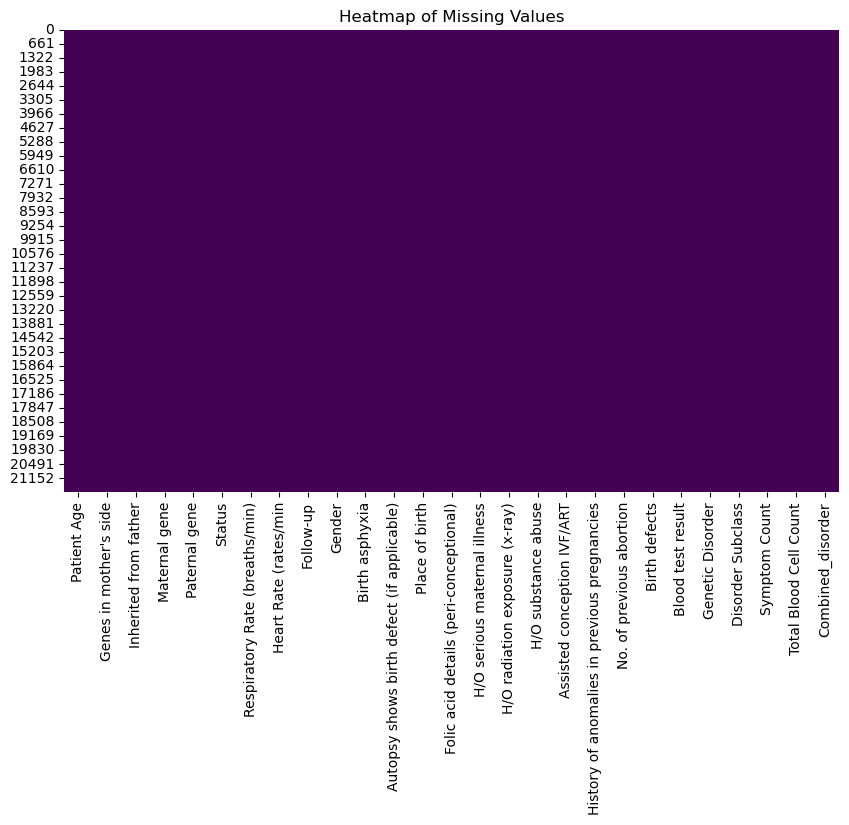

In [43]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [48]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

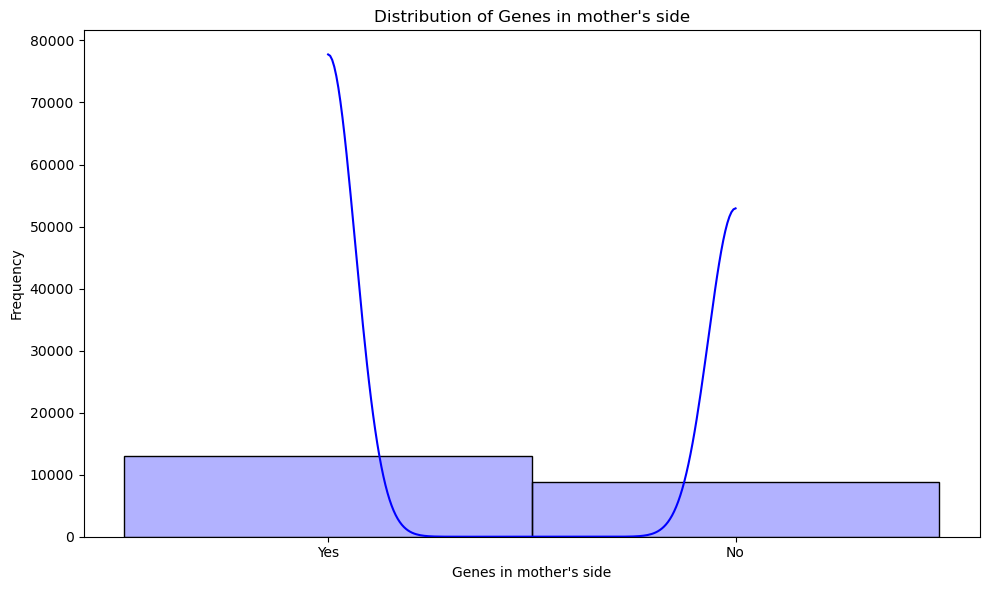

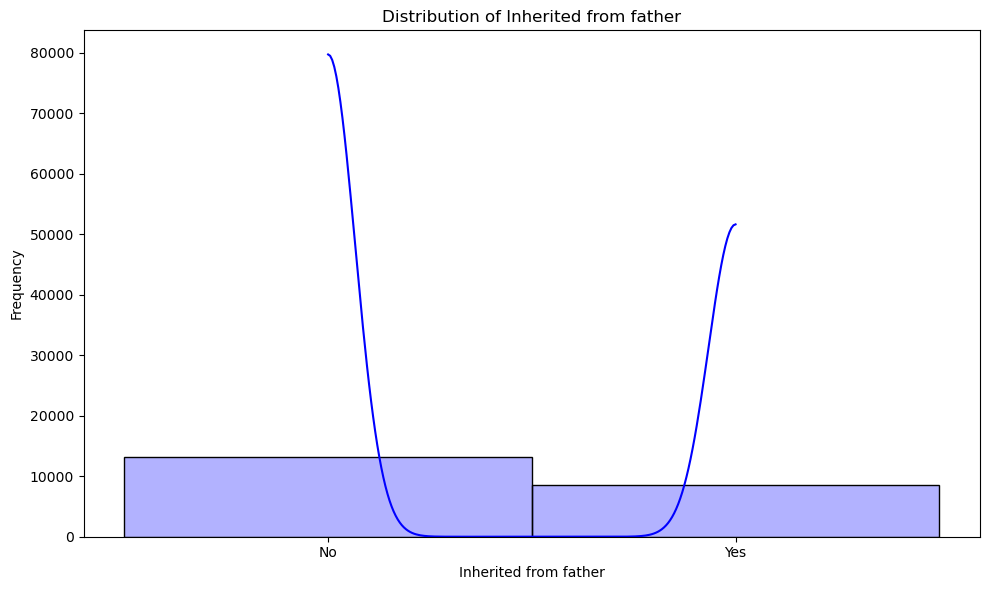

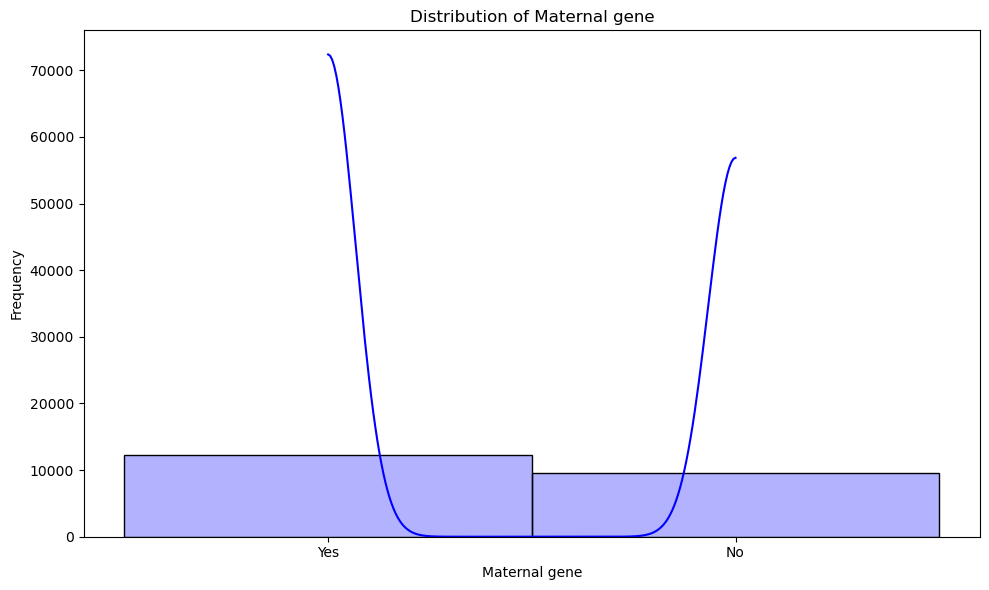

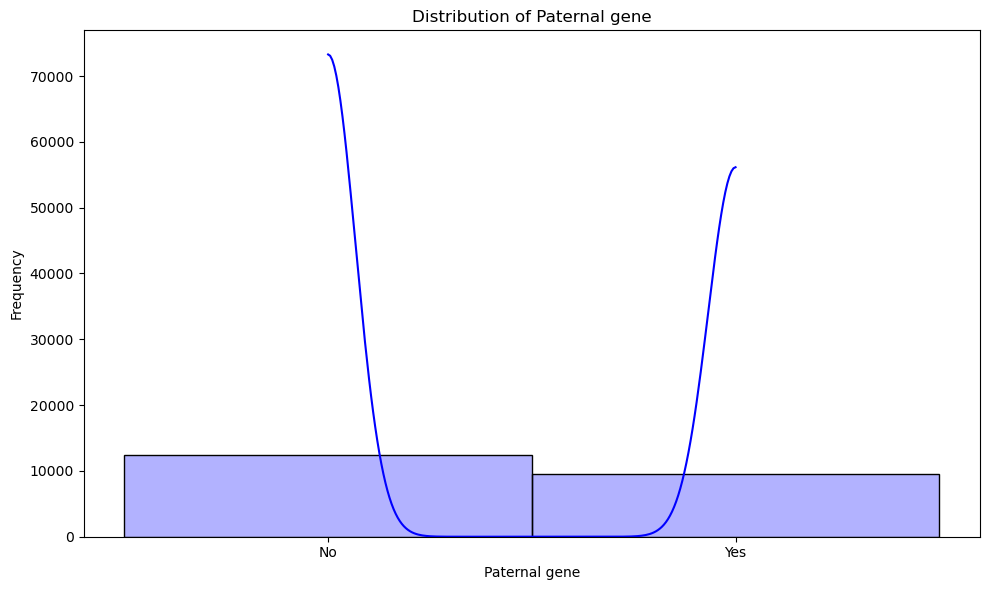

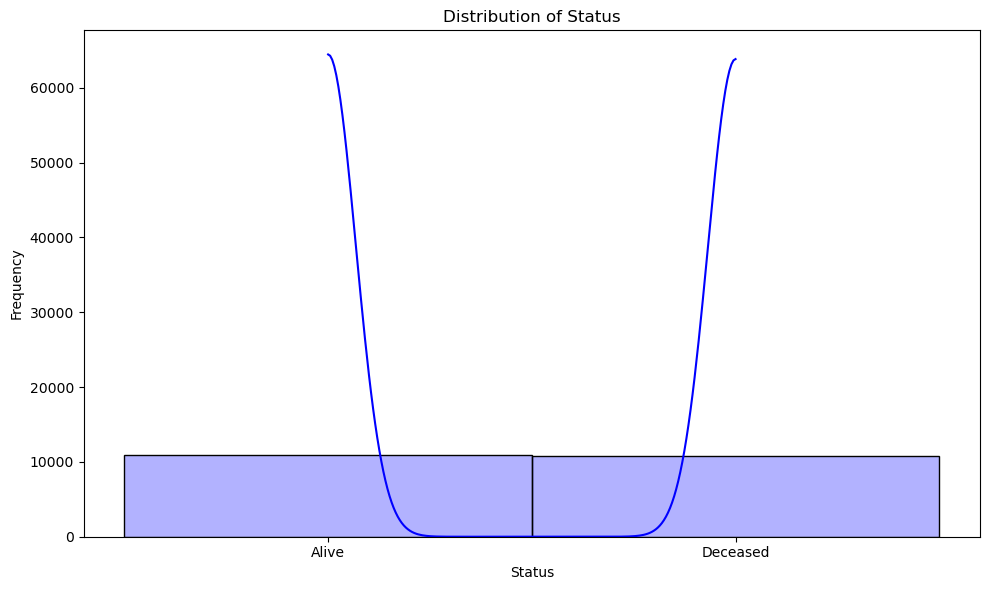

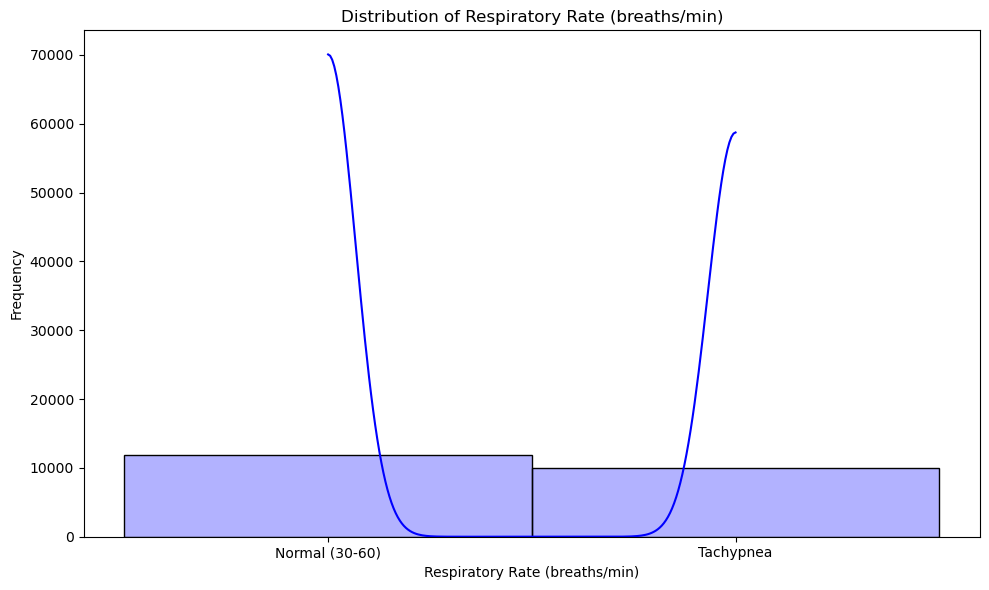

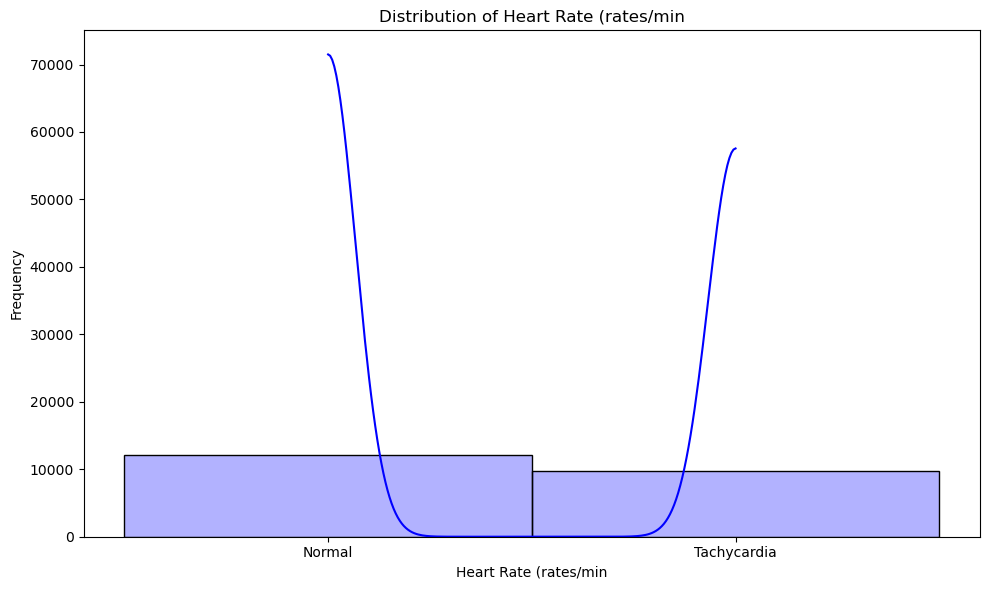

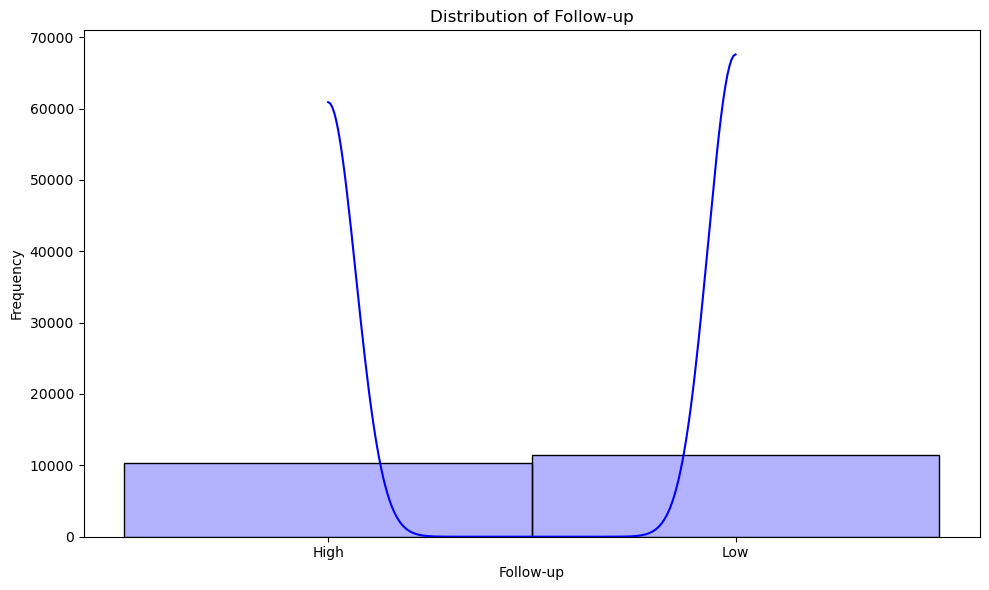

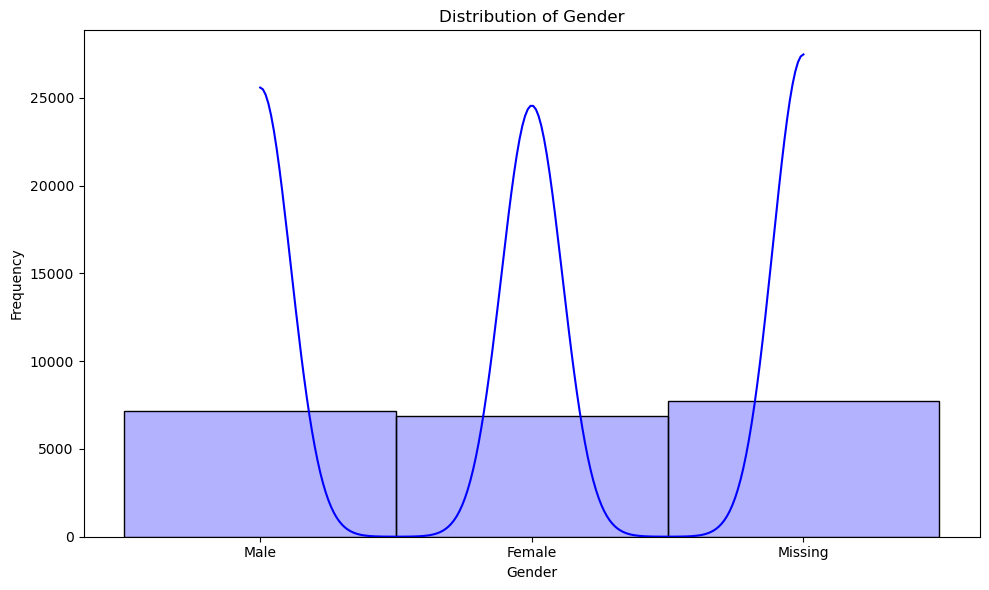

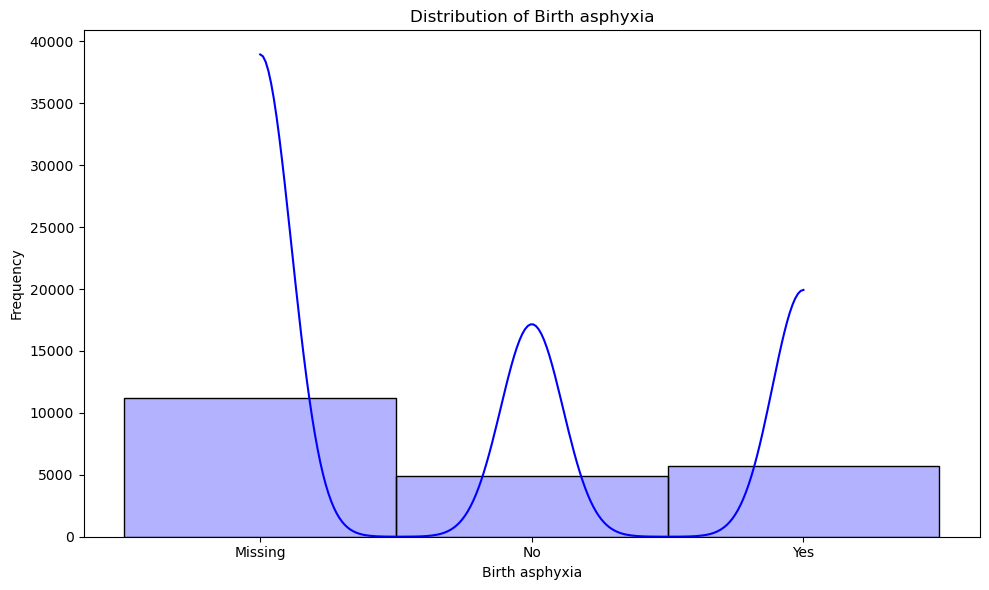

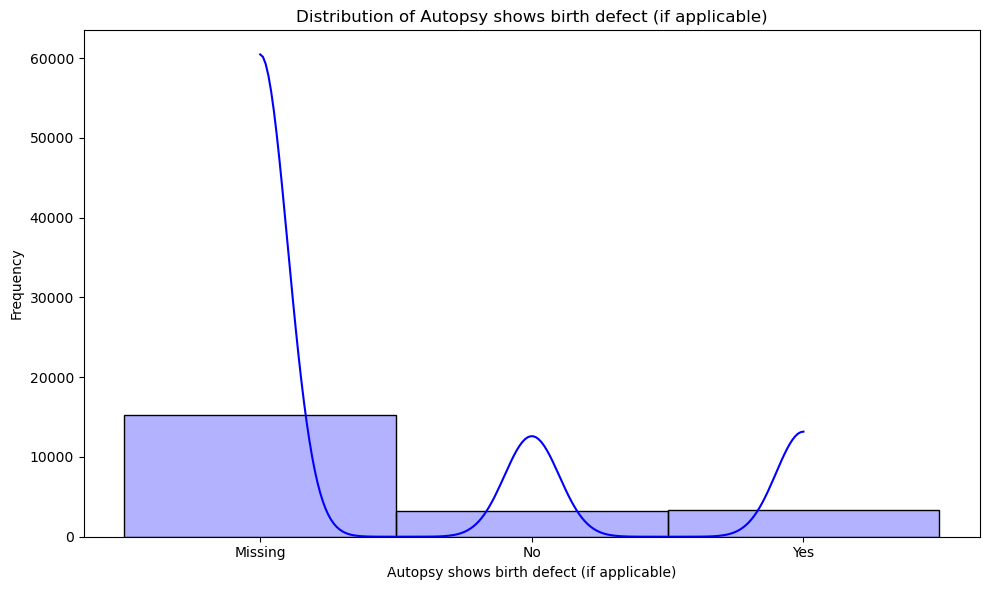

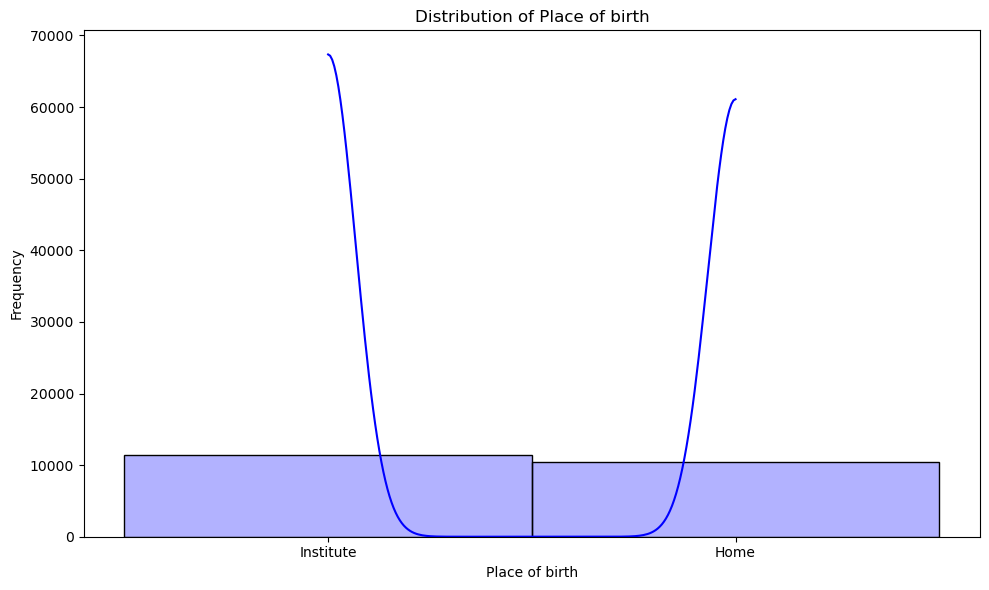

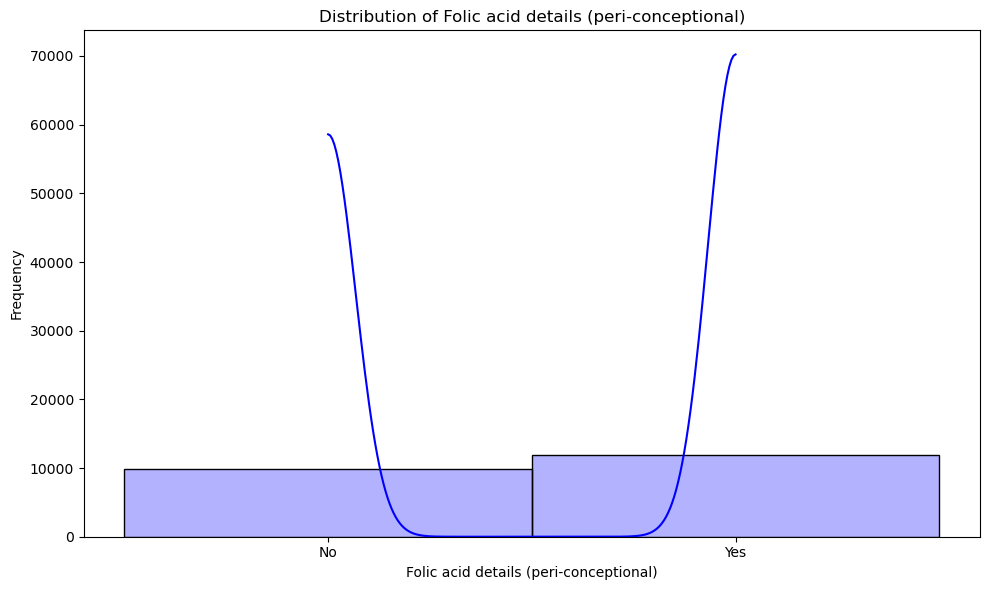

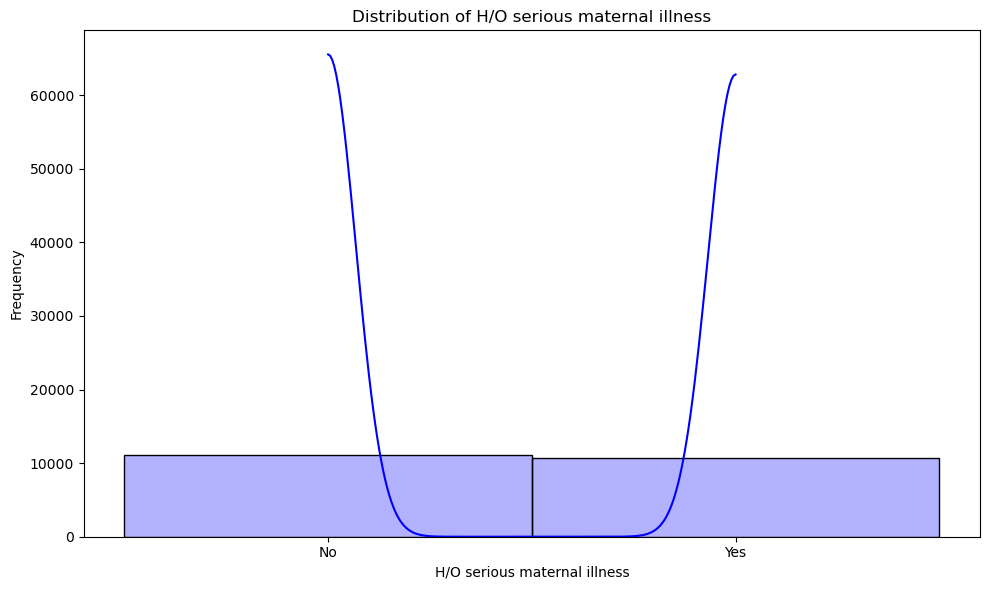

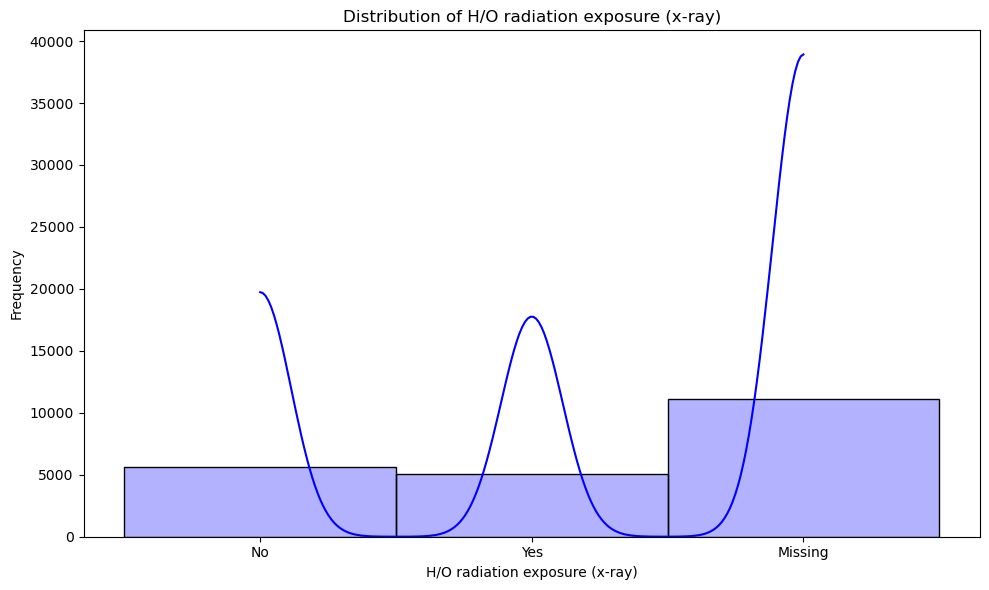

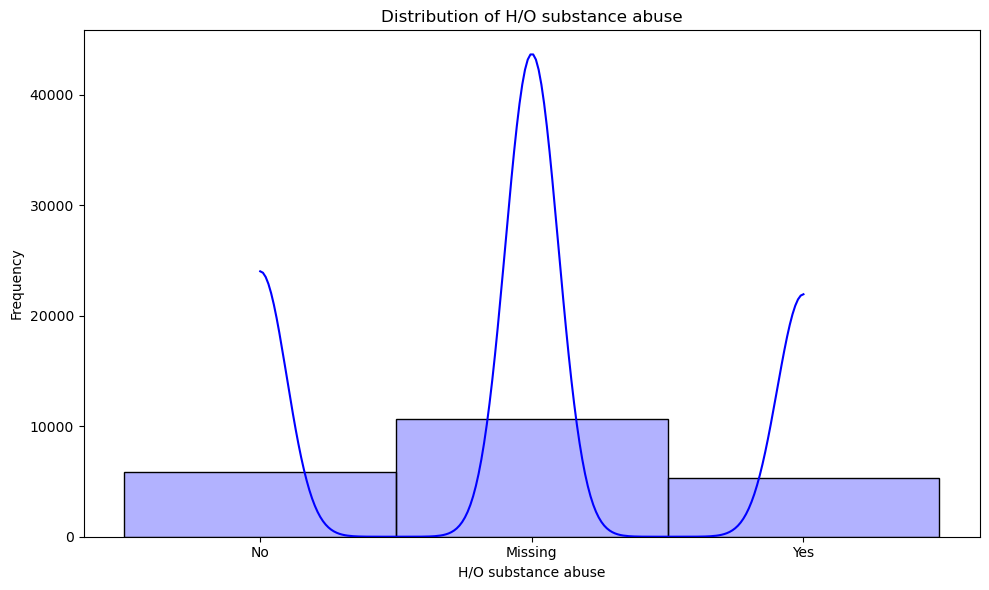

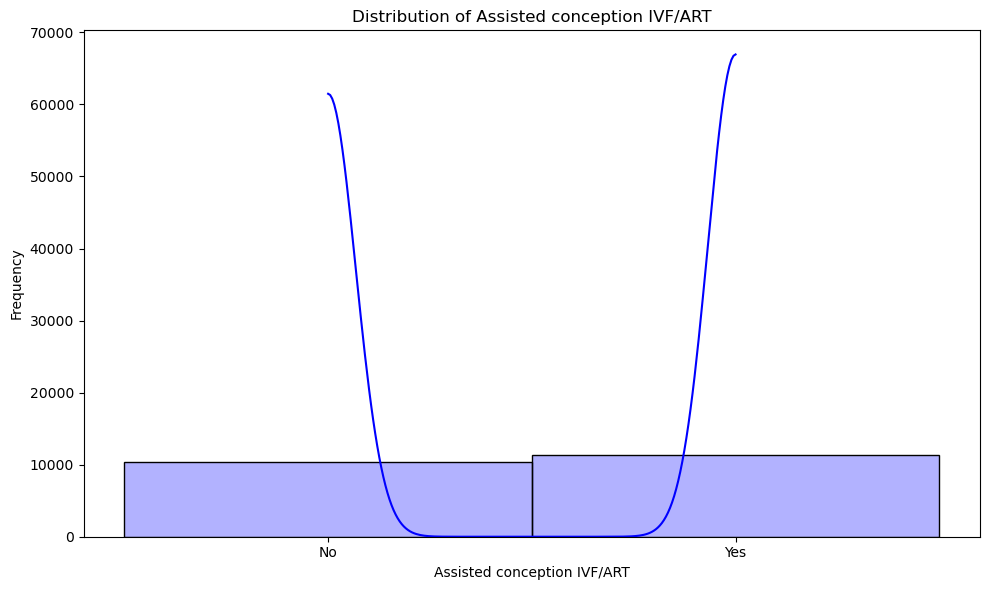

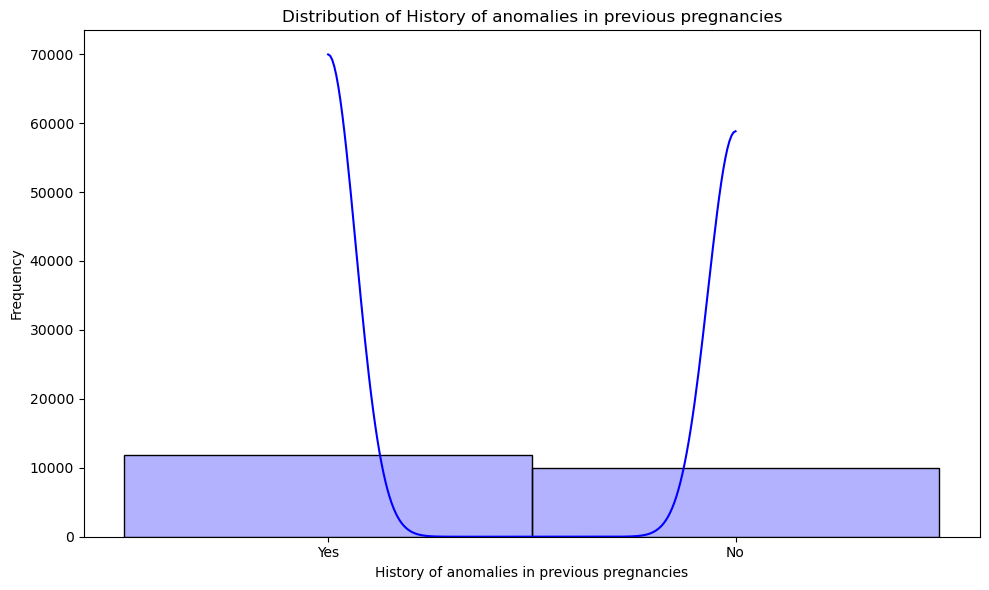

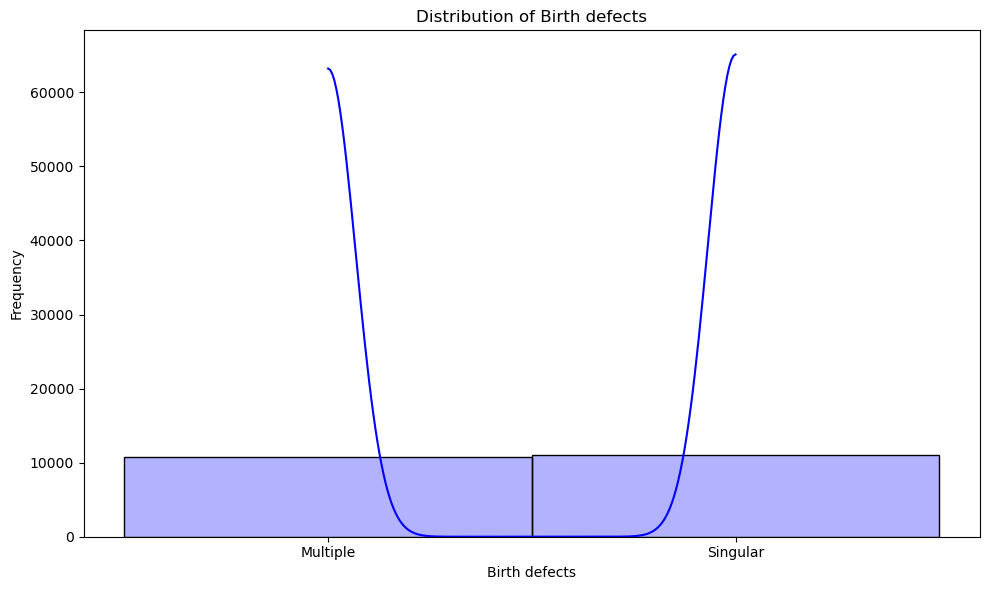

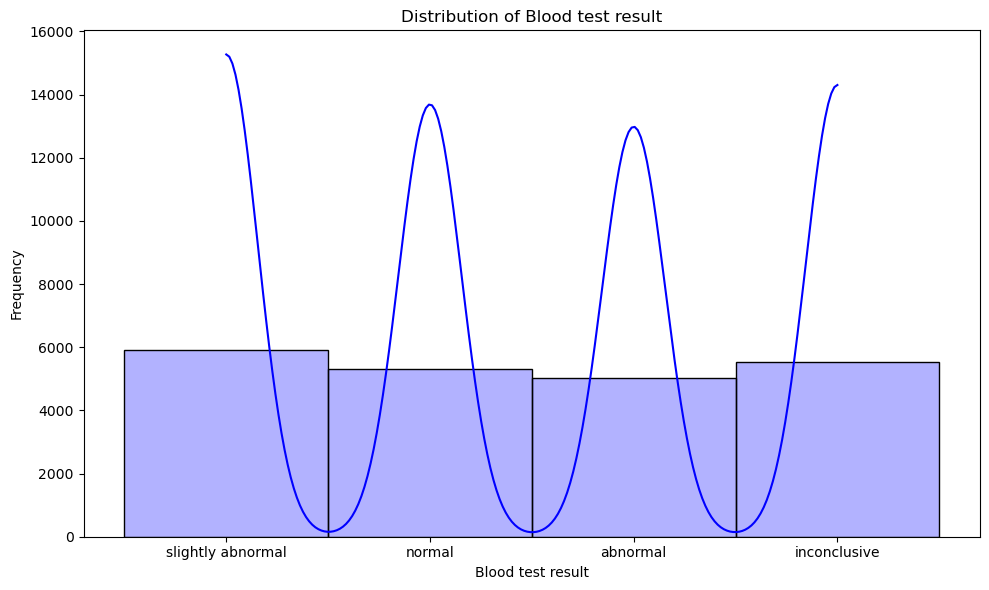

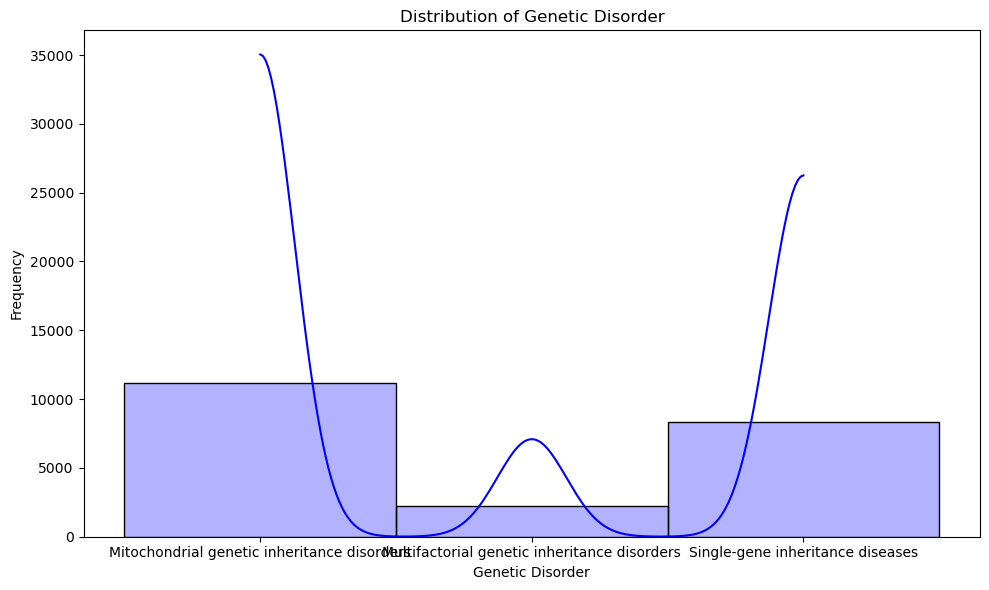

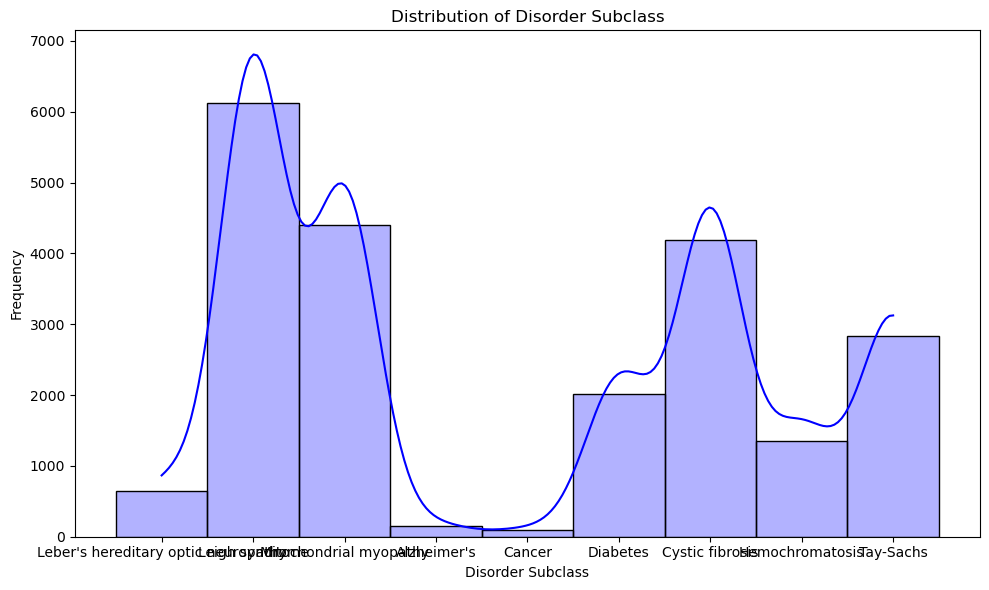

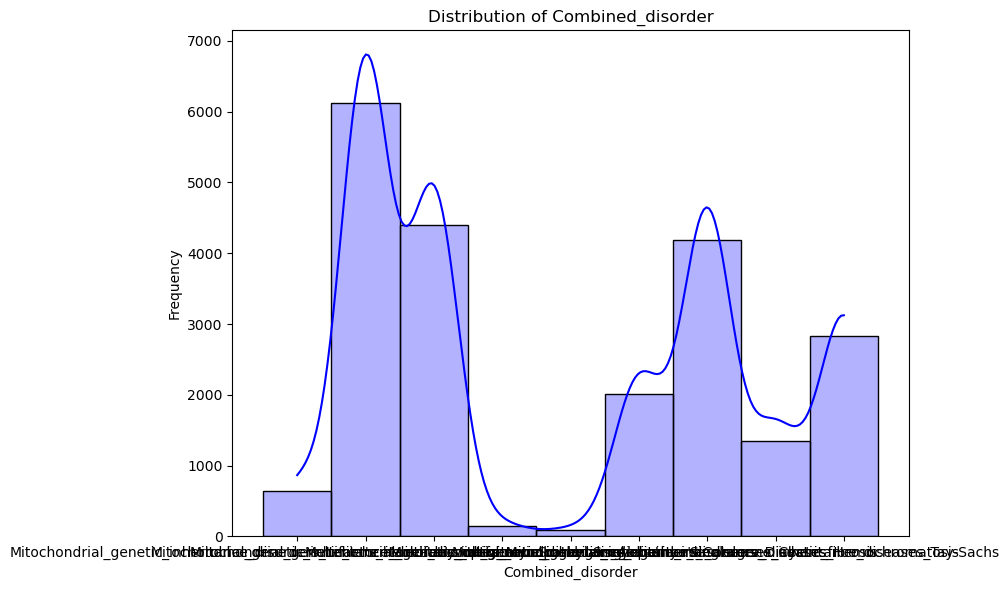

In [50]:
for col in df_train[categorical_cols]:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    #   plt.figure(figsize=(12, 6)) 

    # Plot histogram with KDE
    sns.histplot(df_train[col], color='b', bins=50, kde=True, alpha=0.3)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Show plot for the current column
    plt.show()

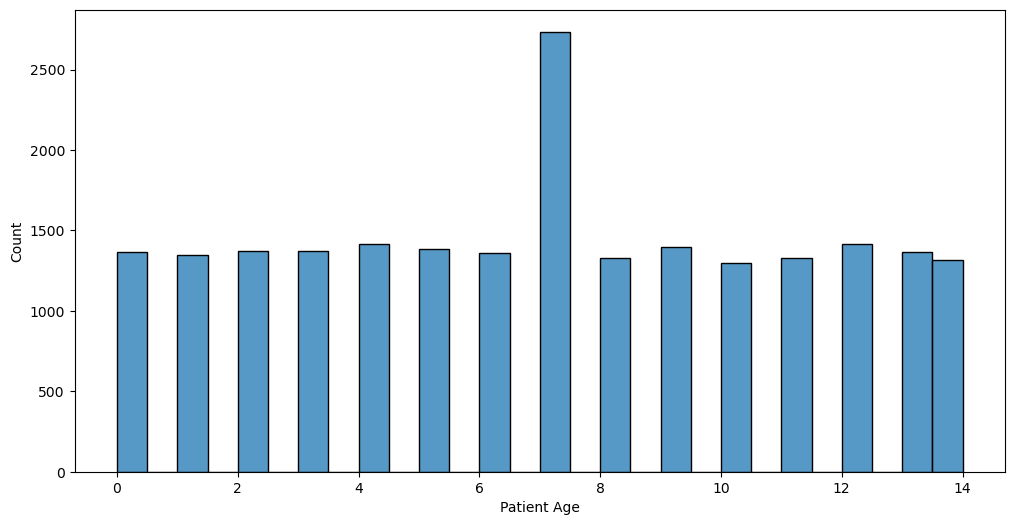

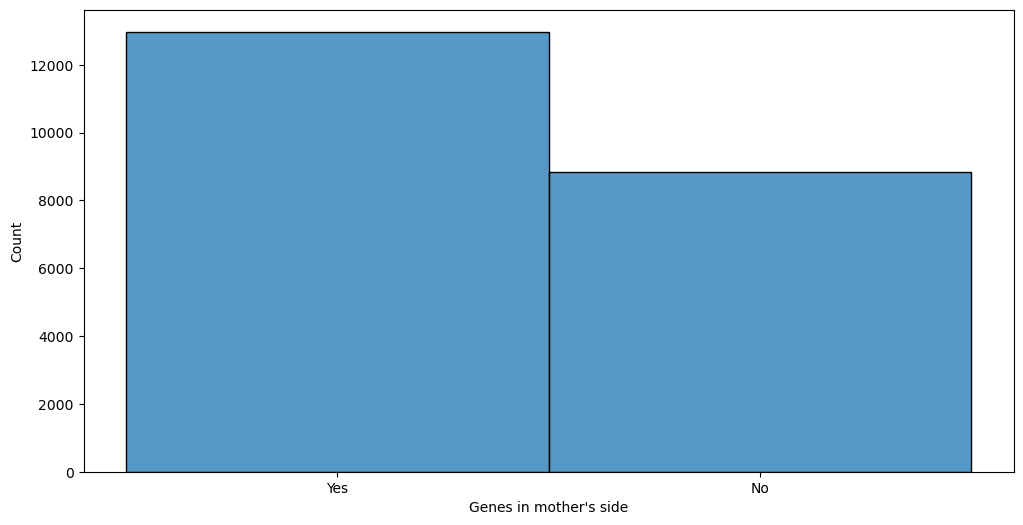

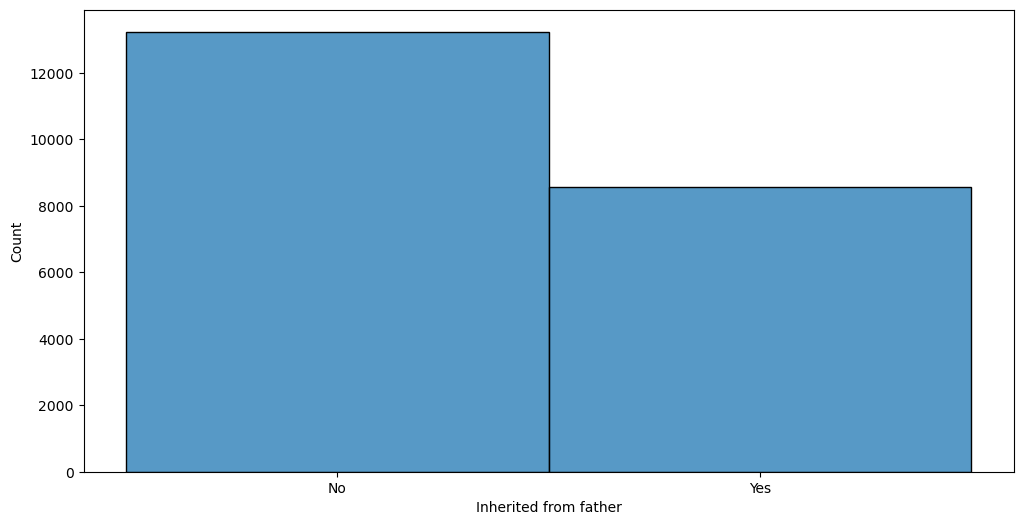

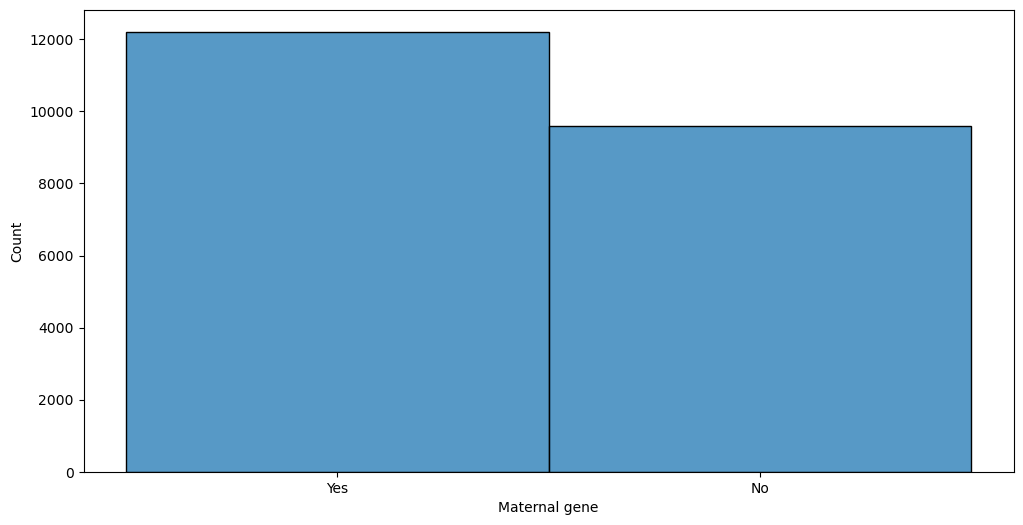

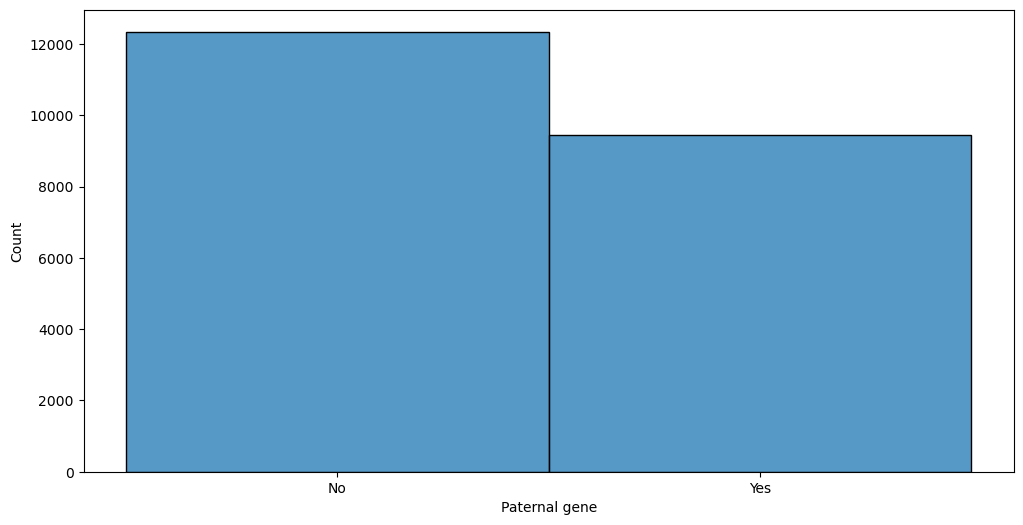

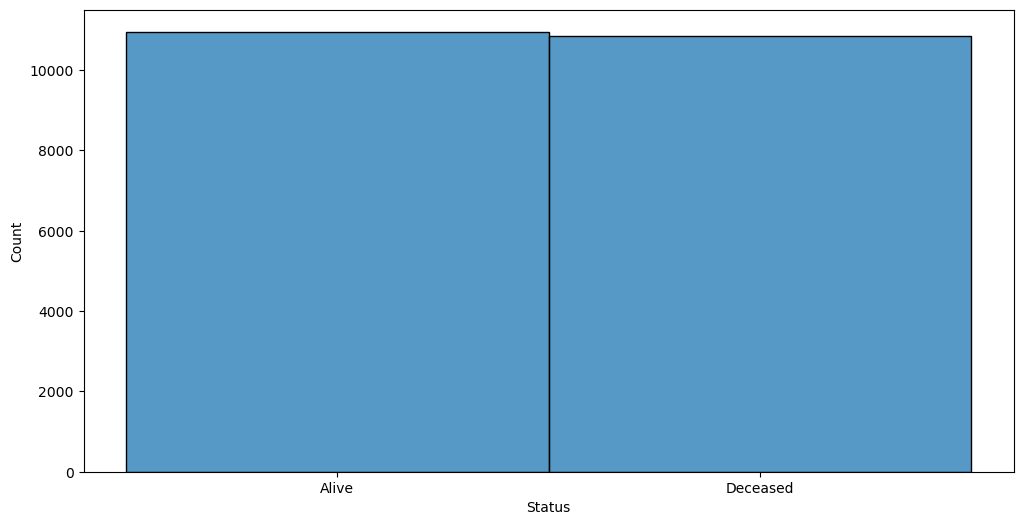

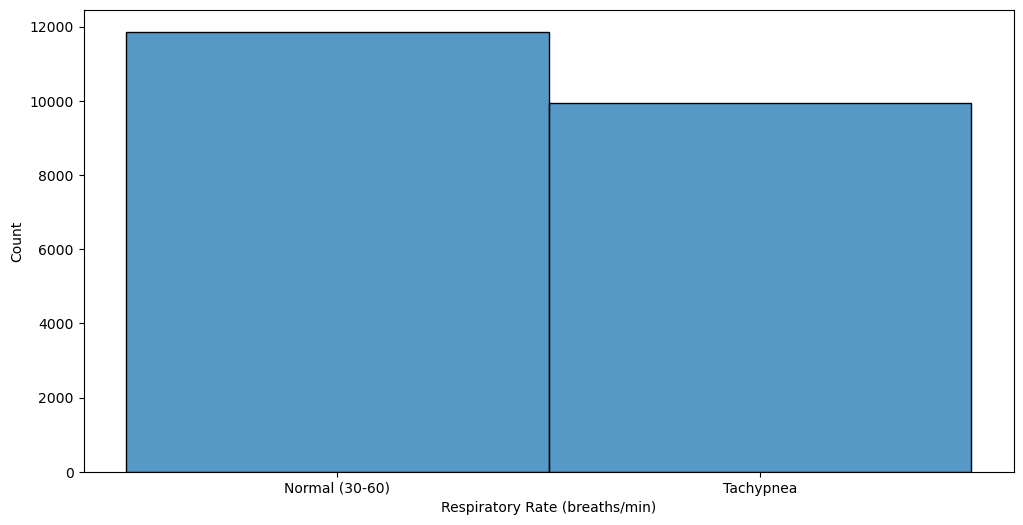

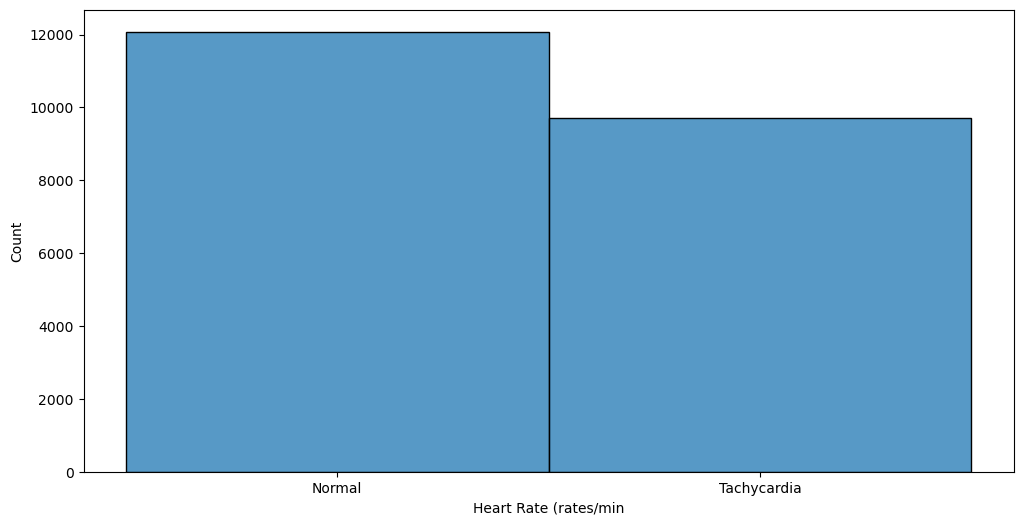

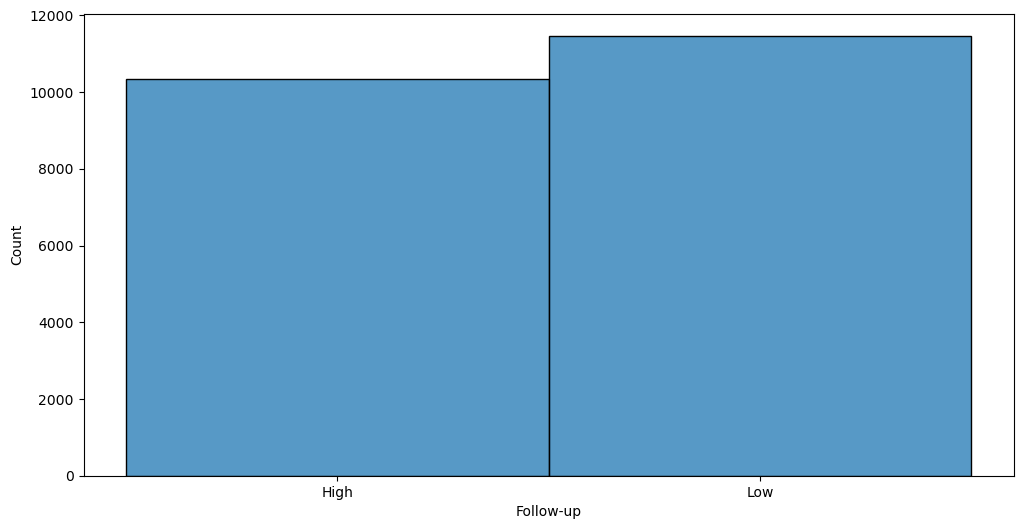

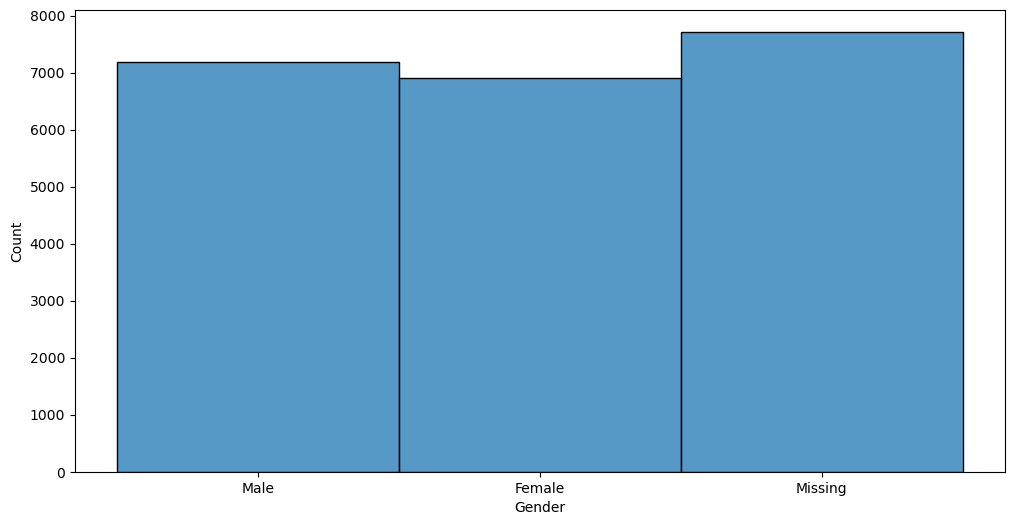

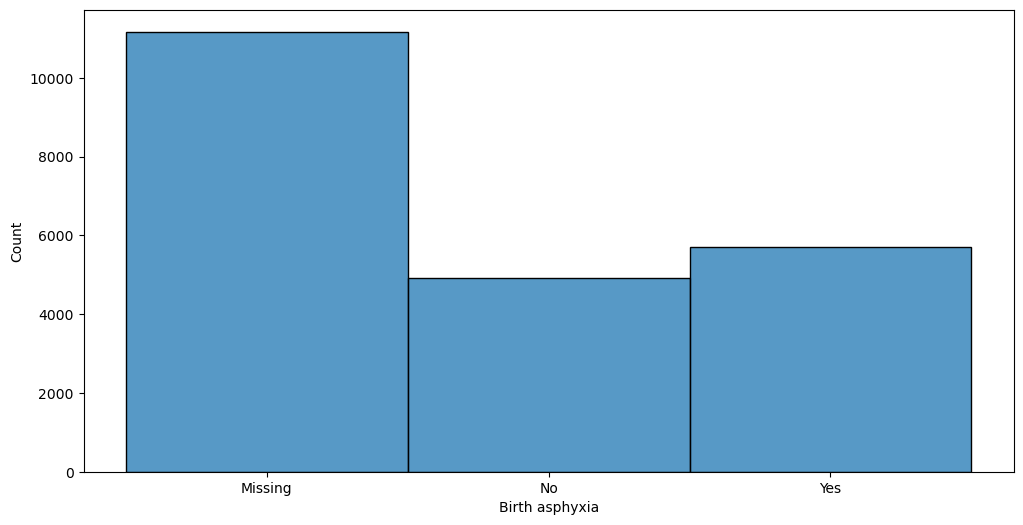

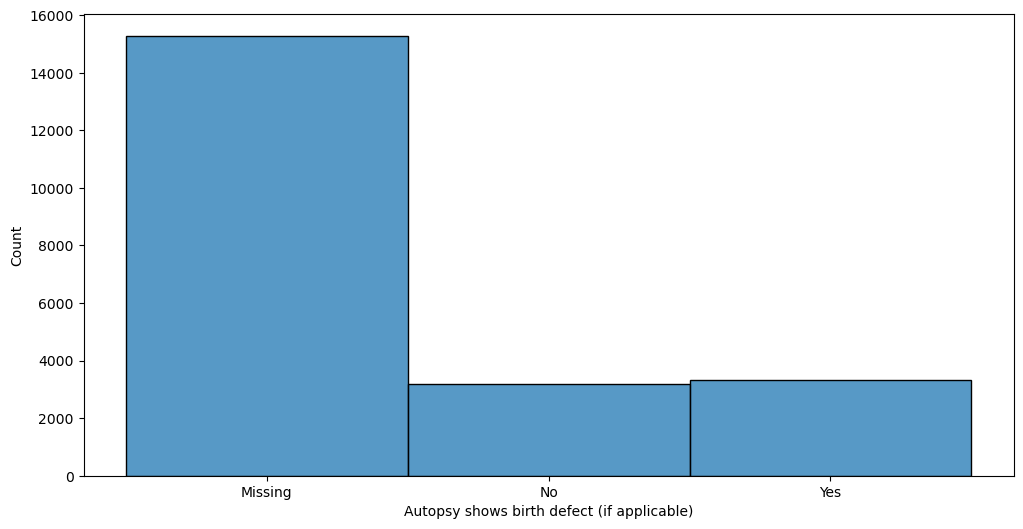

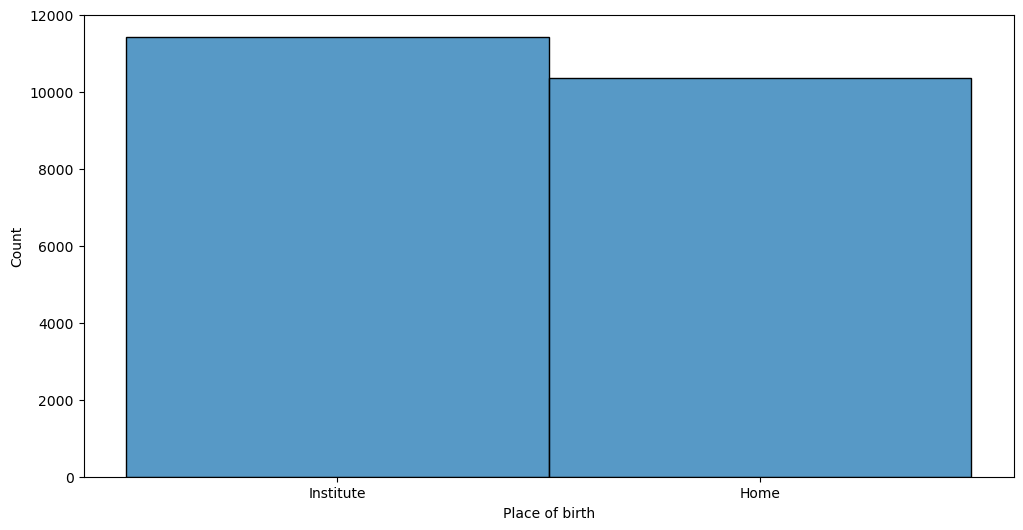

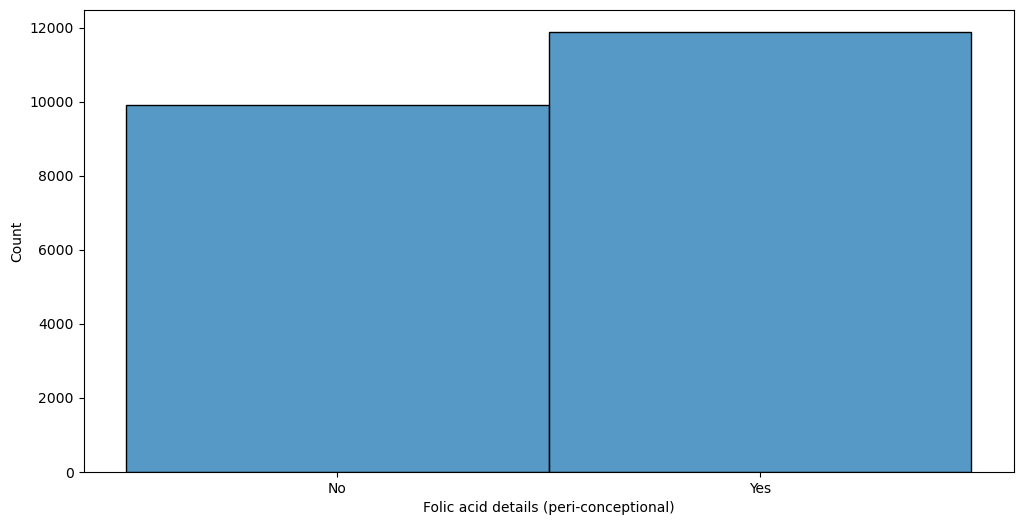

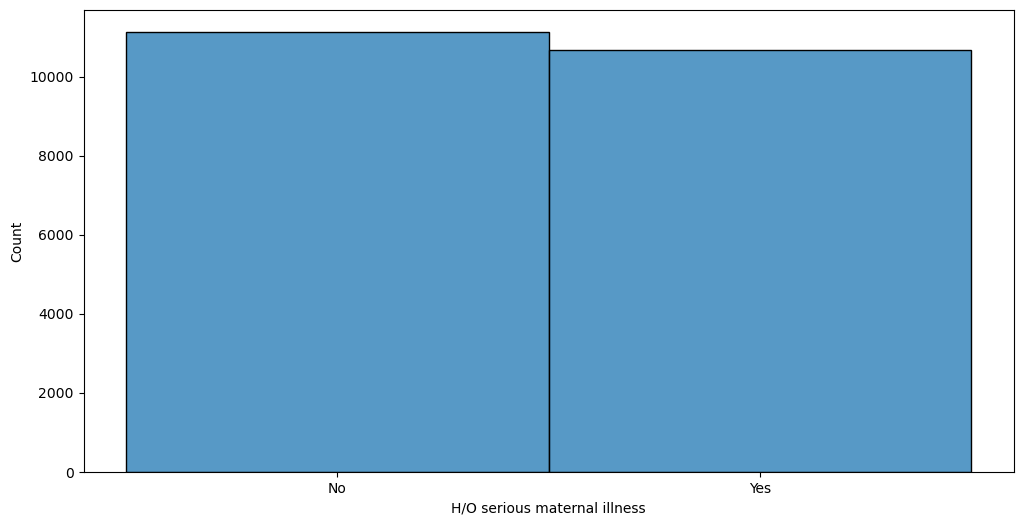

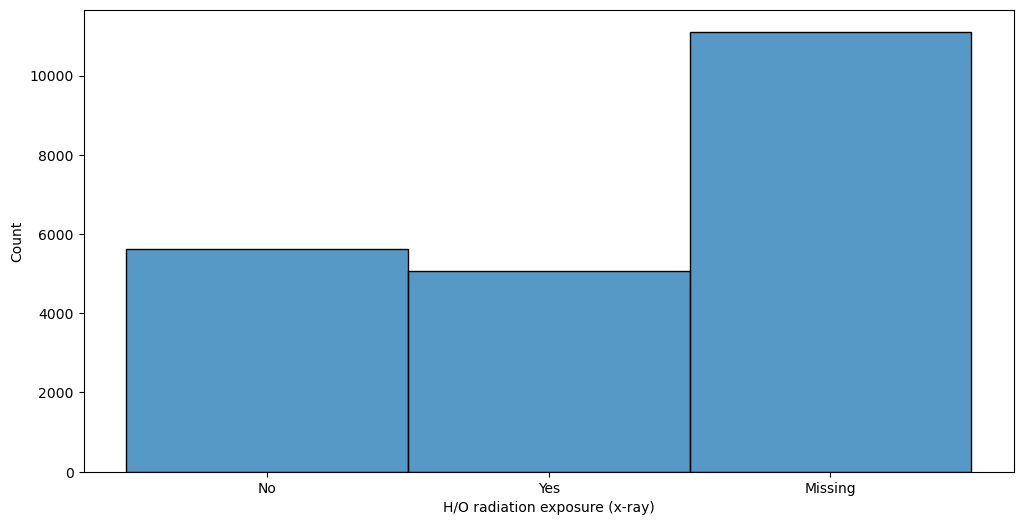

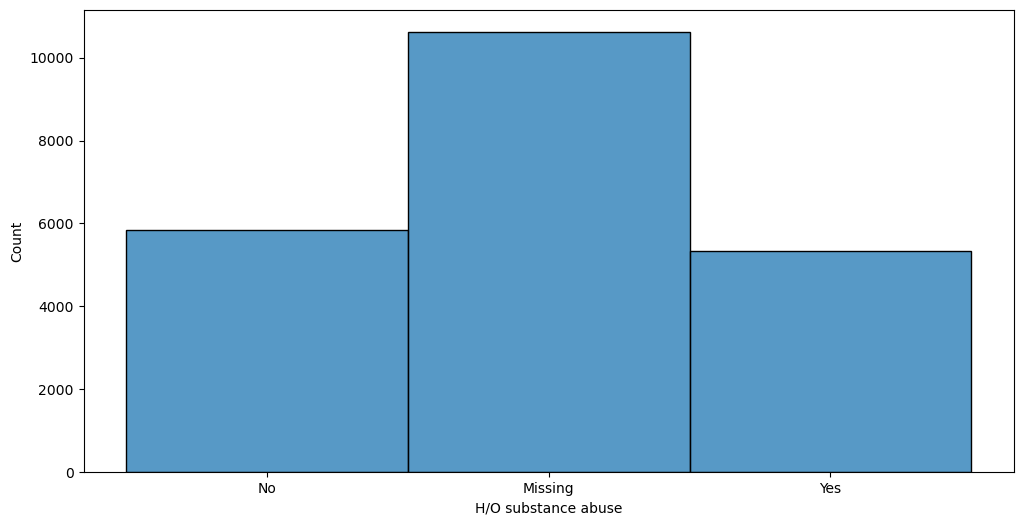

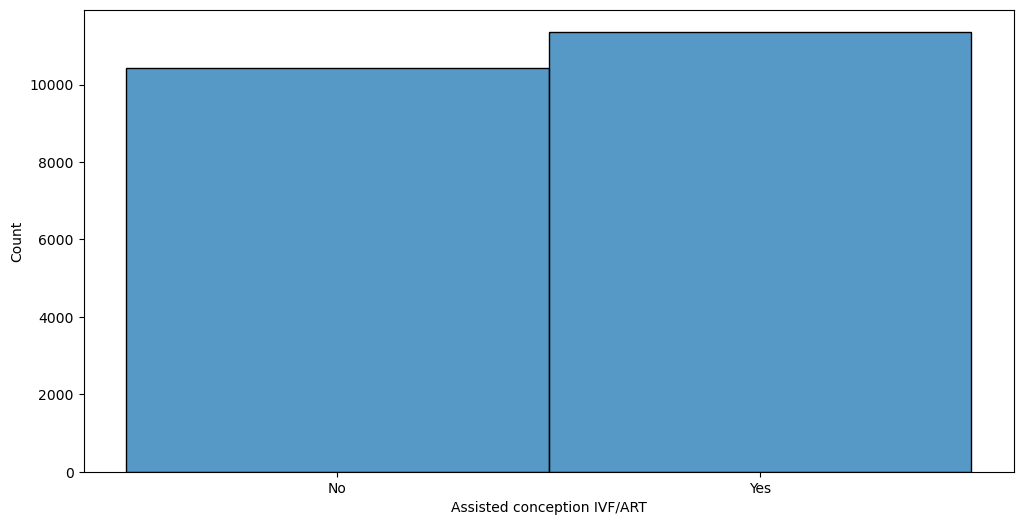

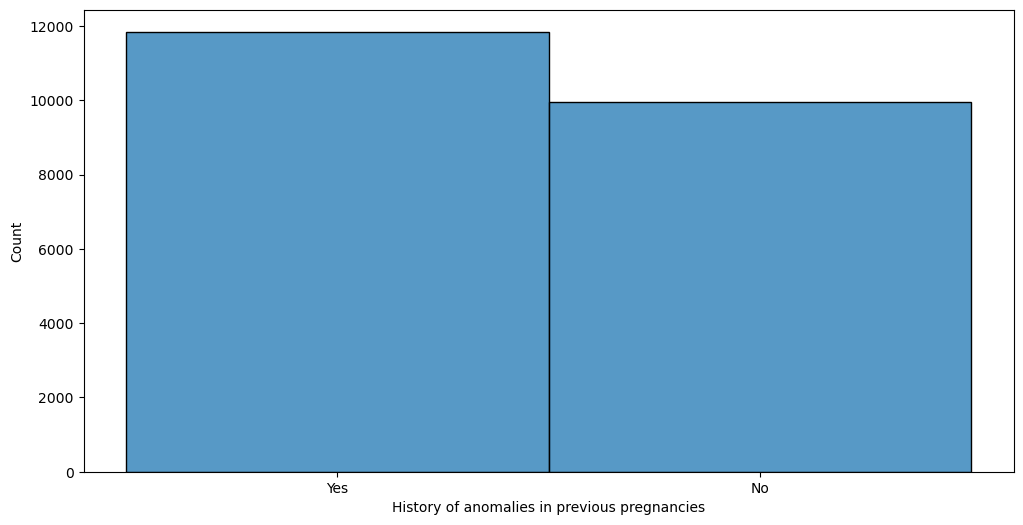

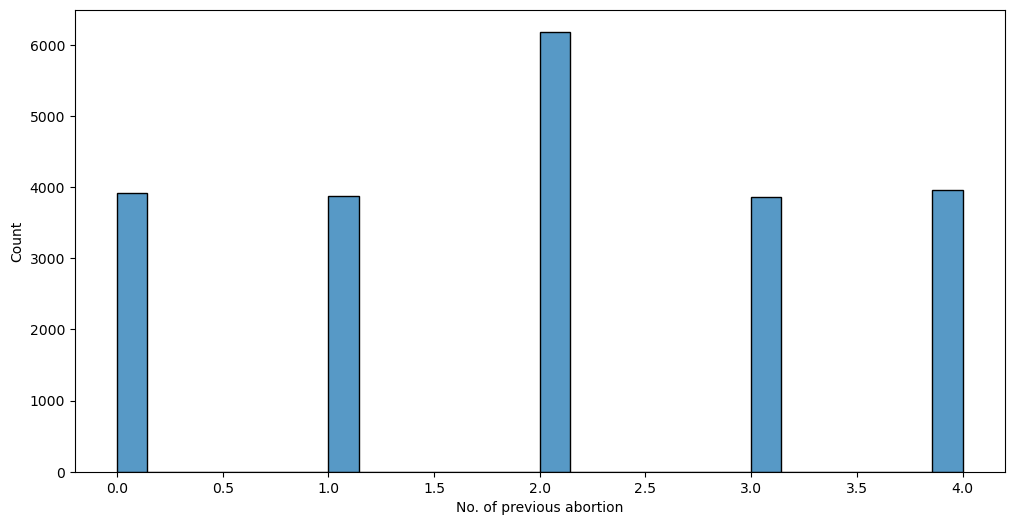

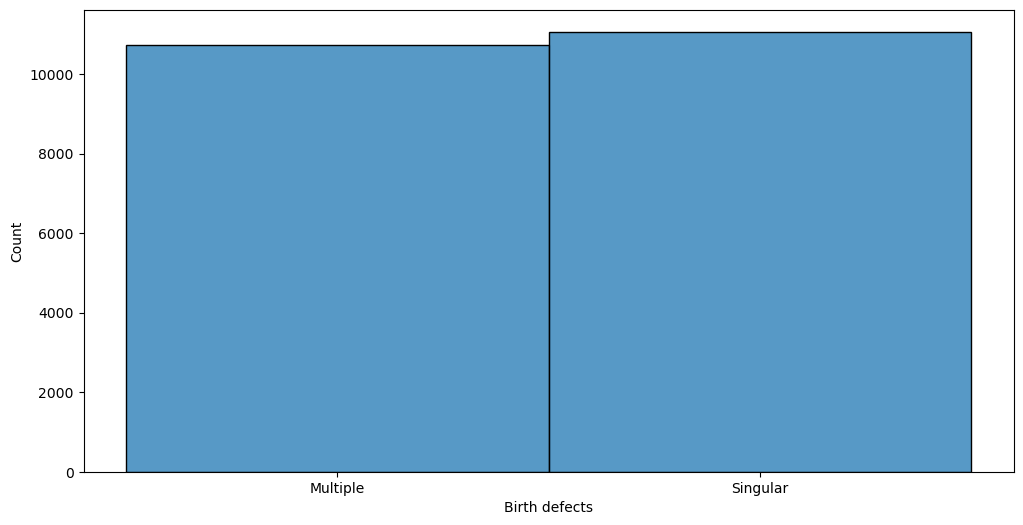

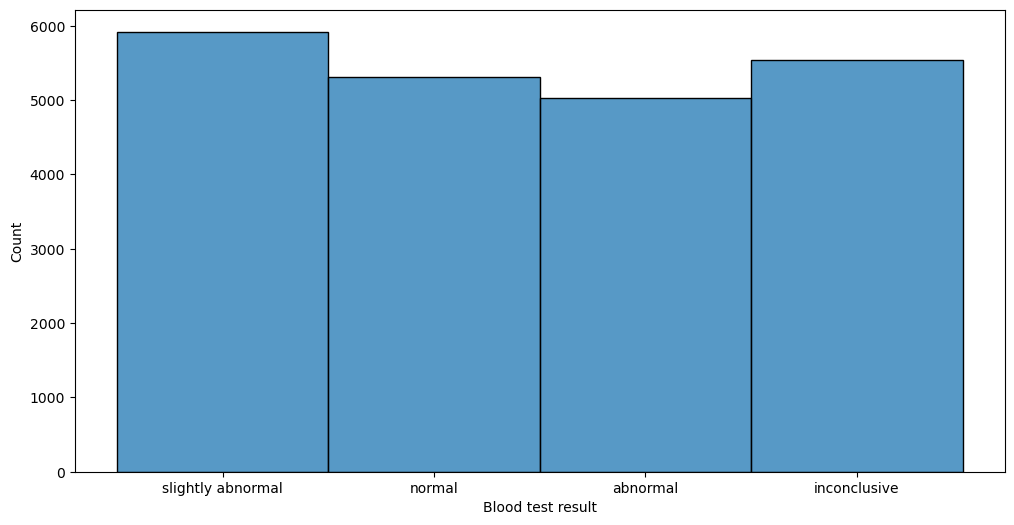

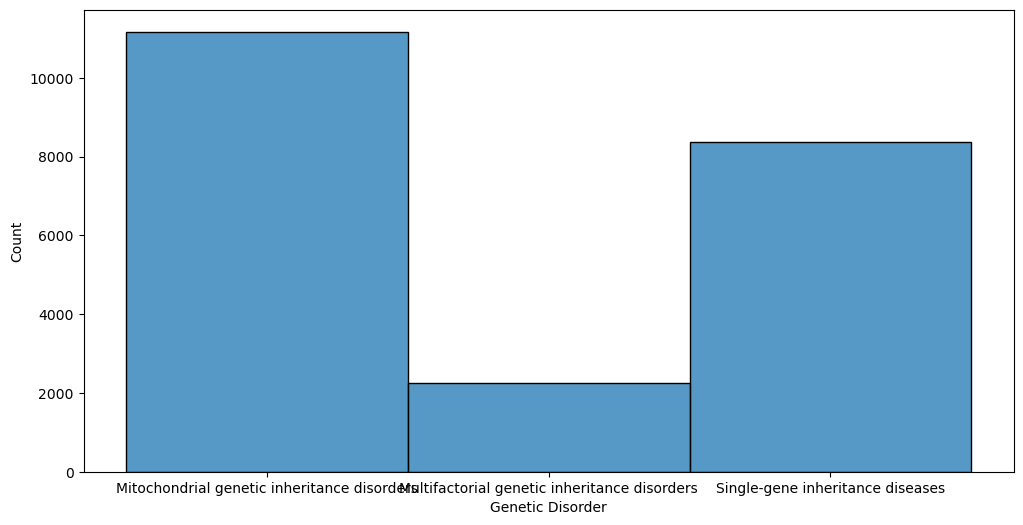

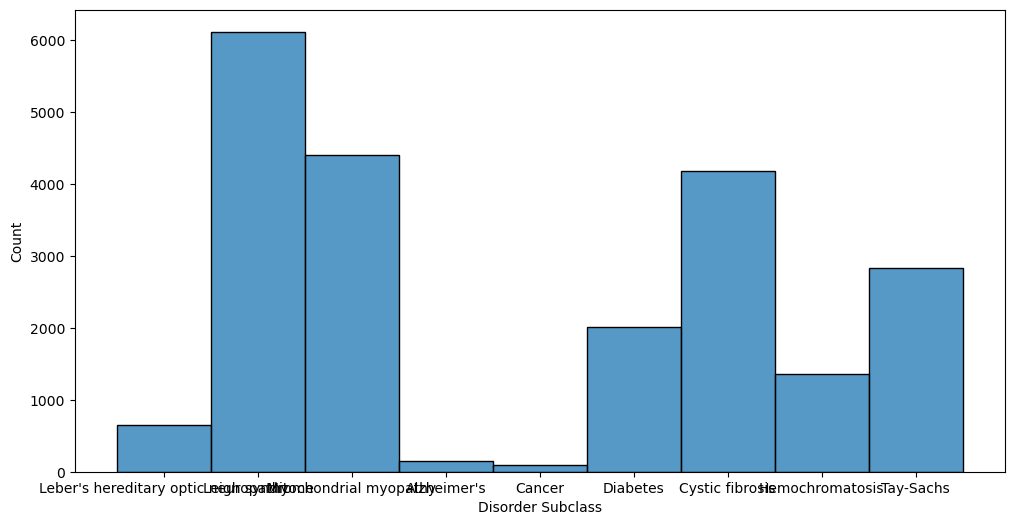

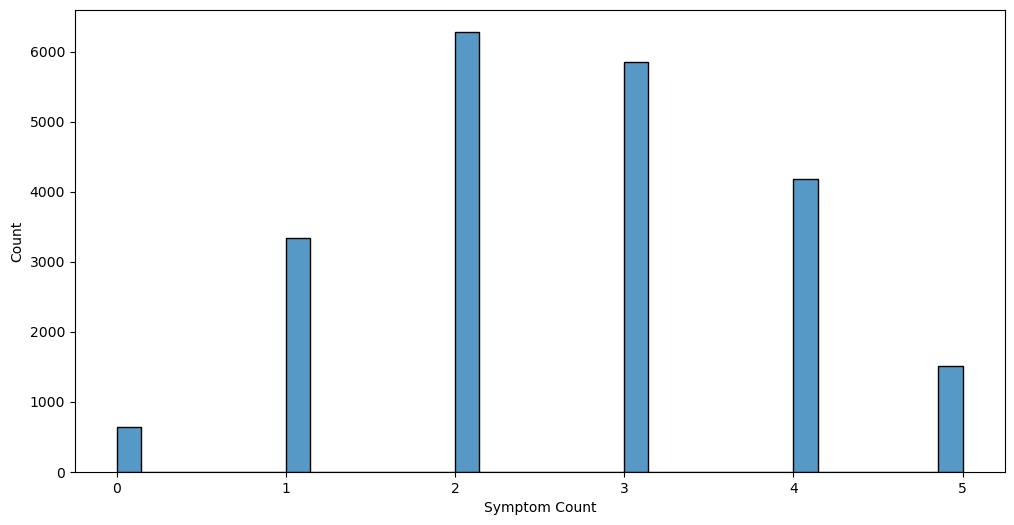

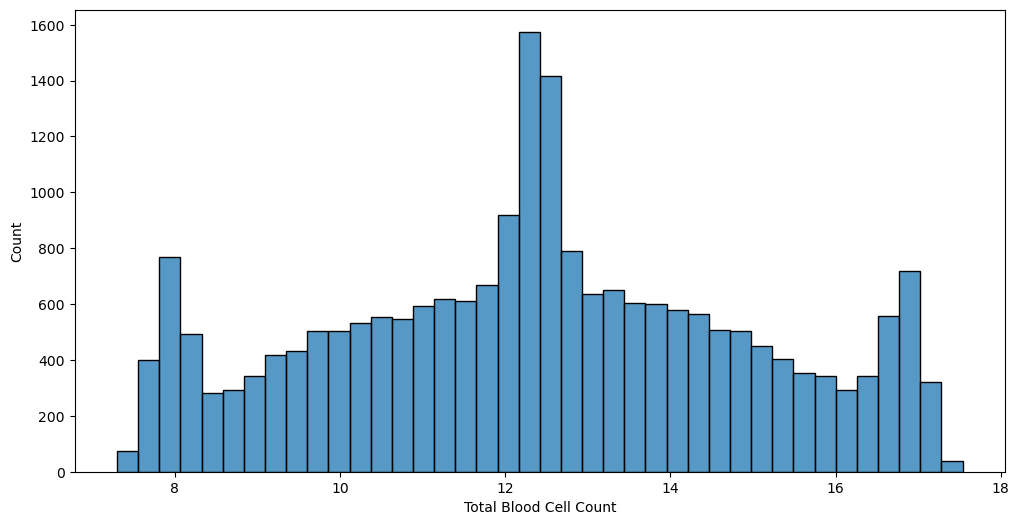

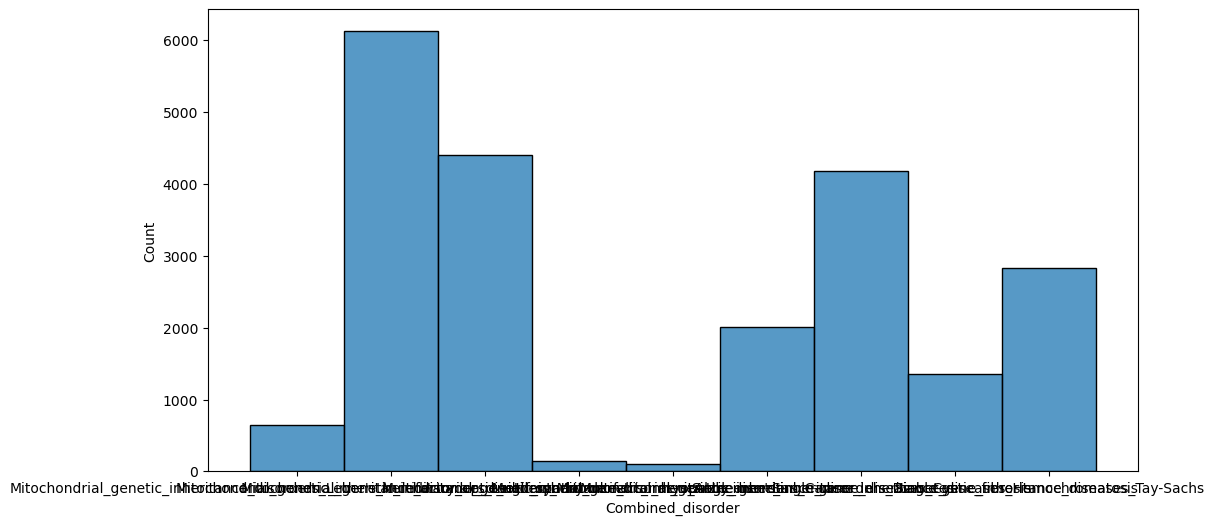

In [52]:
for col in df_train.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_train[col])
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12660\2276620830.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Genetic Disorder', data=df_train, palette=custom_colors, order=category_order)


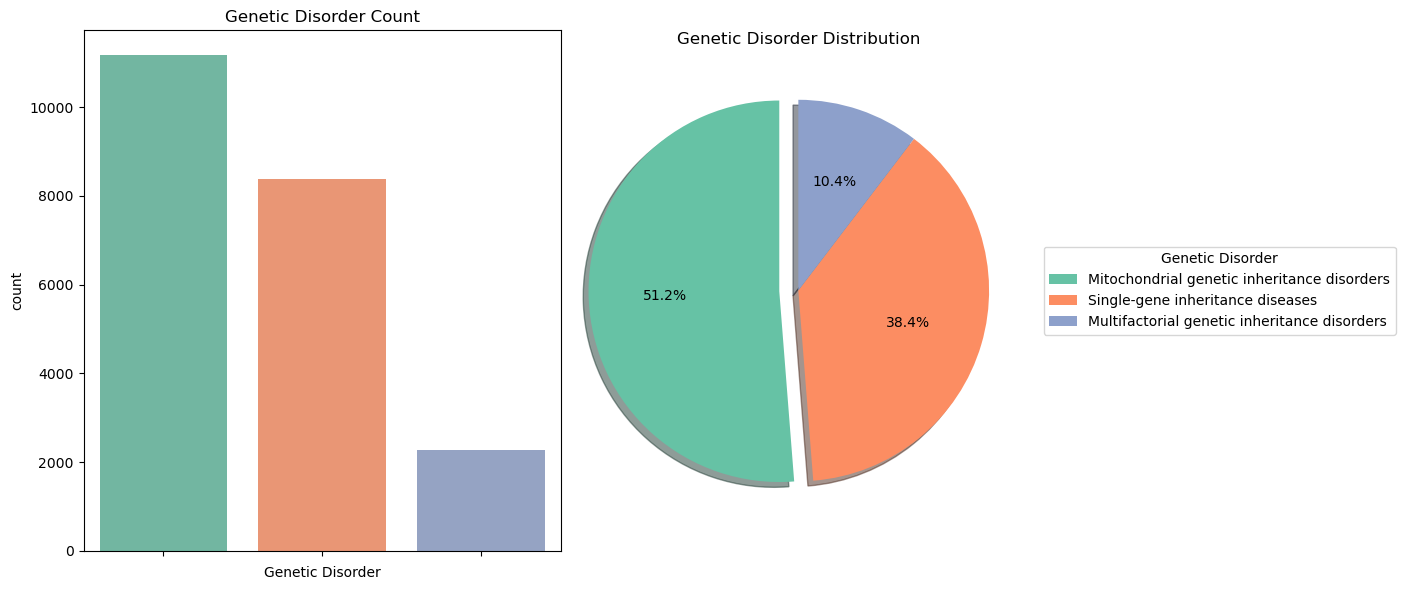

In [54]:
# Custom color palette
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Added a color for the third slice

# Define the order based on value_counts() so both plots have the same order
category_order = df_train['Genetic Disorder'].value_counts().index

# Attrition Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Genetic Disorder (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Genetic Disorder', data=df_train, palette=custom_colors, order=category_order)
plt.title('Genetic Disorder Count')

# Remove x-axis labels from count plot
ax.set_xticklabels([])

# Pie Chart of Genetic Disorder Distribution (now in the same order)
plt.subplot(1, 2, 2)
satisfaction_counts = df_train['Genetic Disorder'].value_counts()
plt.pie(satisfaction_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0), shadow=True, colors=custom_colors)
plt.title('Genetic Disorder Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Genetic Disorder")

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12660\1830573291.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Rotate x-tick labels for readability


KeyError: 'Disorder Subclass'

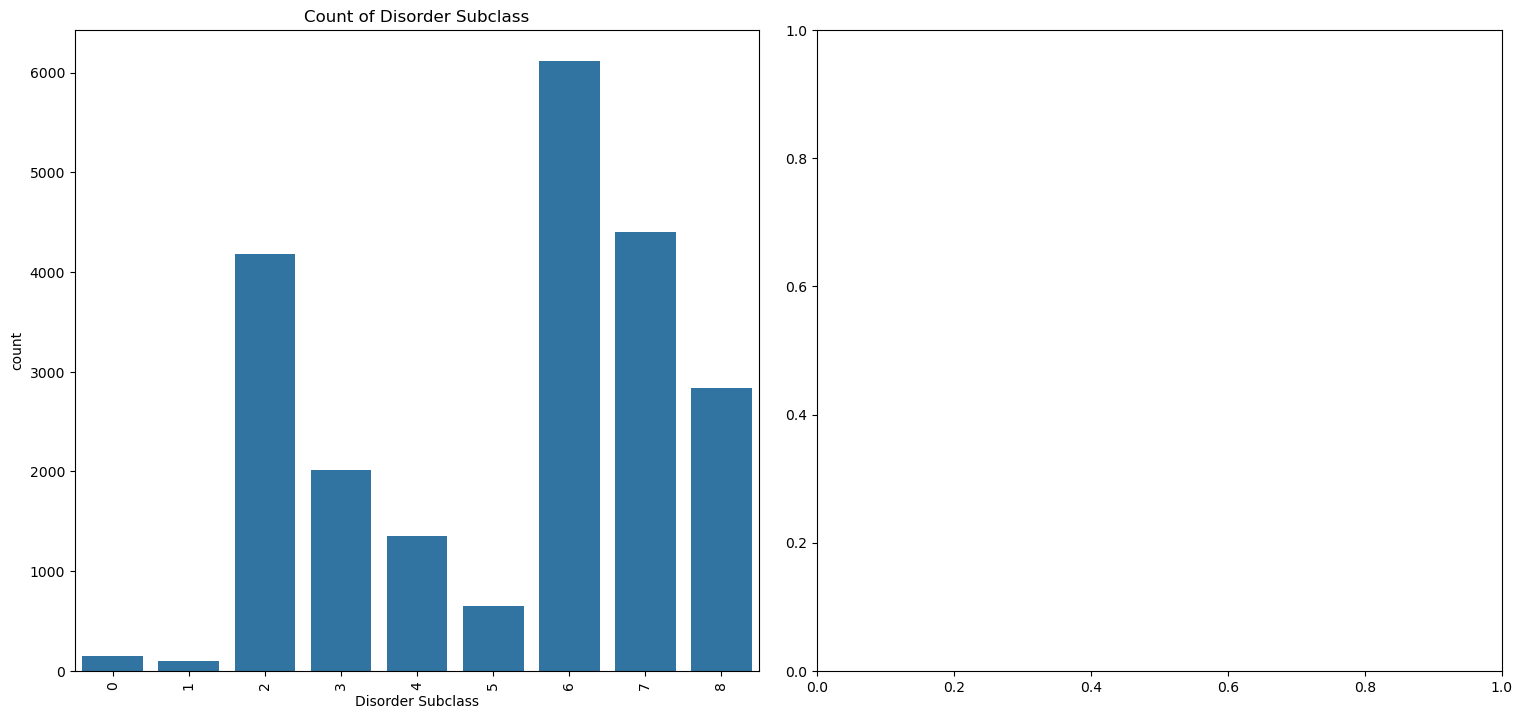

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figure size 
fig.tight_layout()

sns.countplot(x=df_train['Disorder Subclass'].sort_values(ascending=True), ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Rotate x-tick labels for readability
ax[0].set_title("Count of Disorder Subclass")

sns.countplot(x=y_train[df_train['Disorder Subclass'].name], ax=ax[1])
ax[1].set_title("Count of Y Train by Disorder Subclass")

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12660\3626161574.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Disorder Subclass', data=df_train, palette=custom_colors, order=category_order)


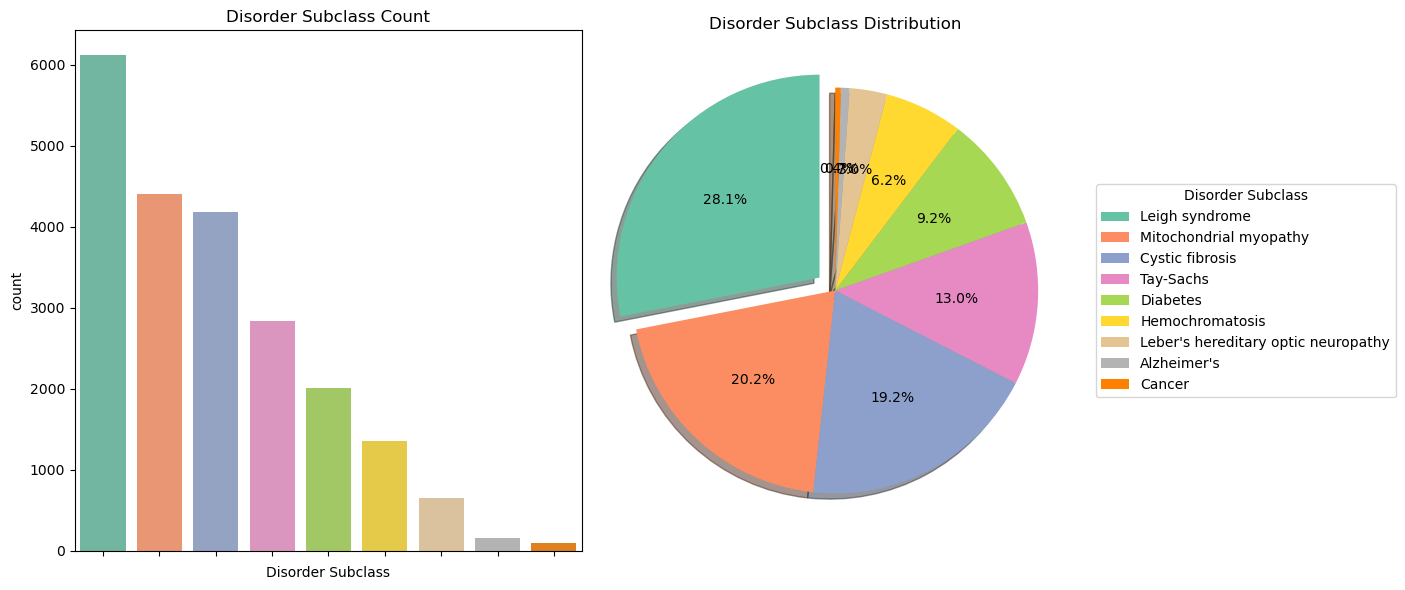

In [56]:
# Custom color palette with 9 colors
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff7f00']

# Define the order based on value_counts() so both plots have the same order
category_order = df_train['Disorder Subclass'].value_counts().index

# Plot Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Disorder Subclass (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Disorder Subclass', data=df_train, palette=custom_colors, order=category_order)
plt.title('Disorder Subclass Count')

# Remove x-axis labels from count plot
ax.set_xticklabels([])
# Pie Chart of Disorder Subclass Distribution (with the same order)
plt.subplot(1, 2, 2)
disorder_counts = df_train['Disorder Subclass'].value_counts()
plt.pie(disorder_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0), shadow=True, colors=custom_colors)
plt.title('Disorder Subclass Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Disorder Subclass")

plt.tight_layout()
plt.show()

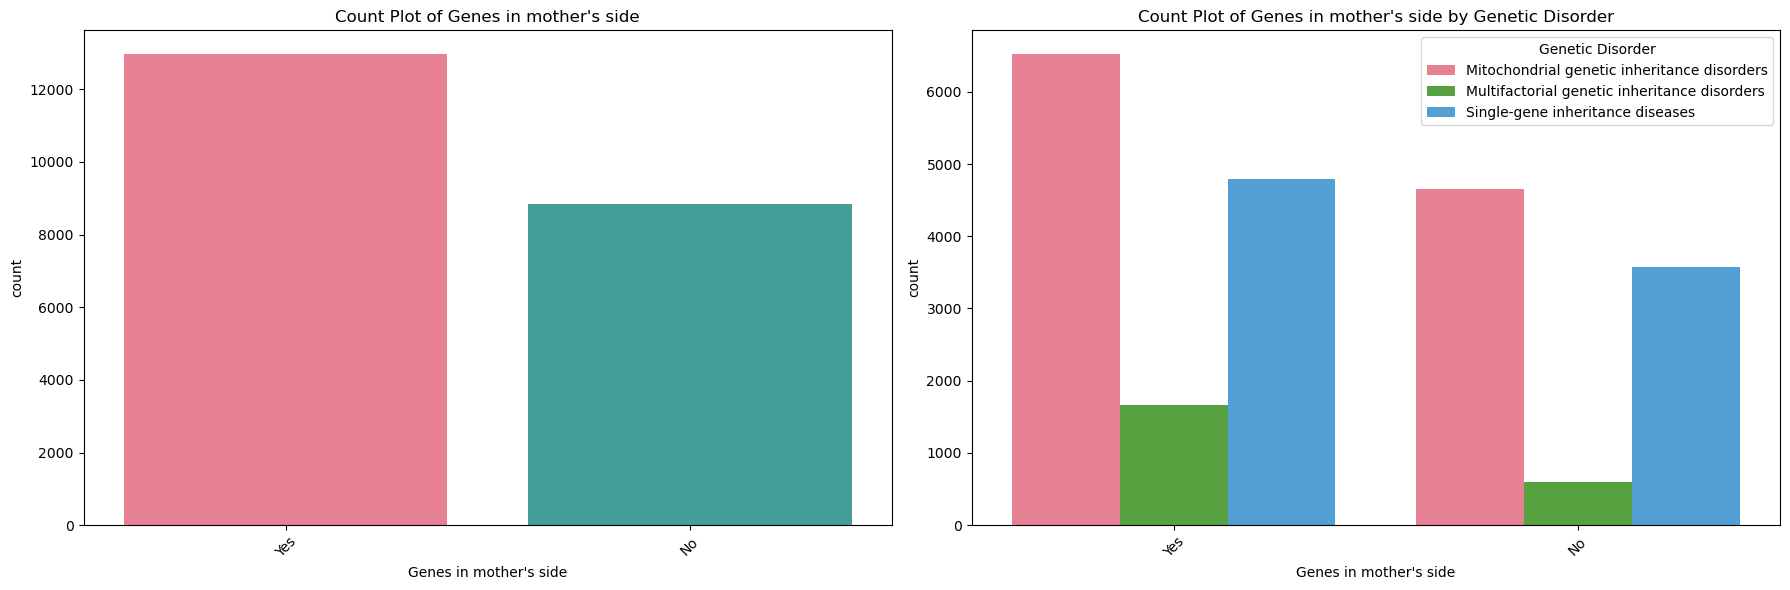

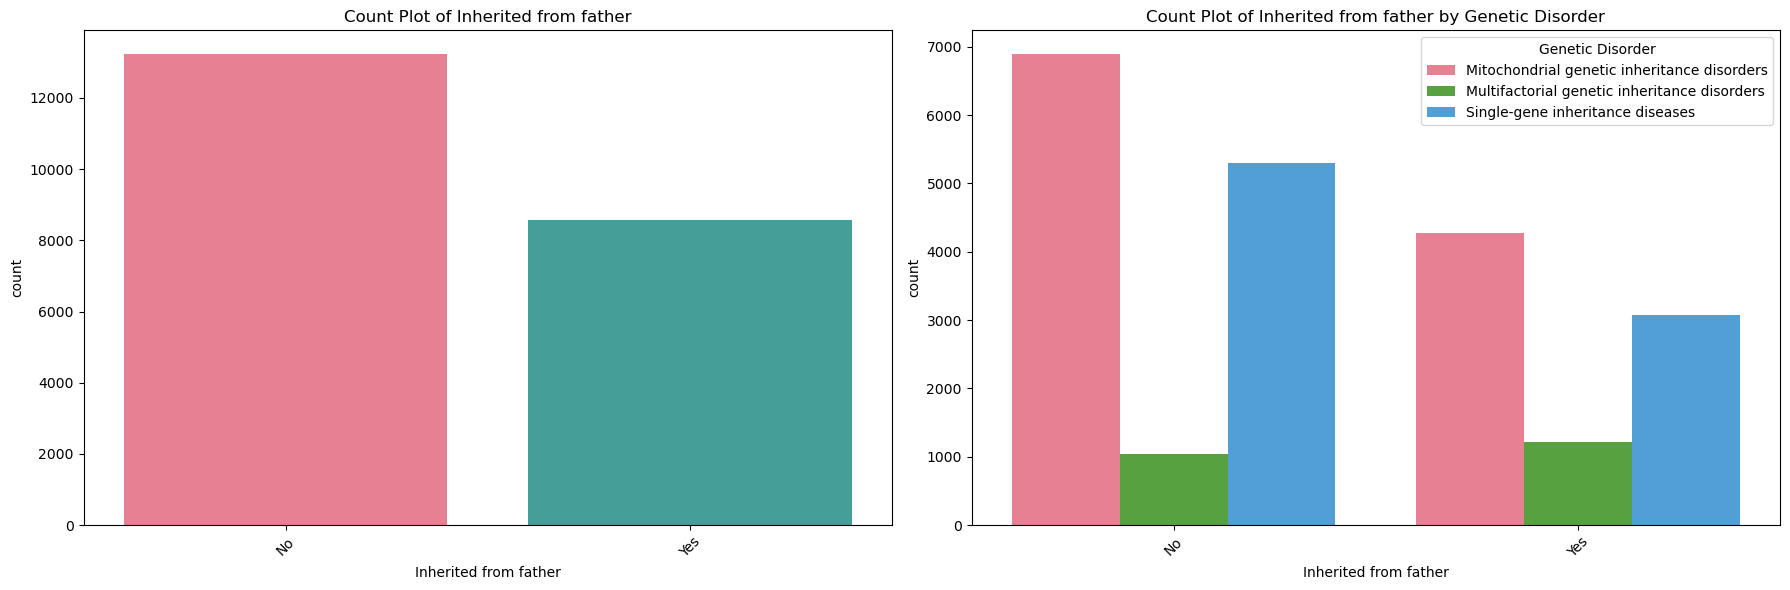

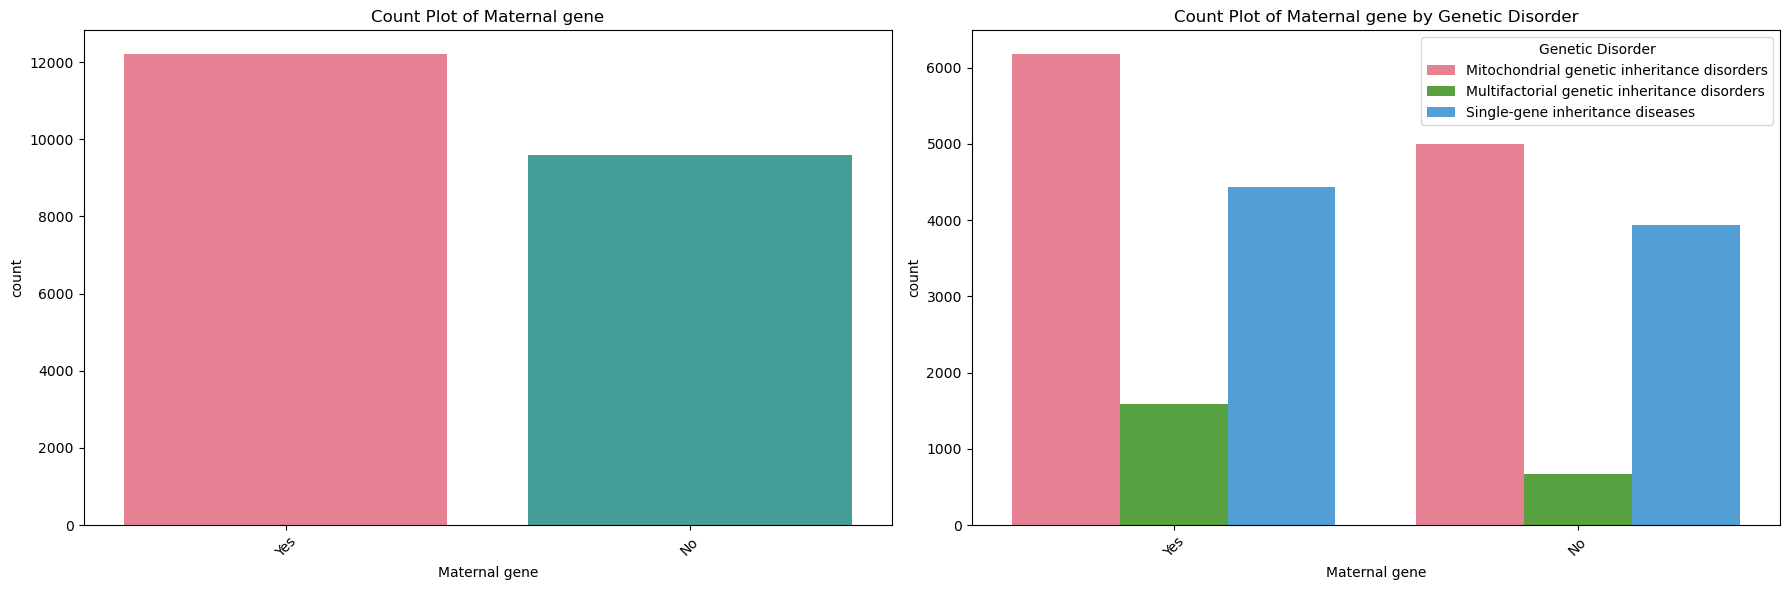

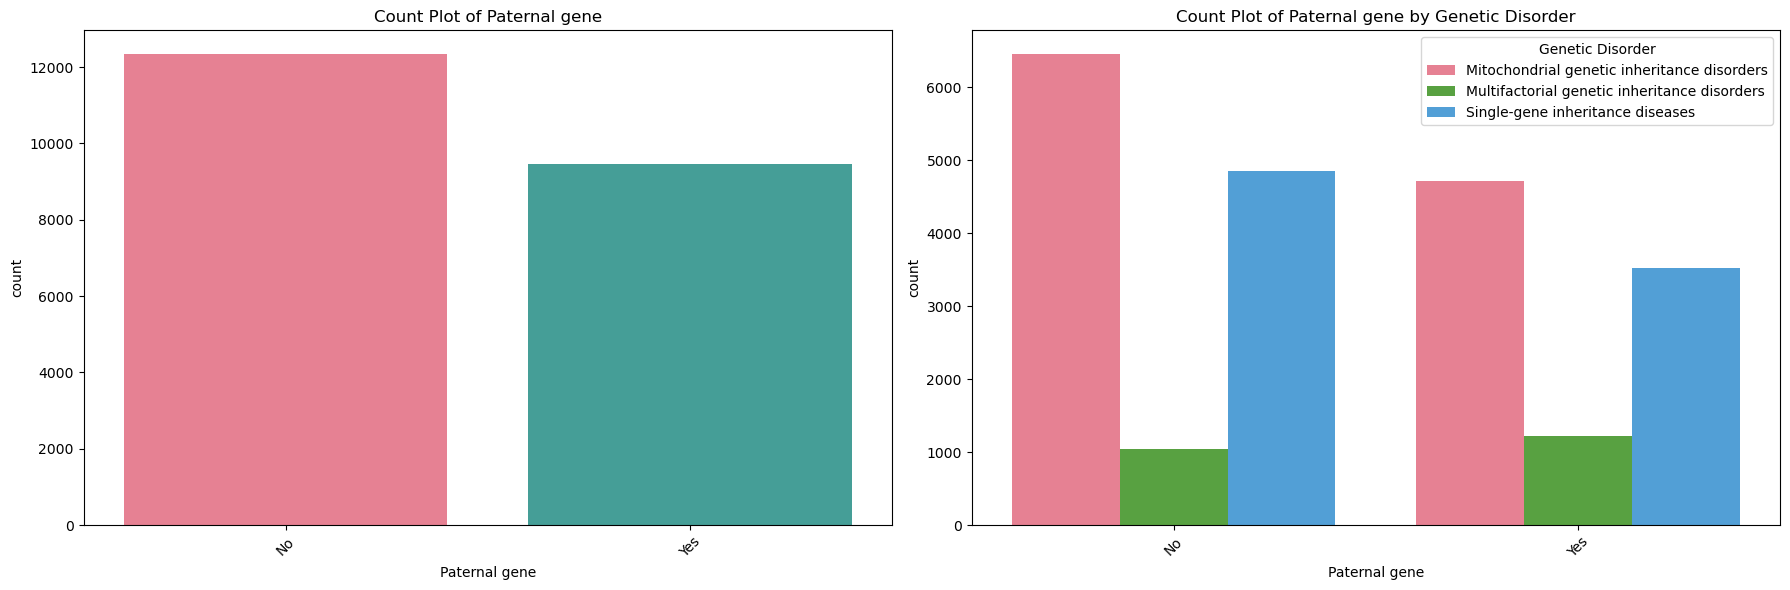

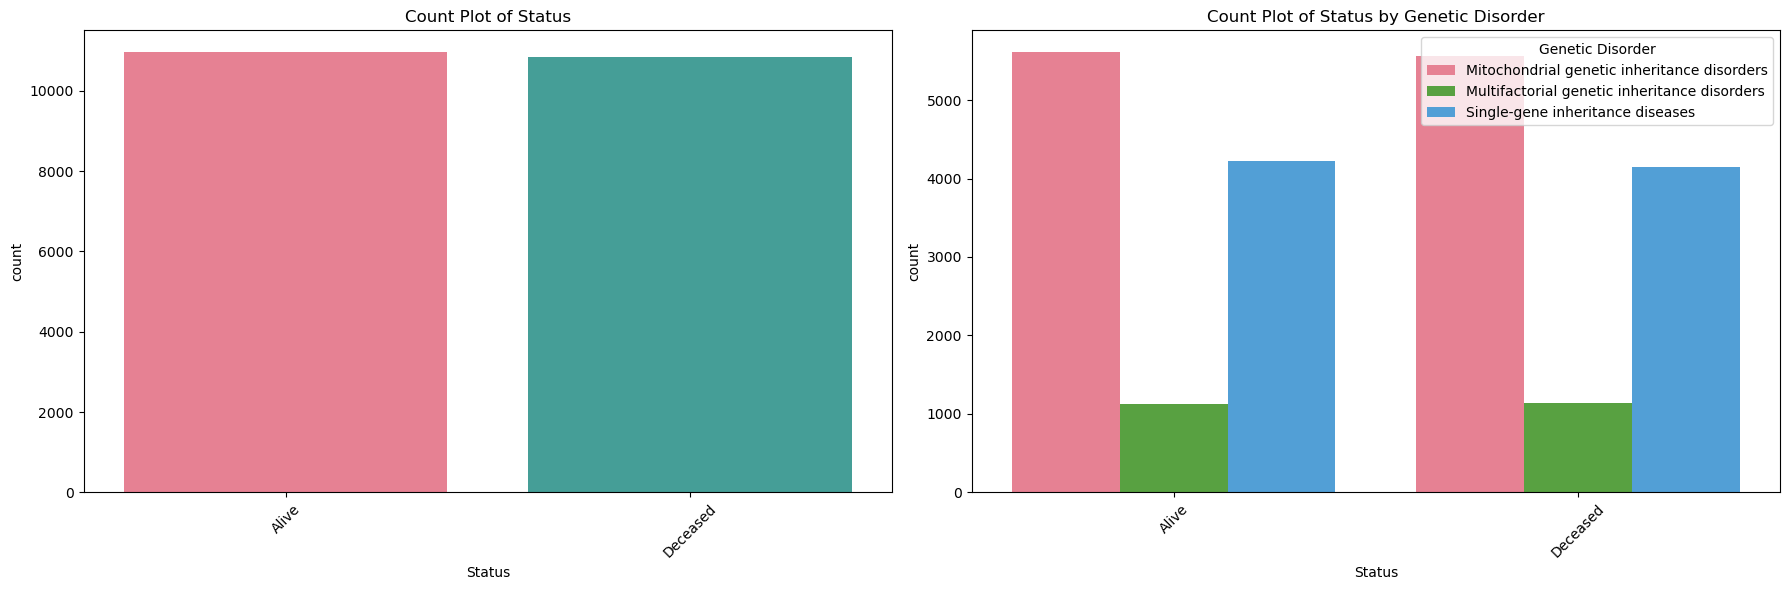

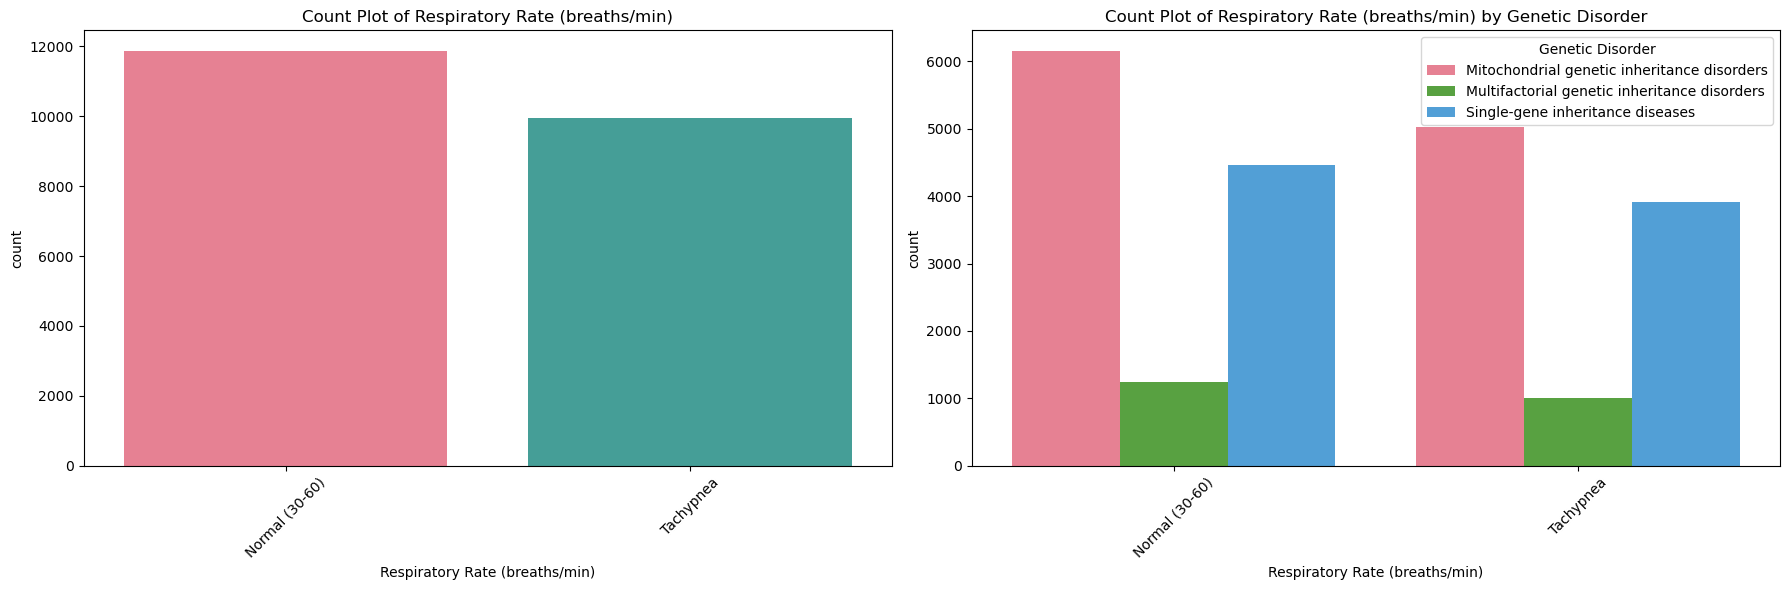

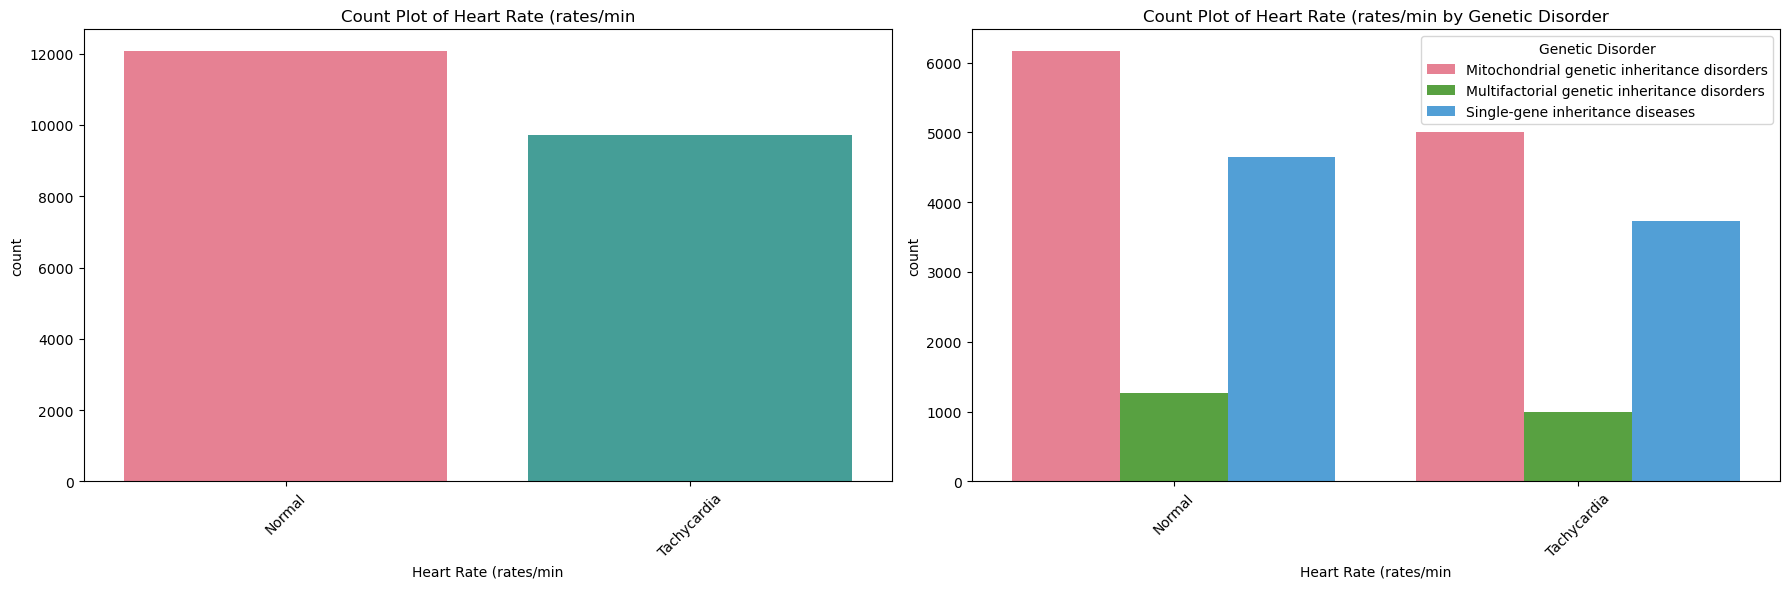

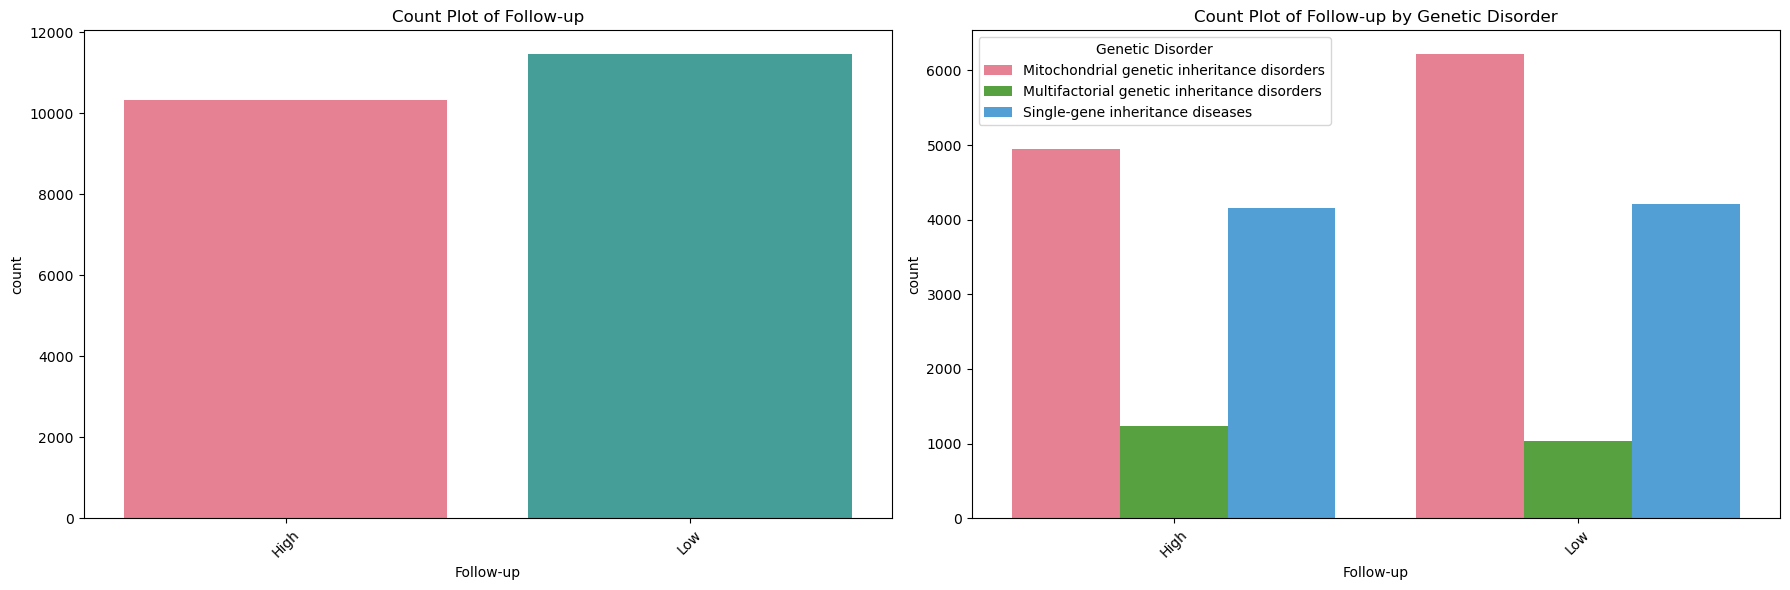

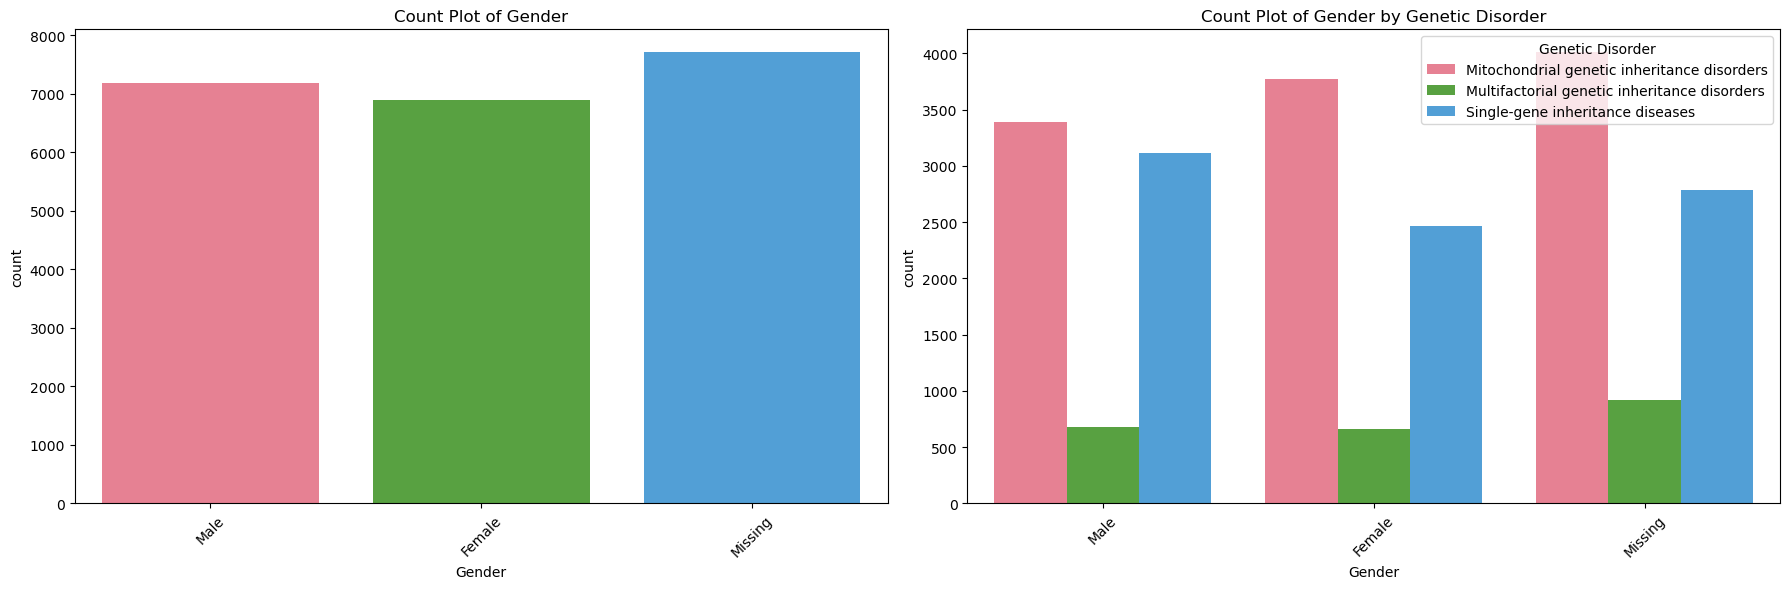

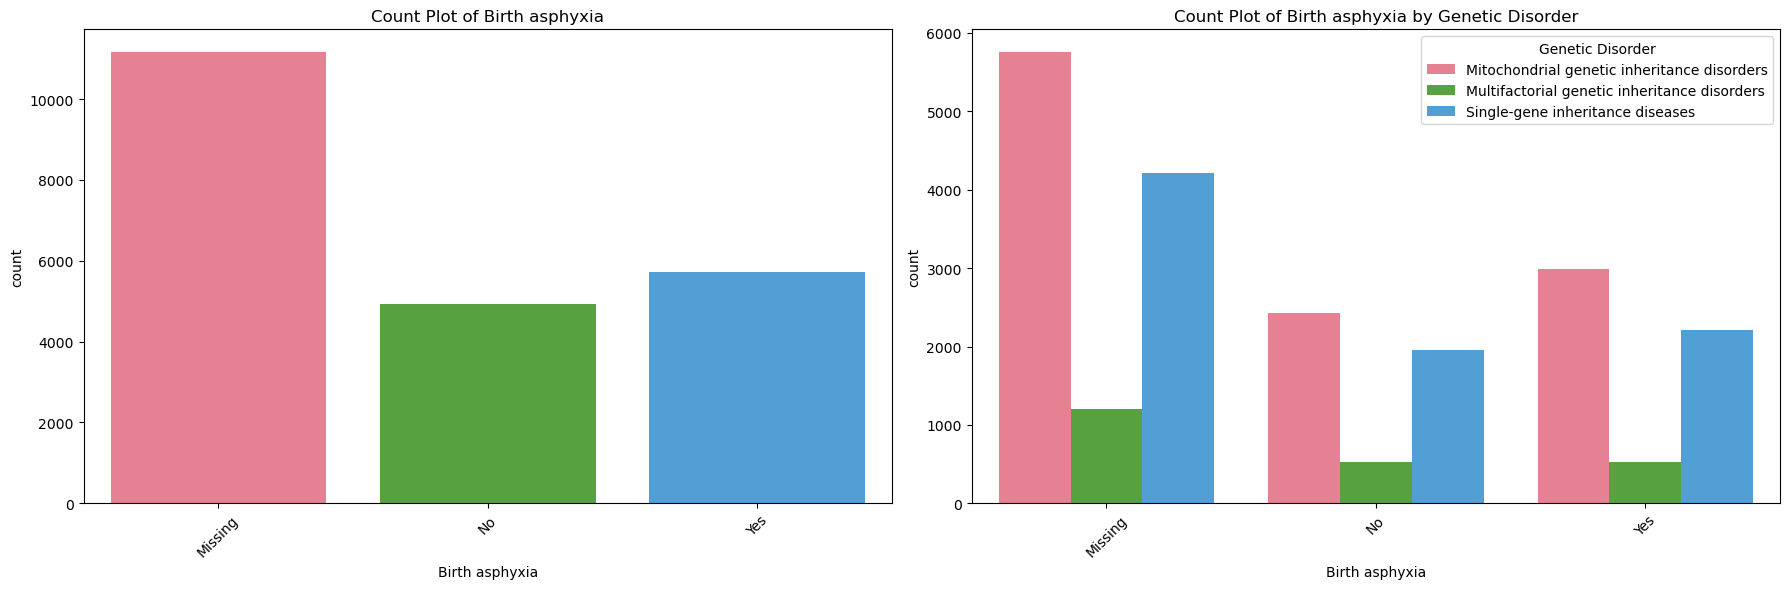

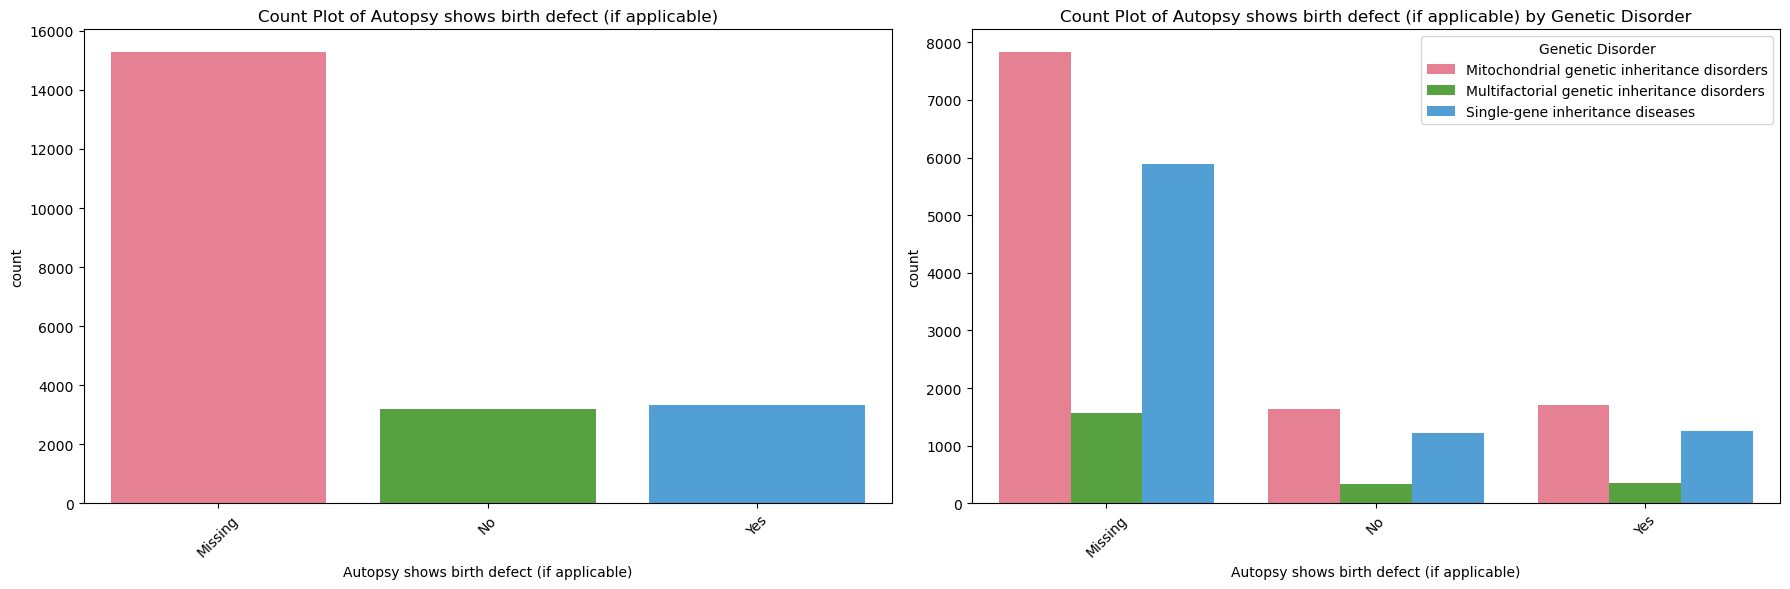

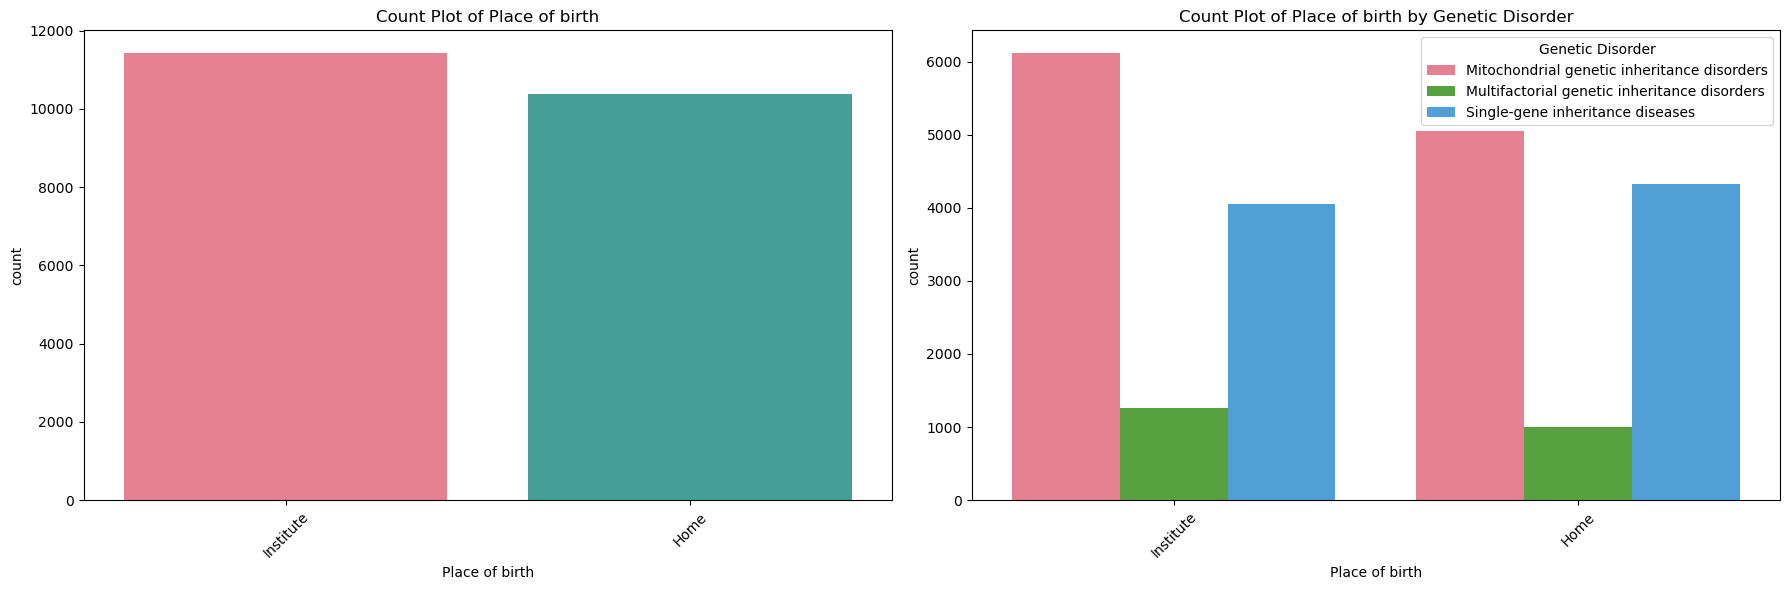

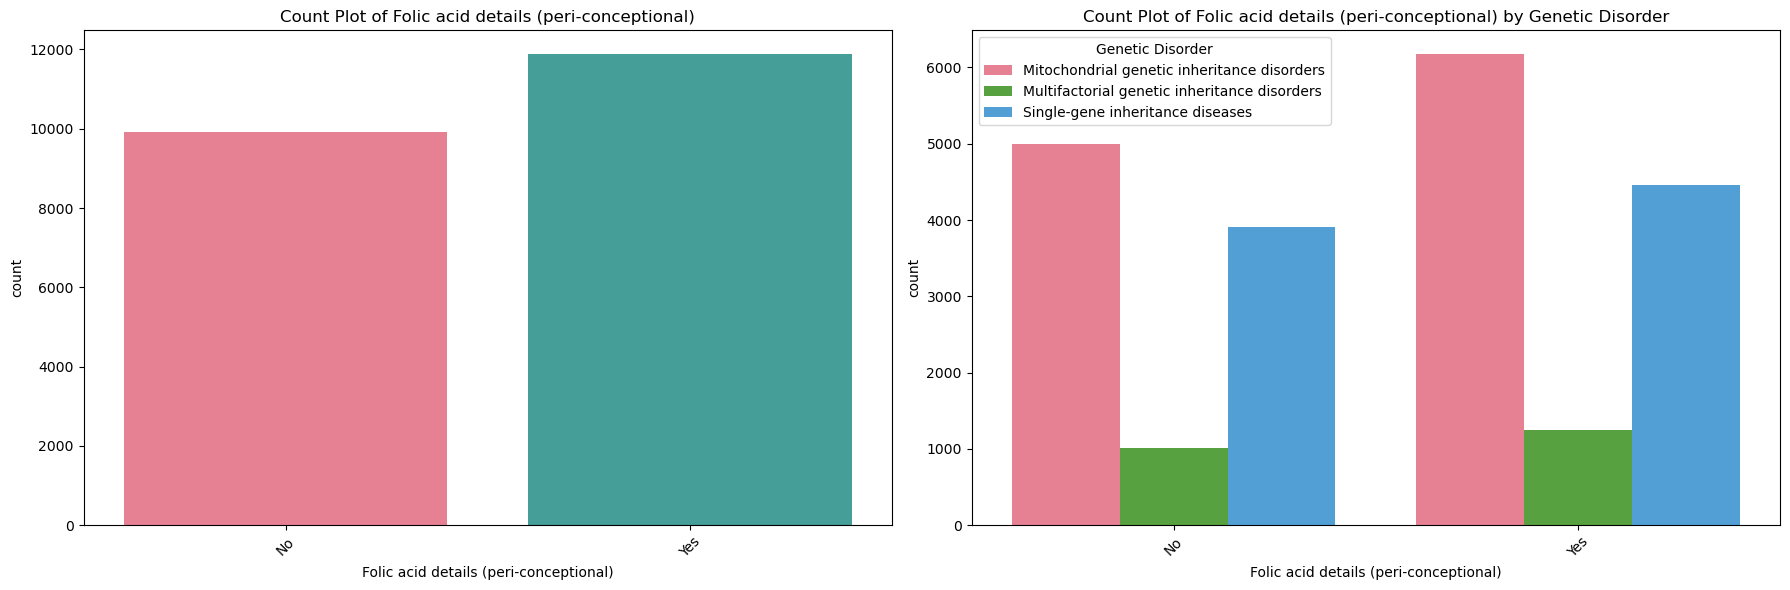

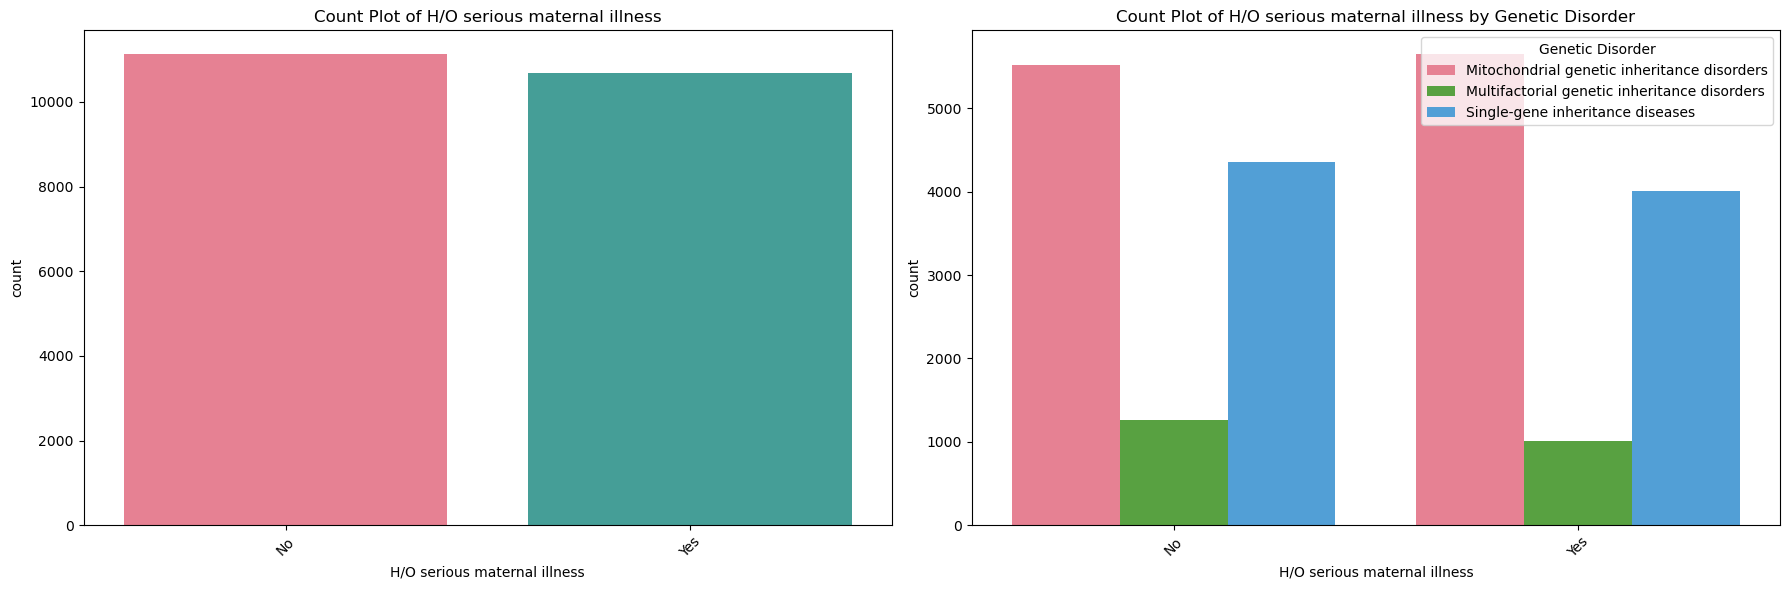

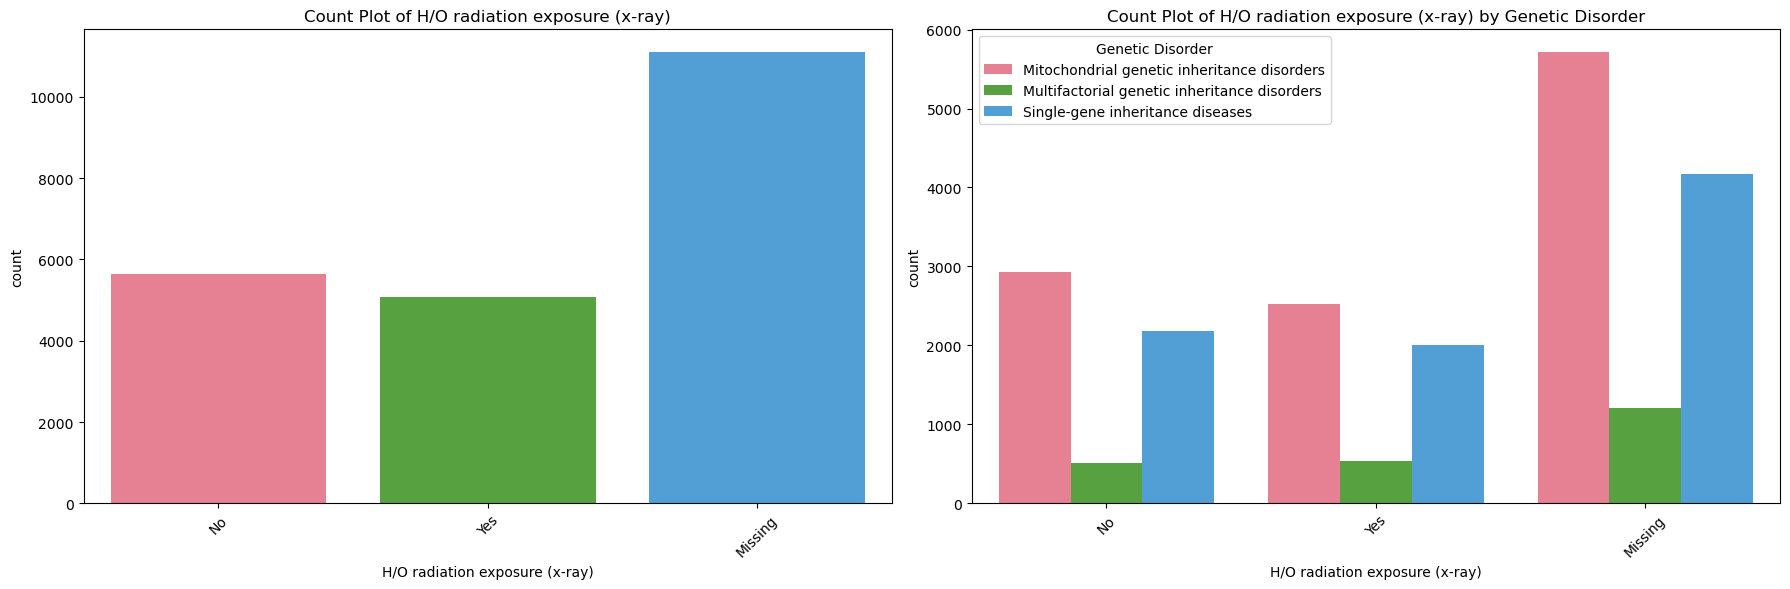

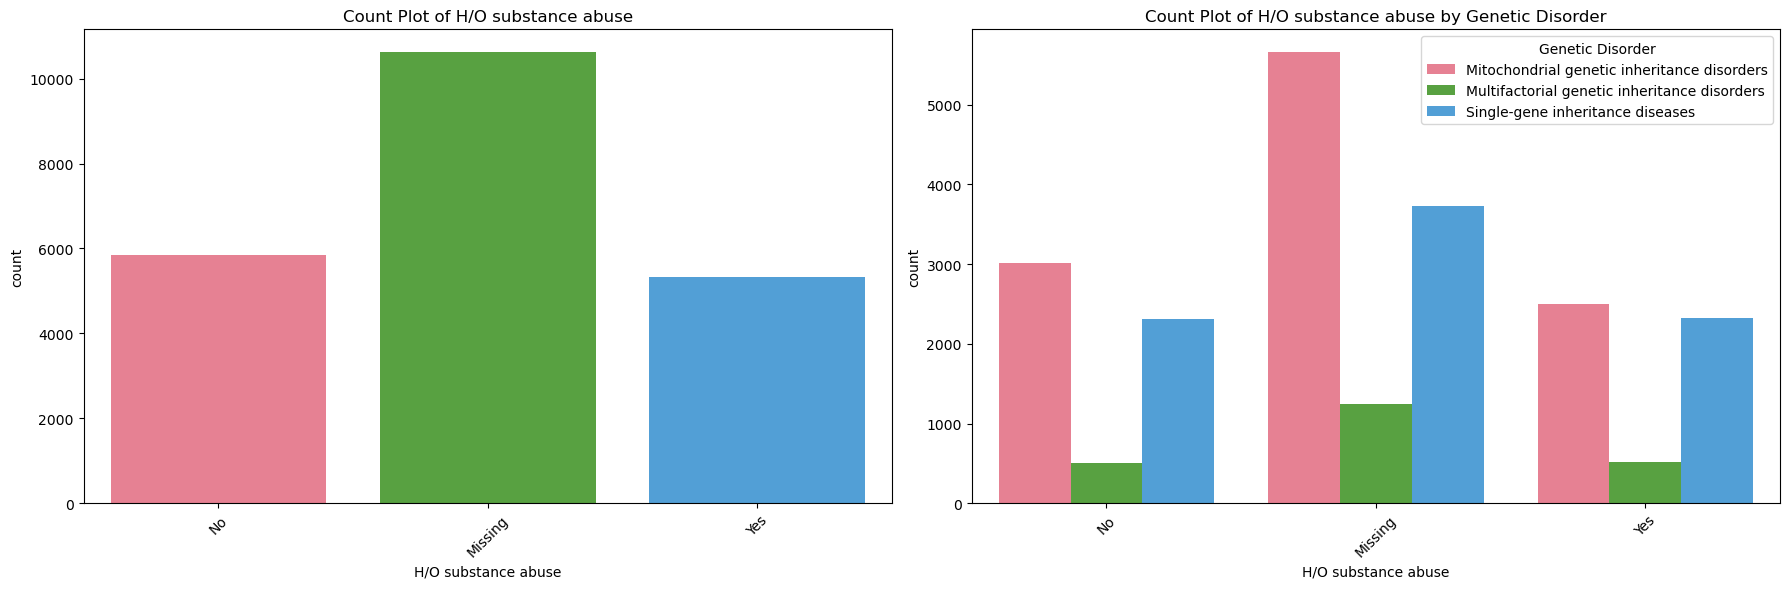

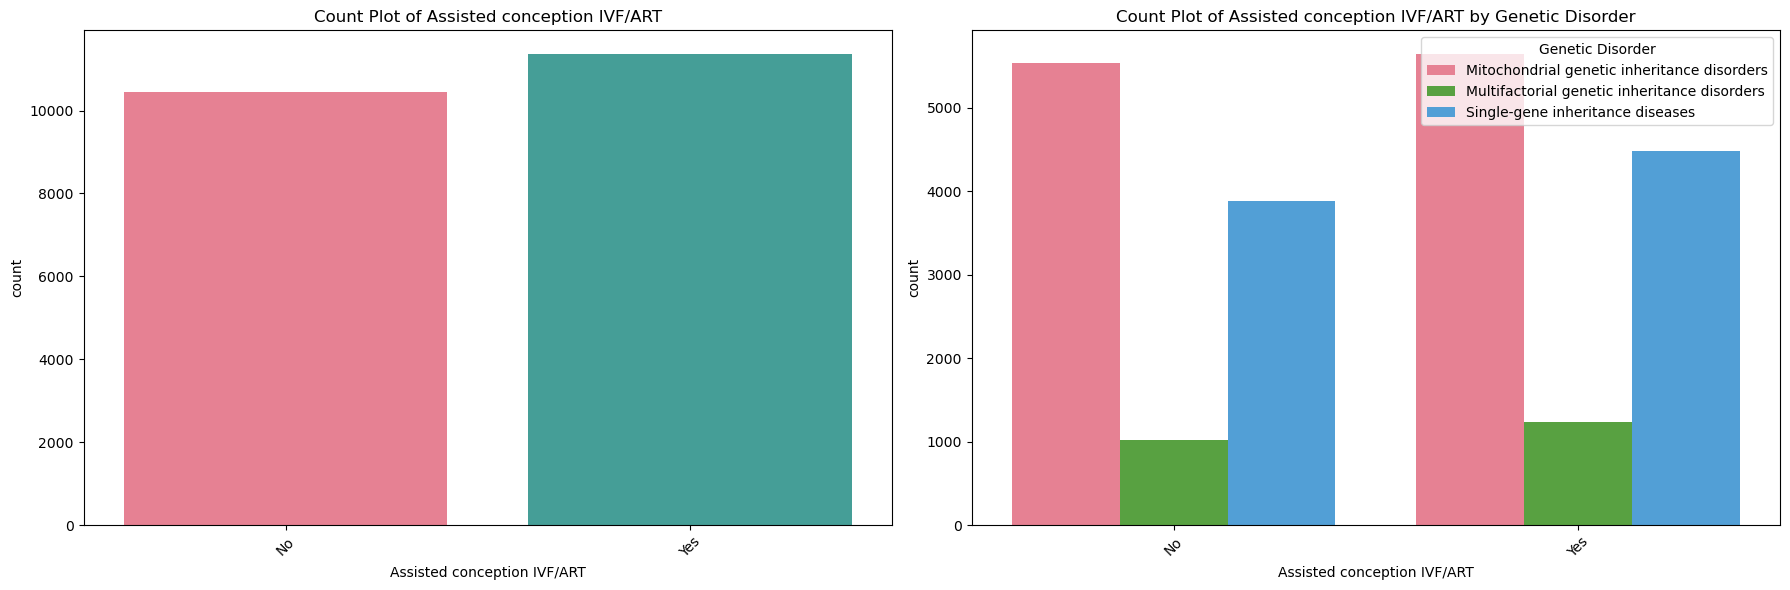

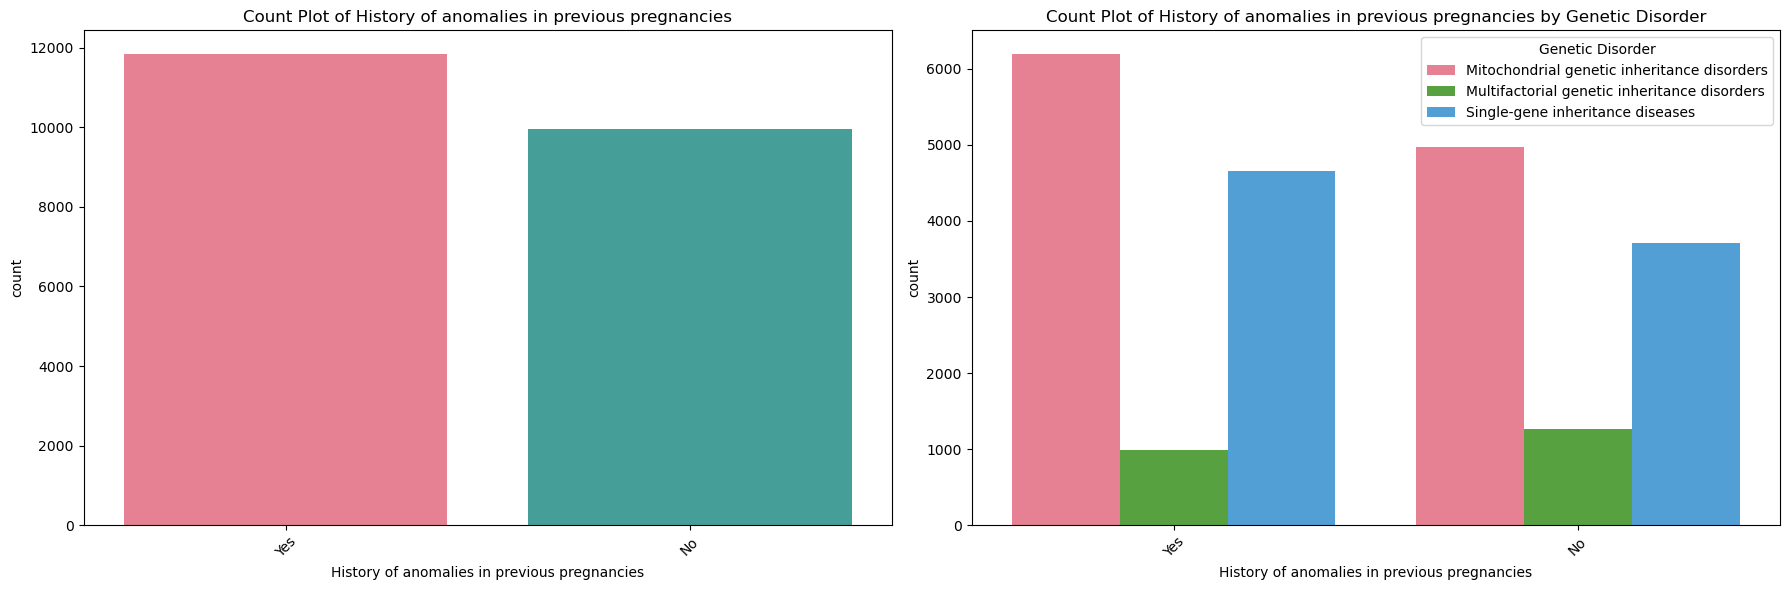

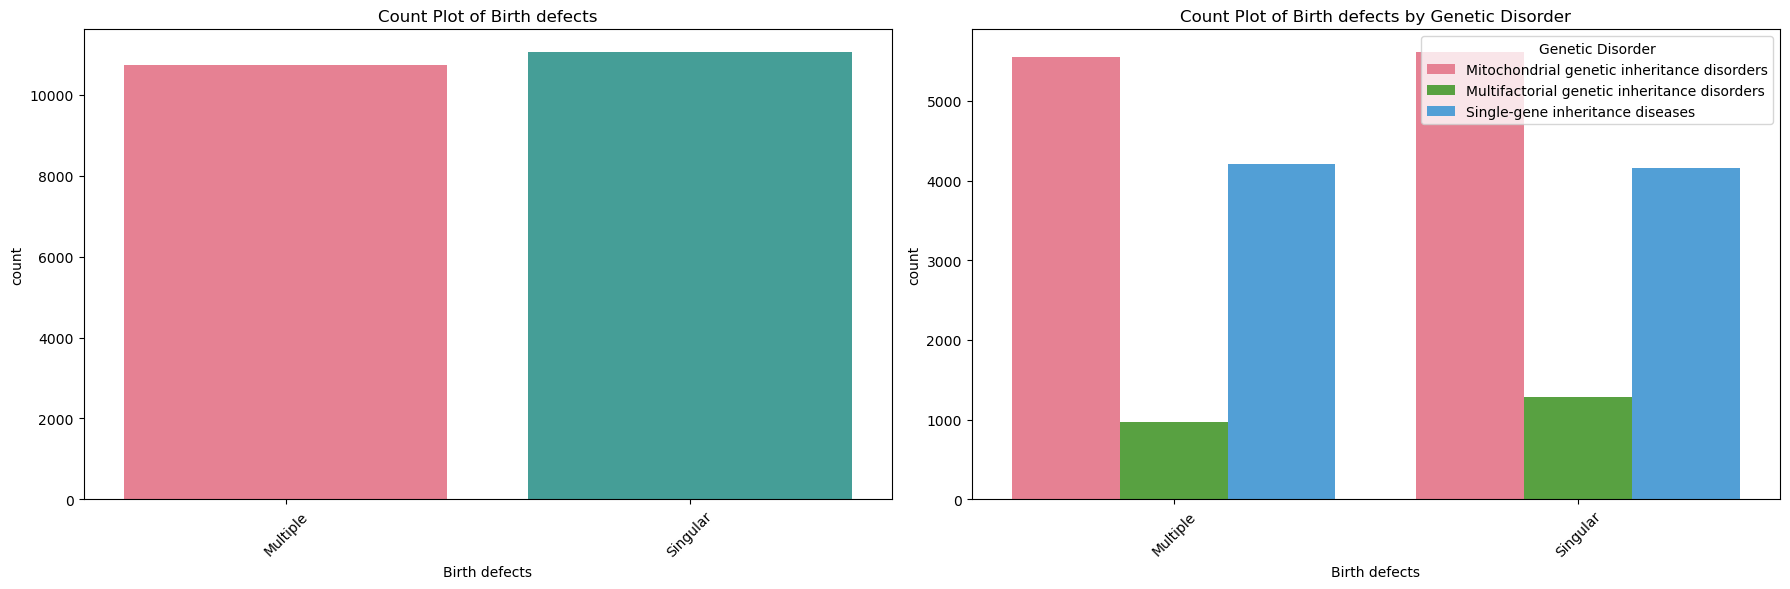

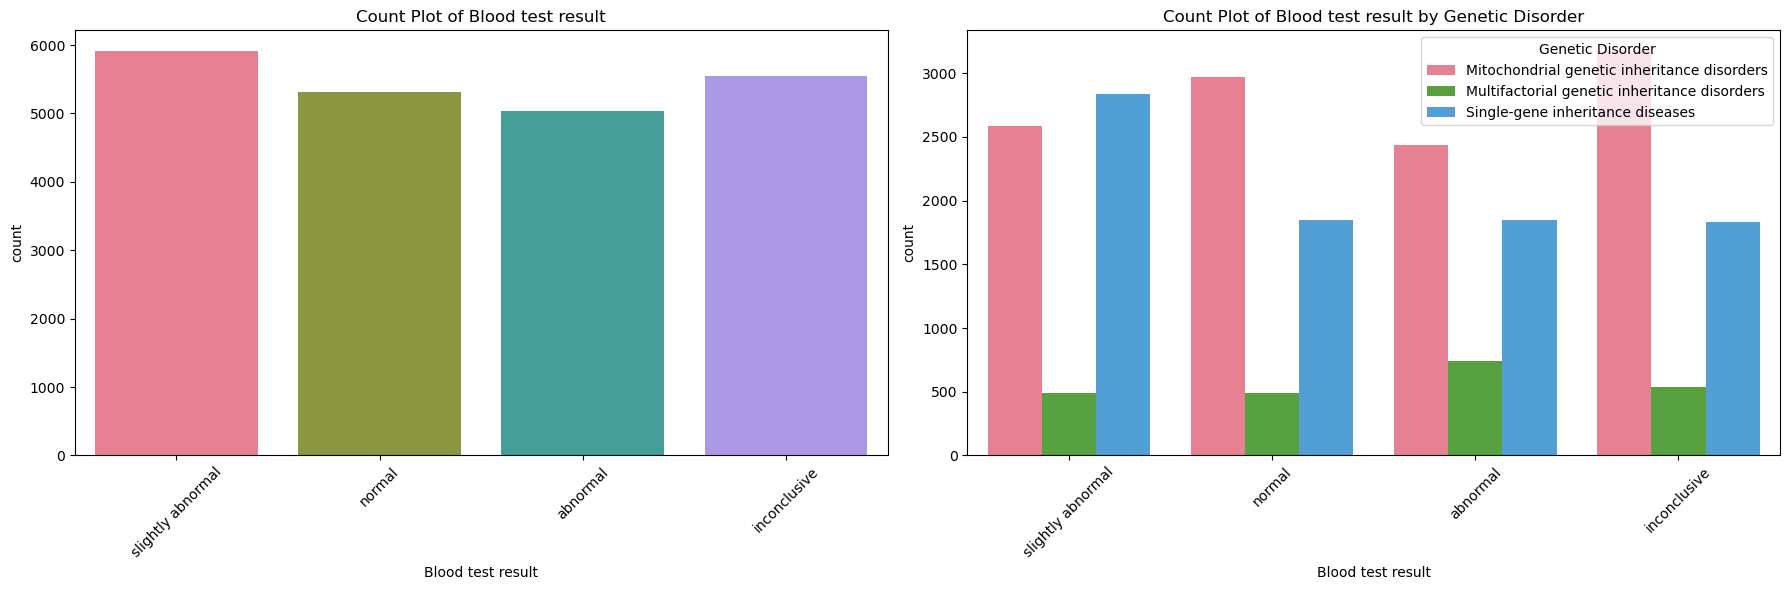

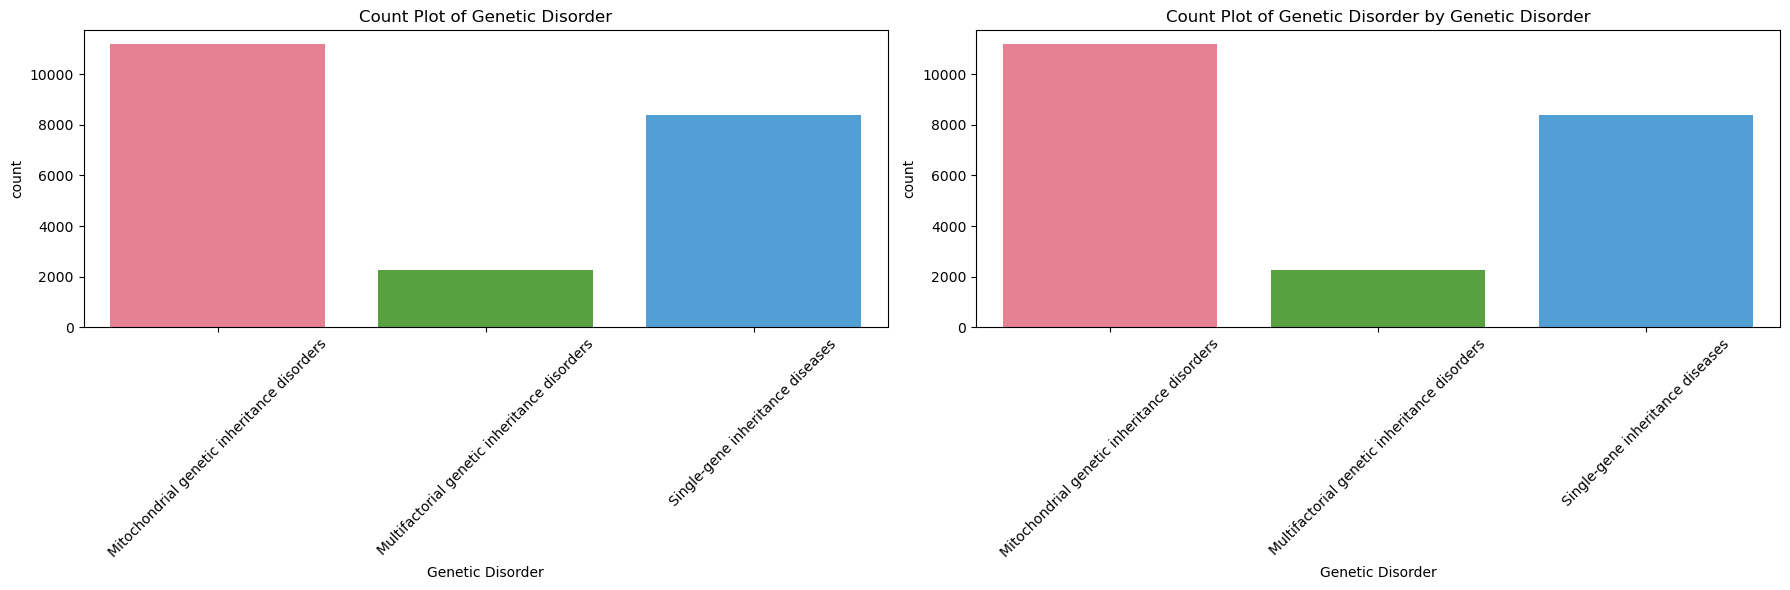

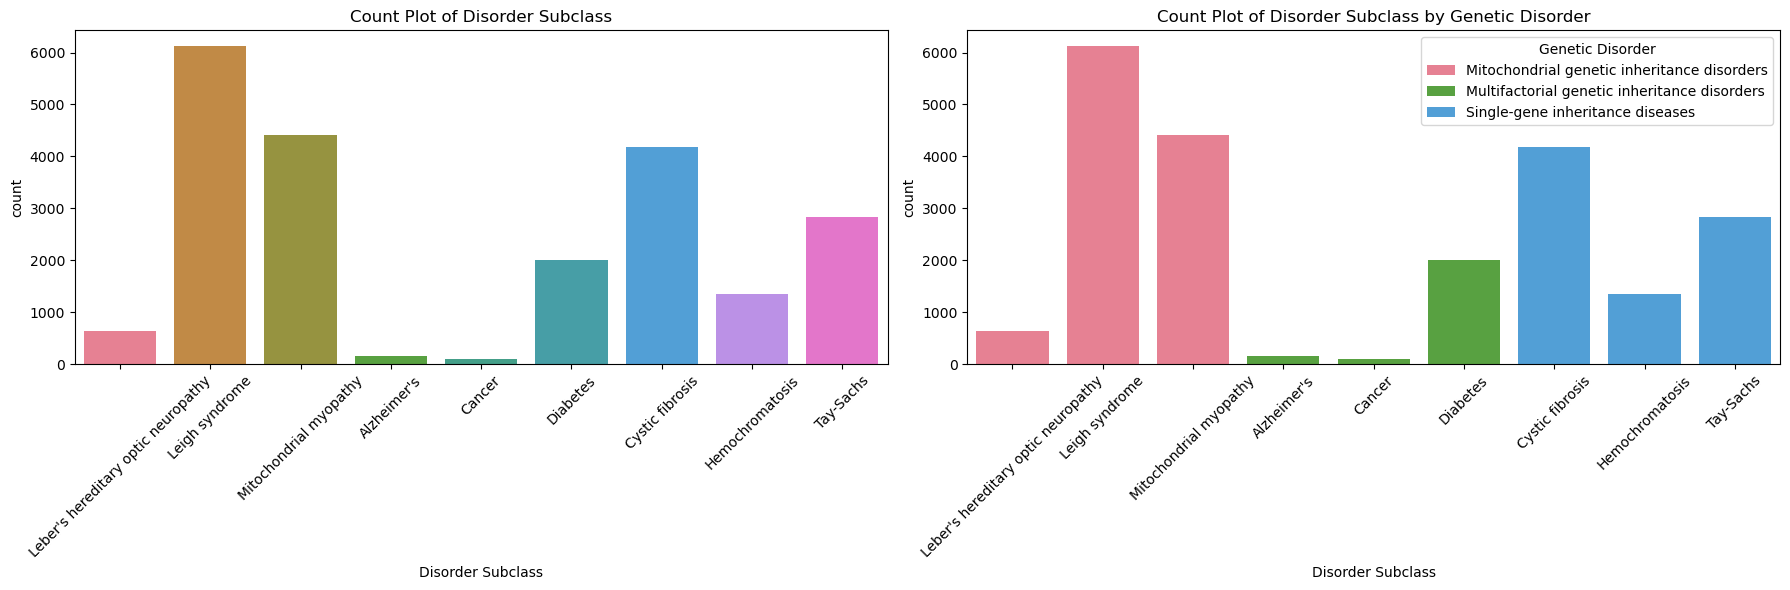

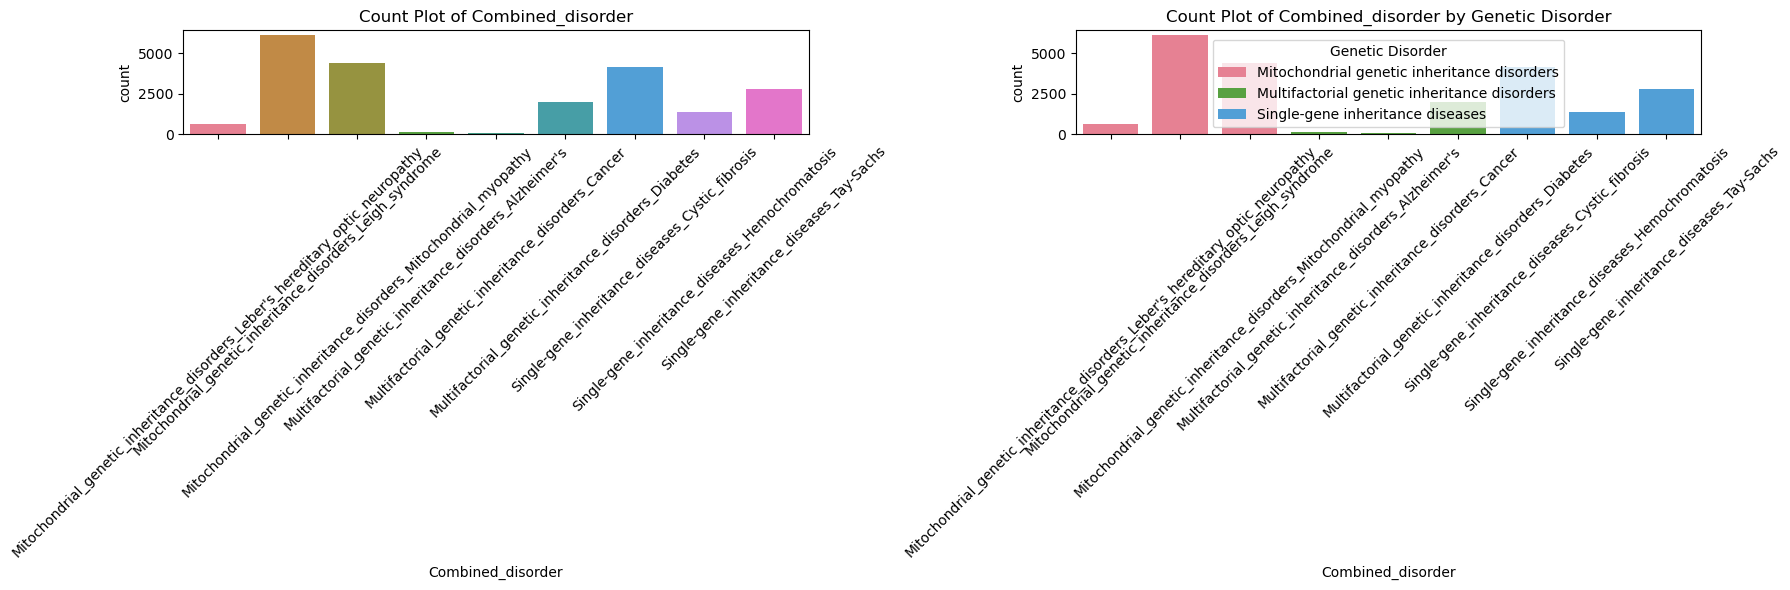

In [60]:
for feature in categorical_cols:

    # Determine the number of unique values in the hue feature
    num_unique_hue = df_train[feature].nunique()
    num_unique_target = df_train['Genetic Disorder'].nunique()

    custom_colors = sns.color_palette("husl", n_colors=num_unique_hue)  # Or any other palette with sufficient colors

    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

    # First subplot: Count plot of the feature without the target
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue=feature, data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    custom_colors = sns.color_palette("husl", n_colors=num_unique_target)  # Or any other palette with sufficient colors

    # Second subplot: Count plot of the feature with the target
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='Genetic Disorder', data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature} by Genetic Disorder')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



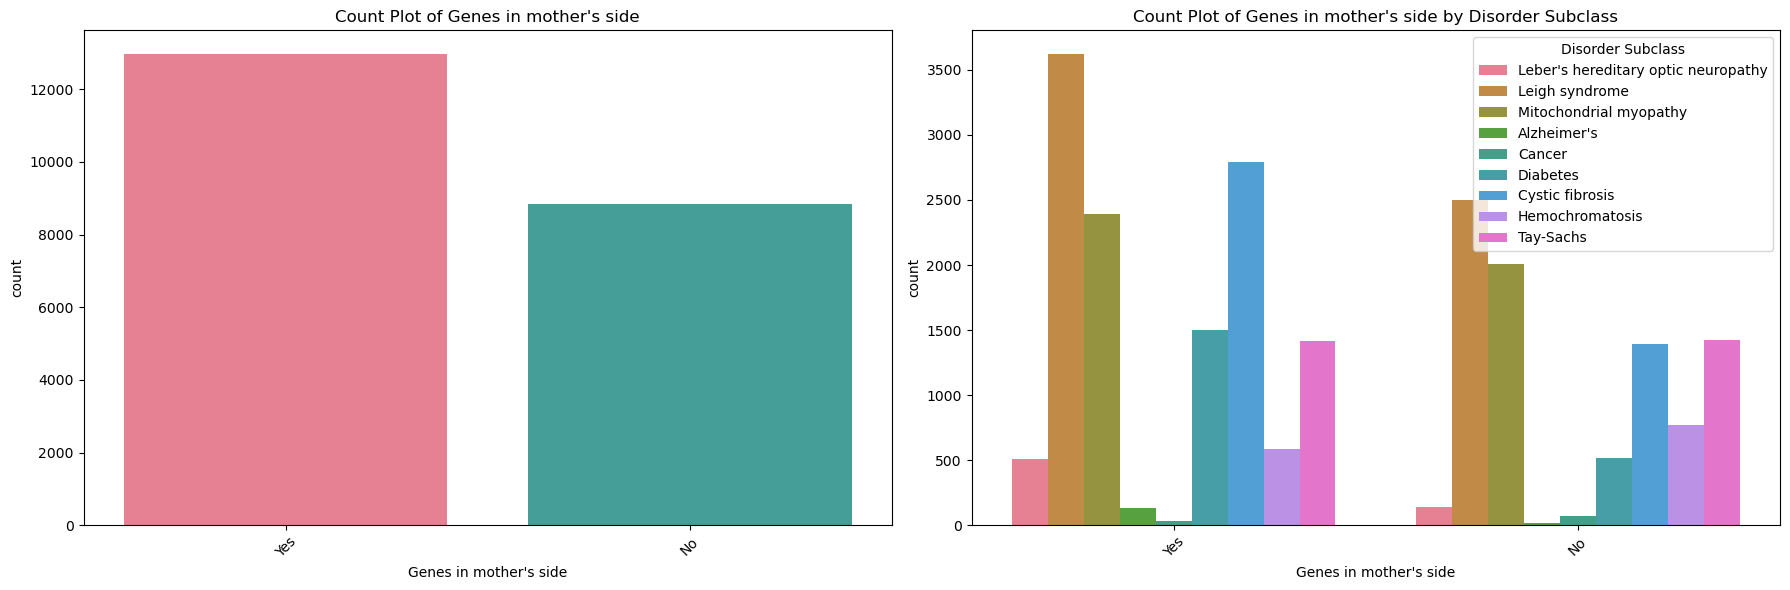

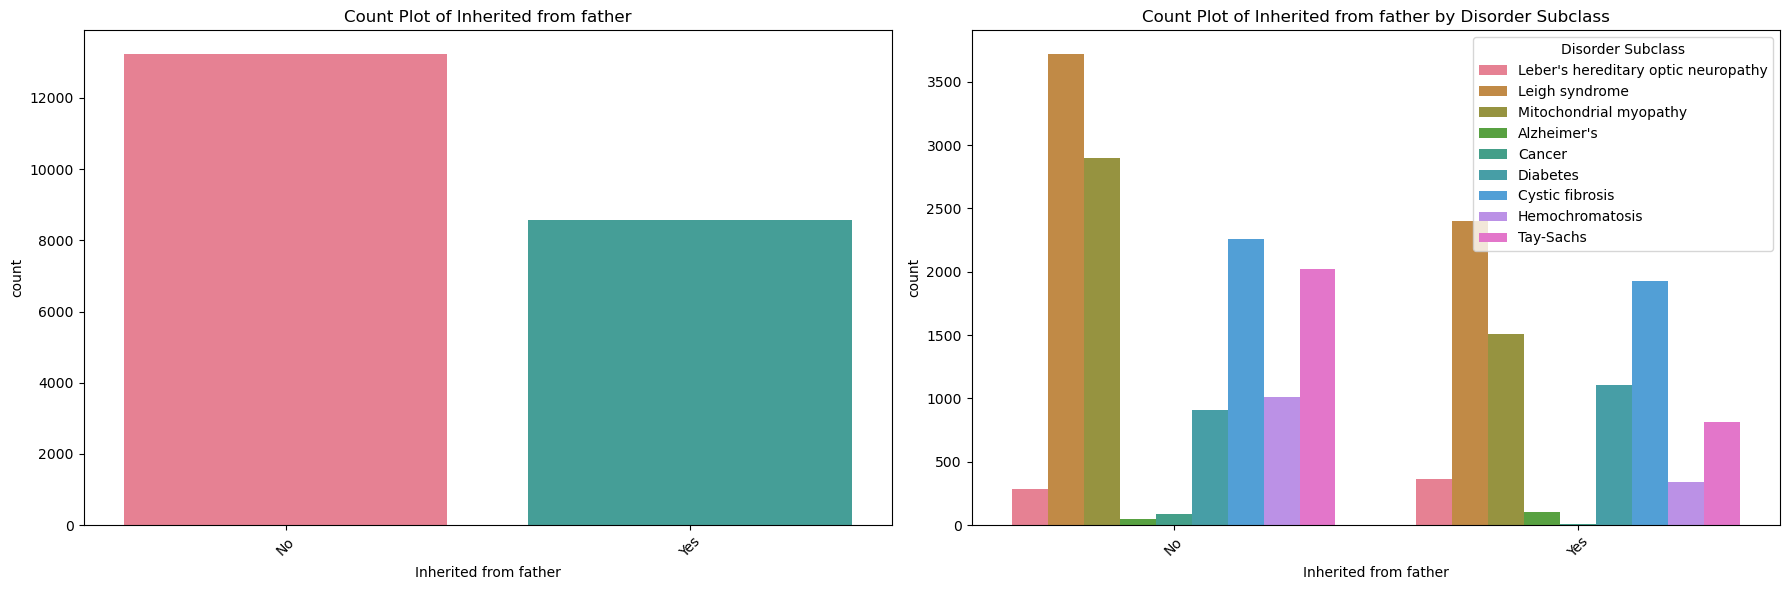

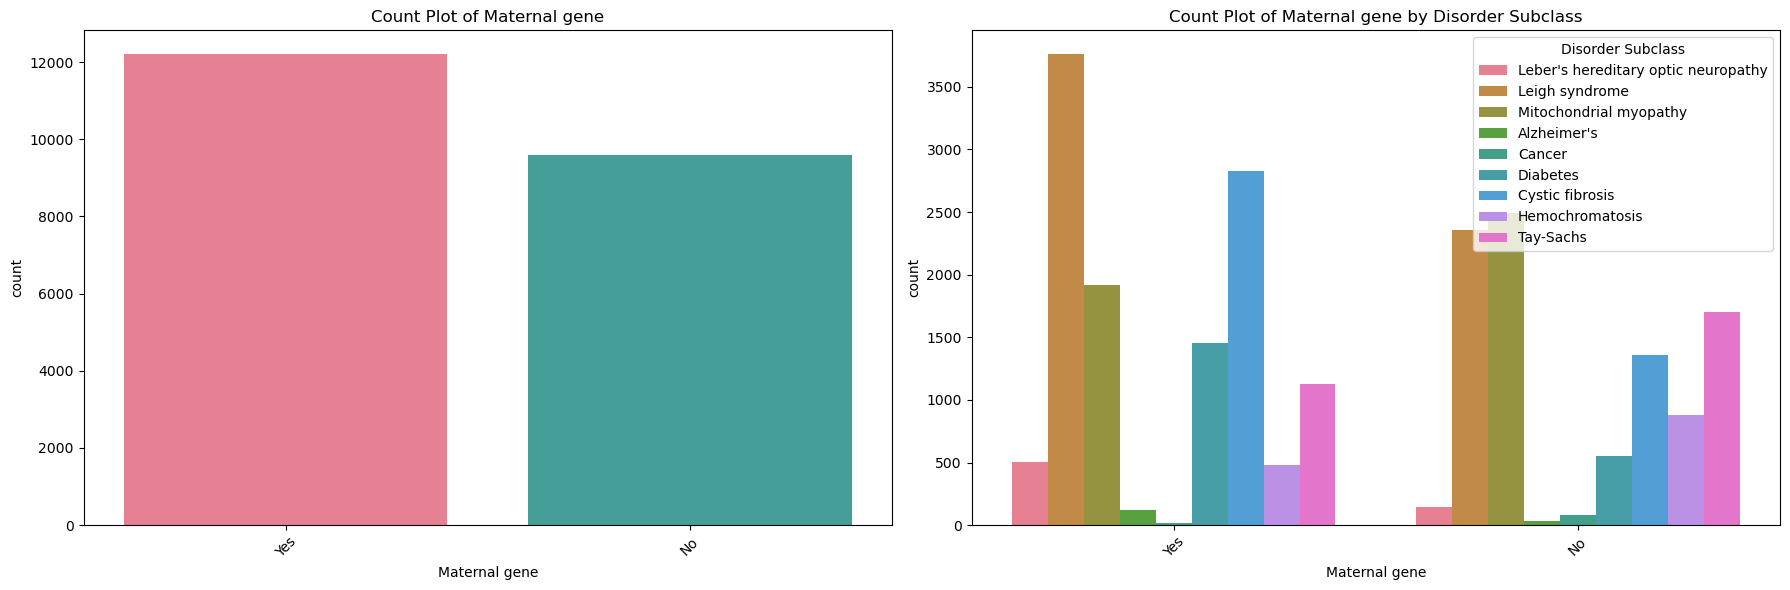

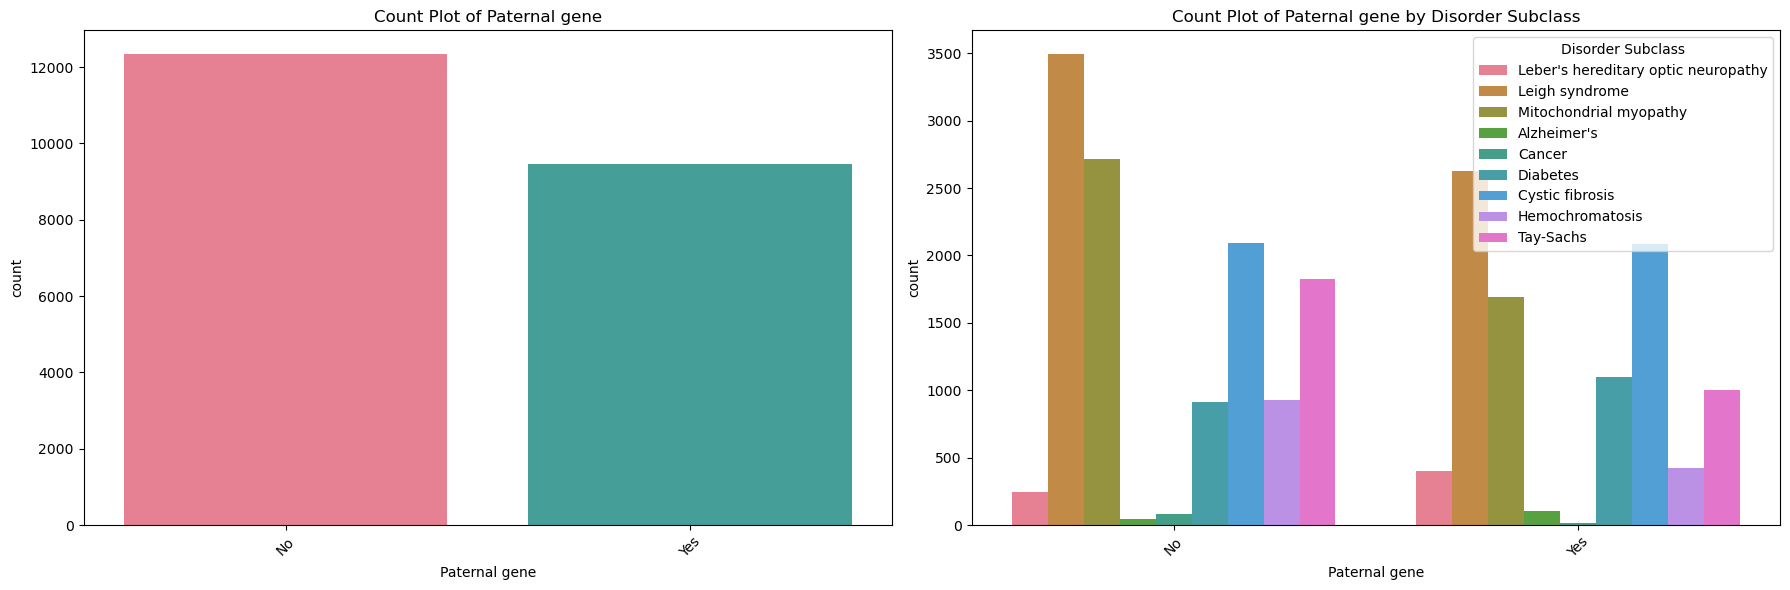

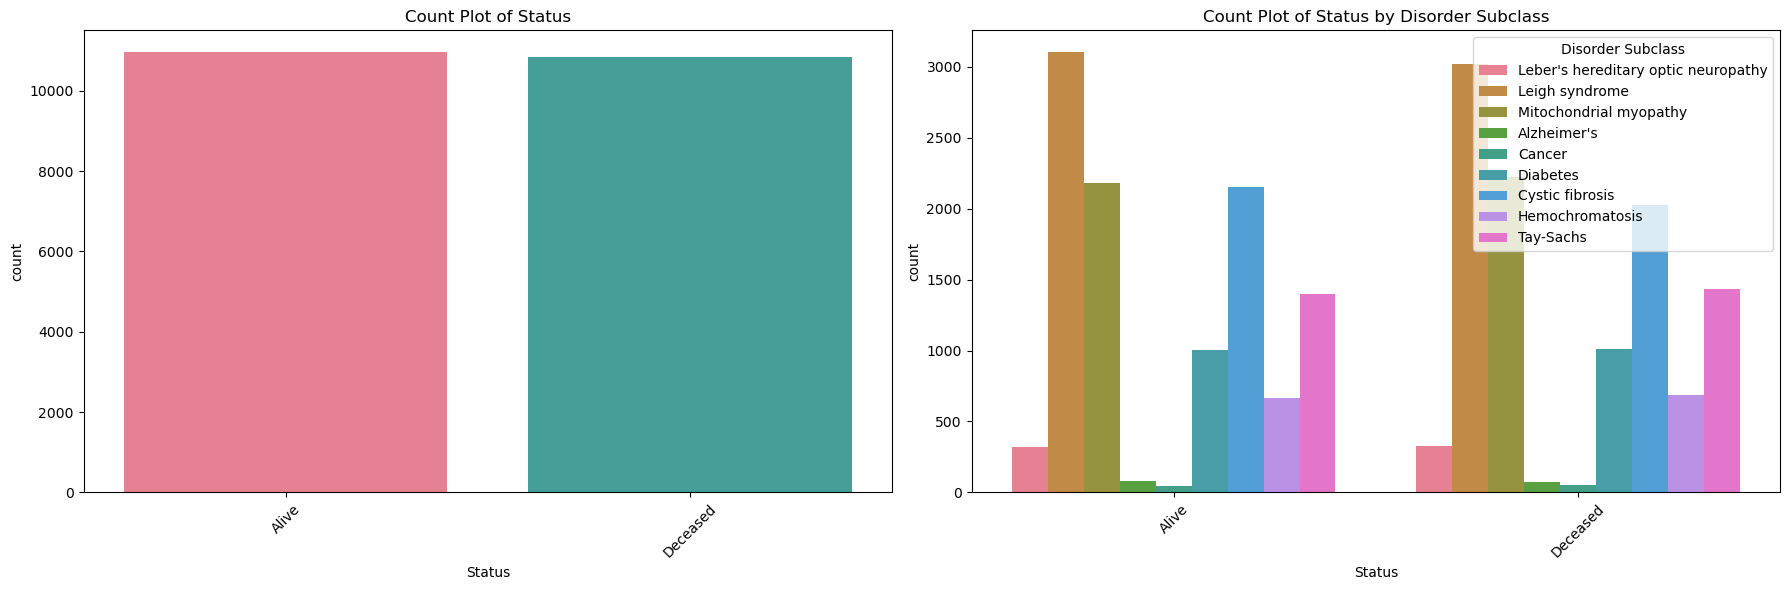

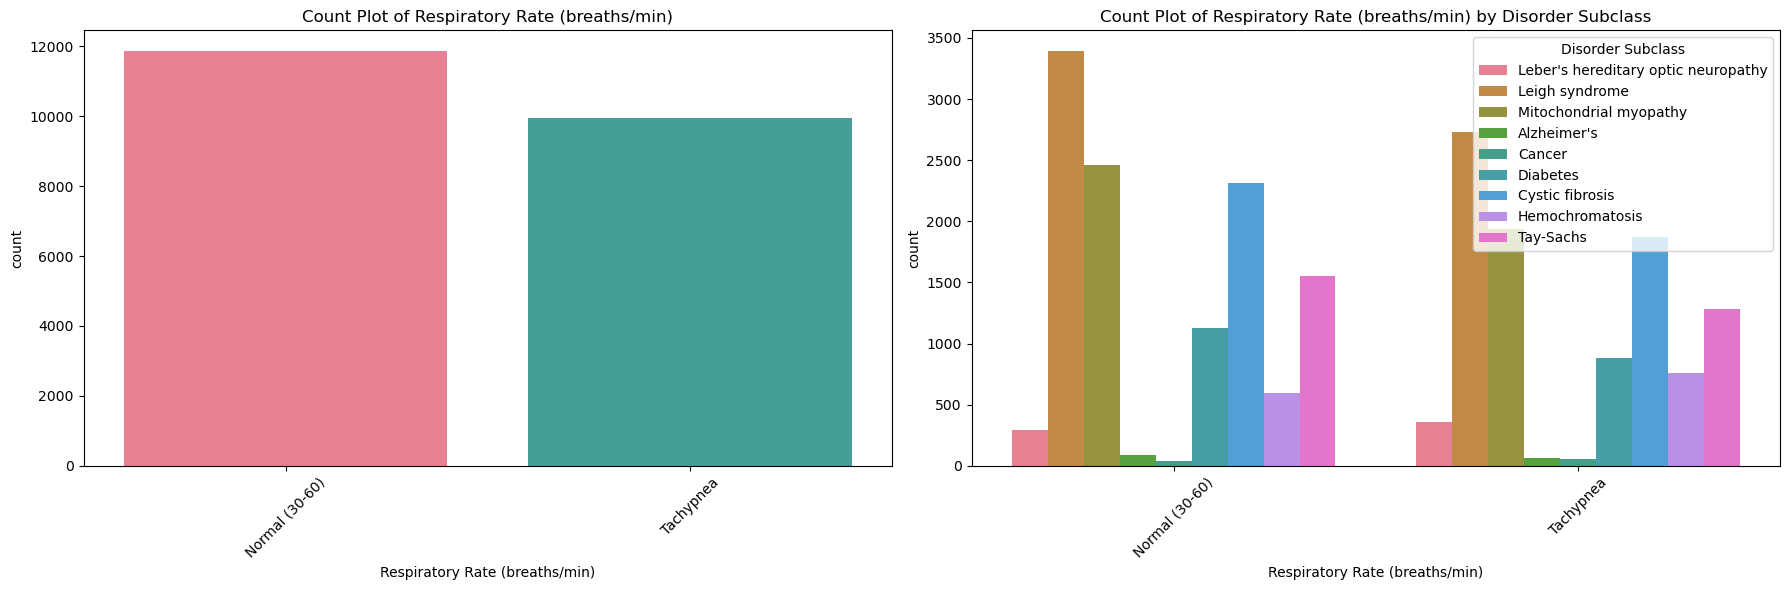

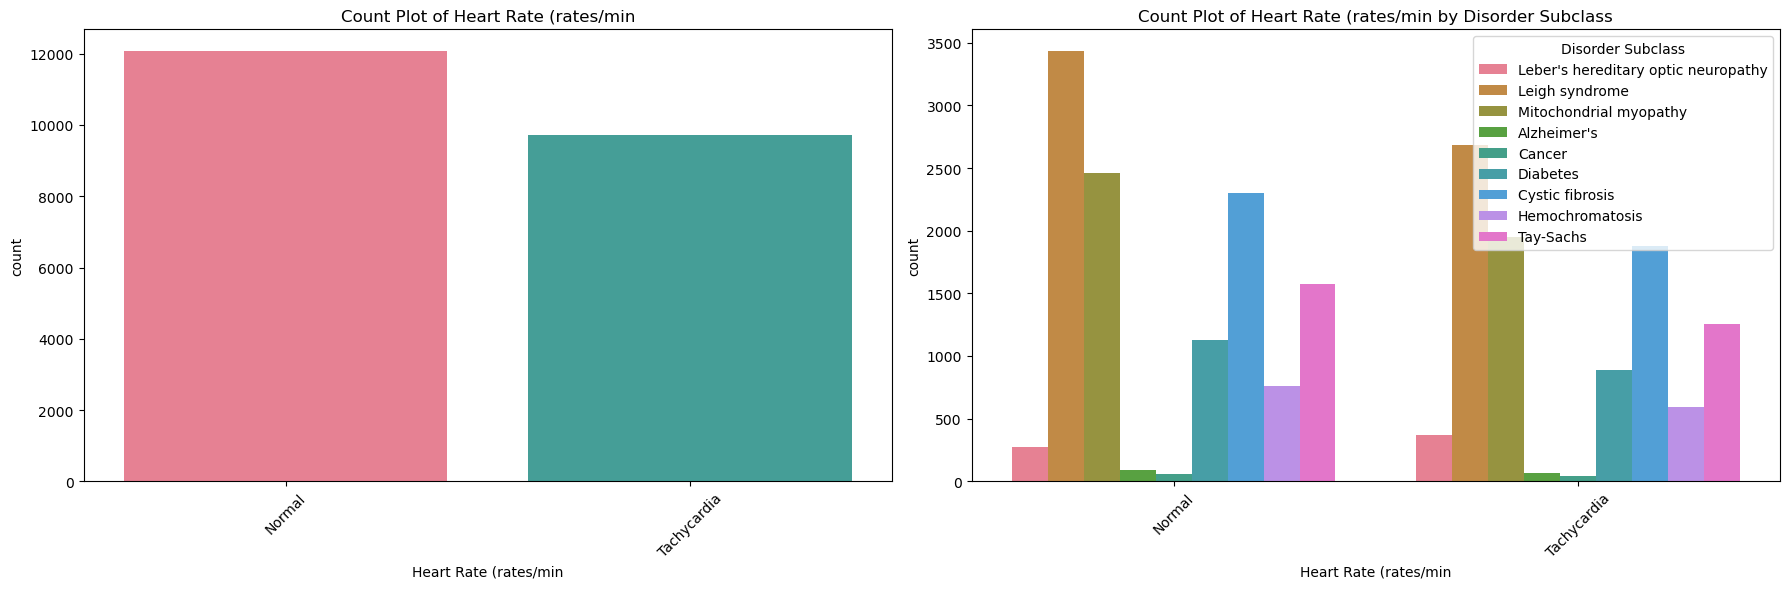

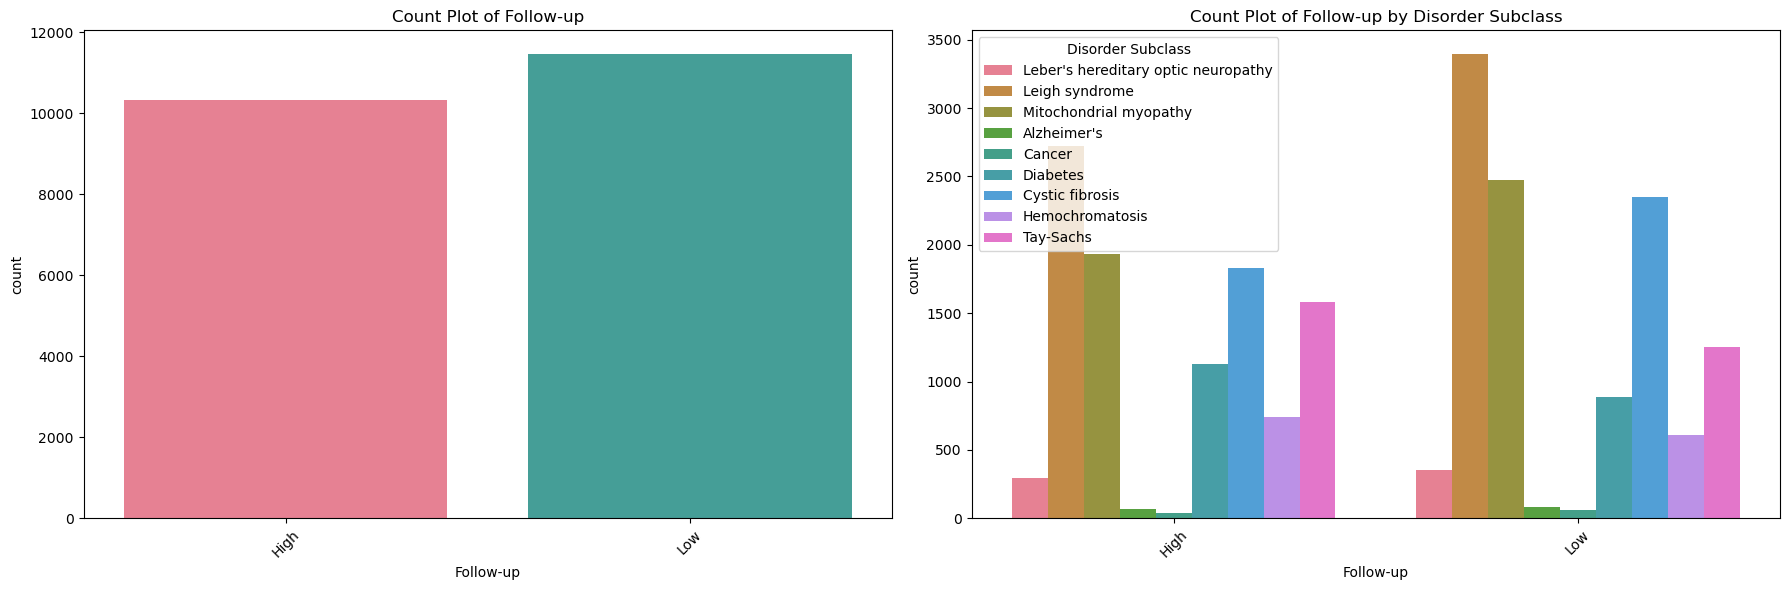

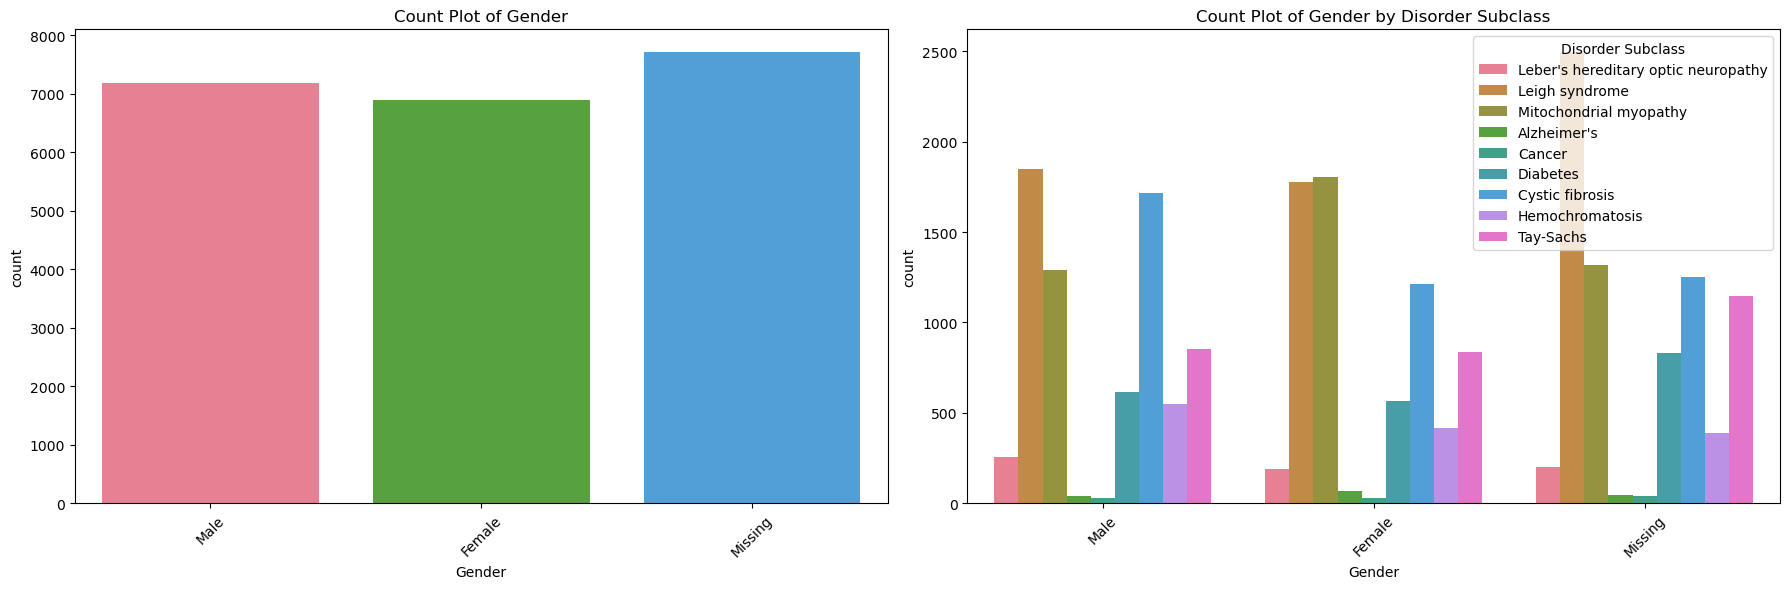

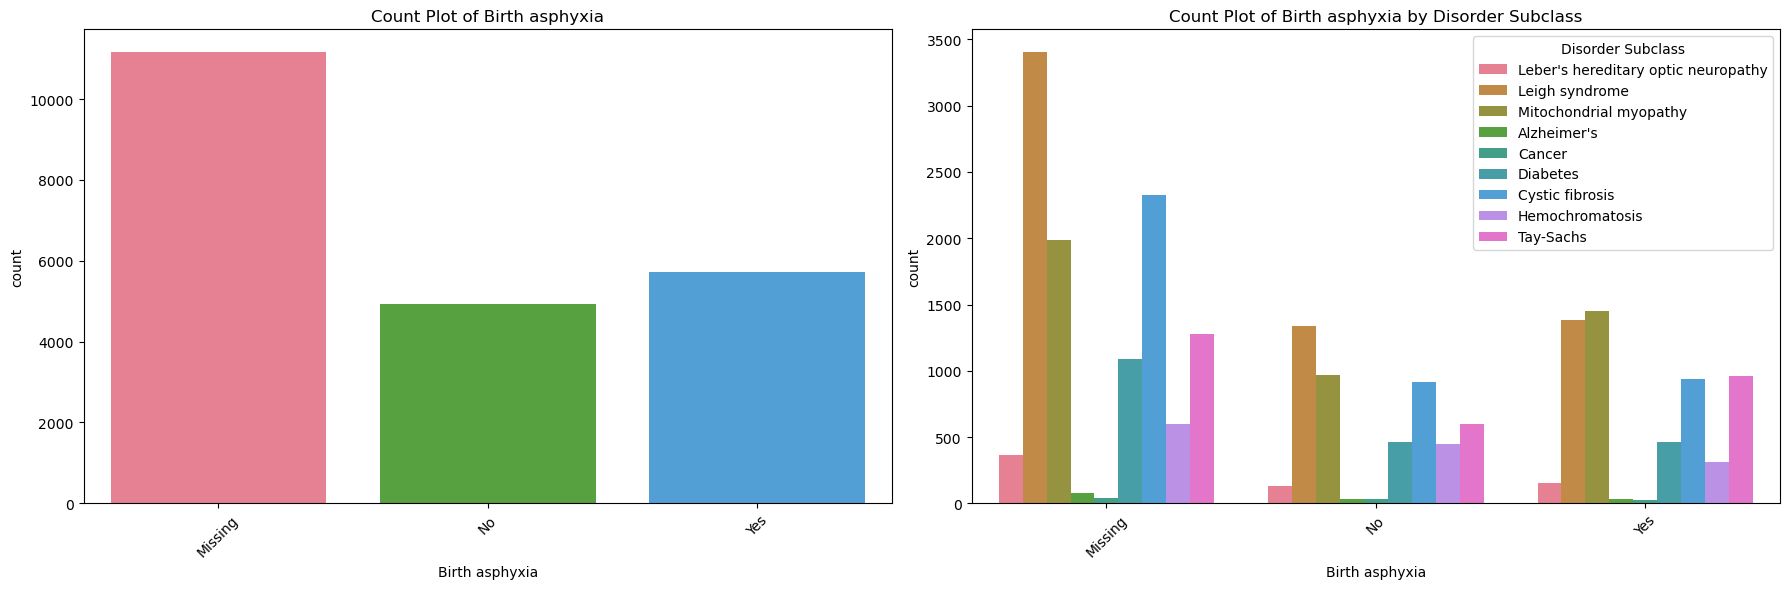

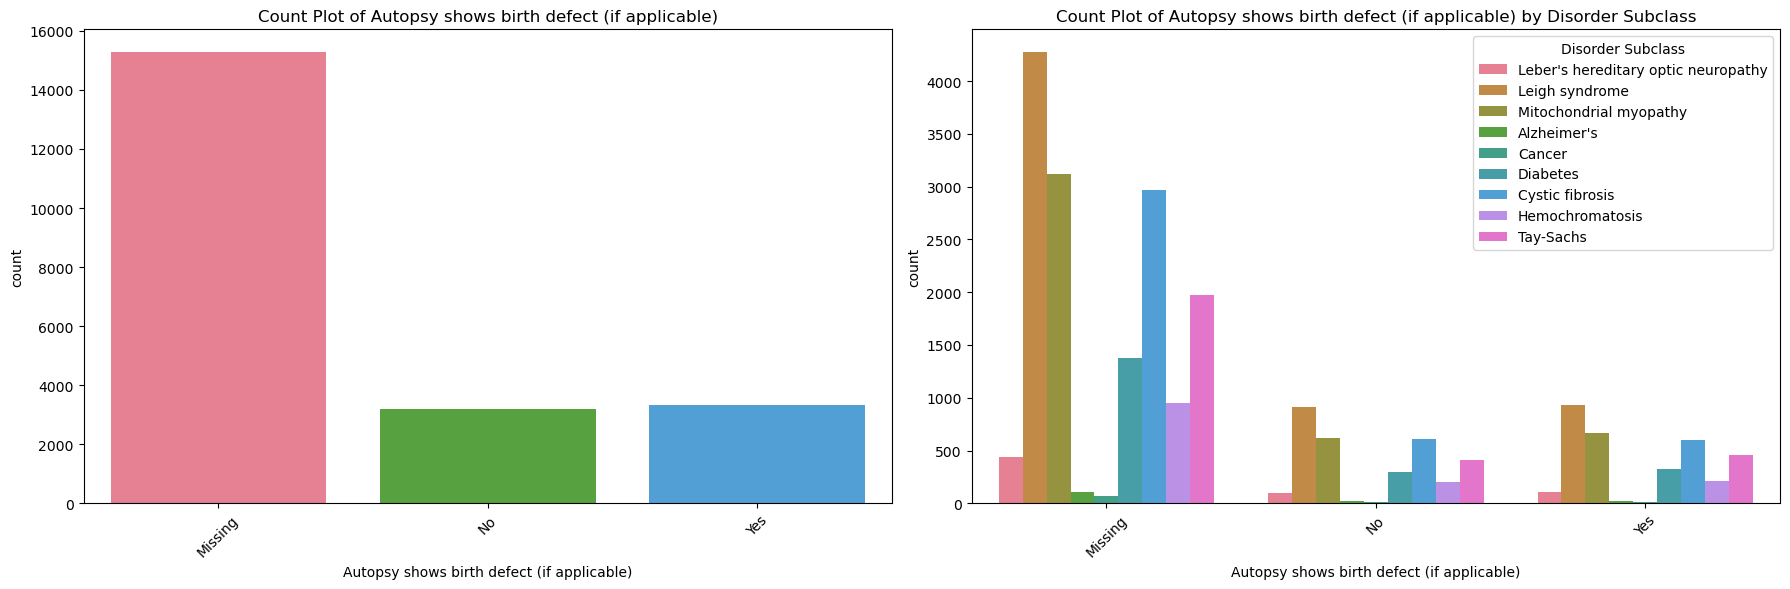

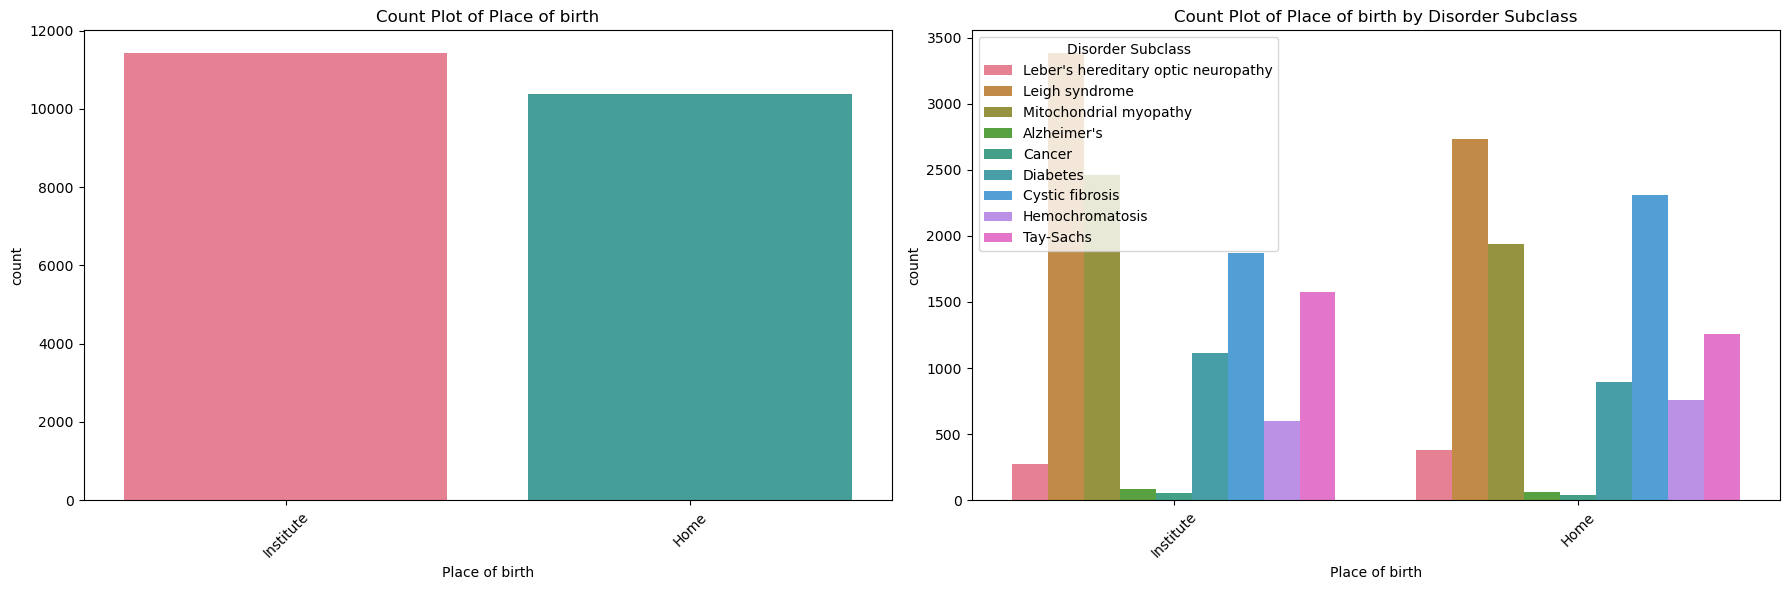

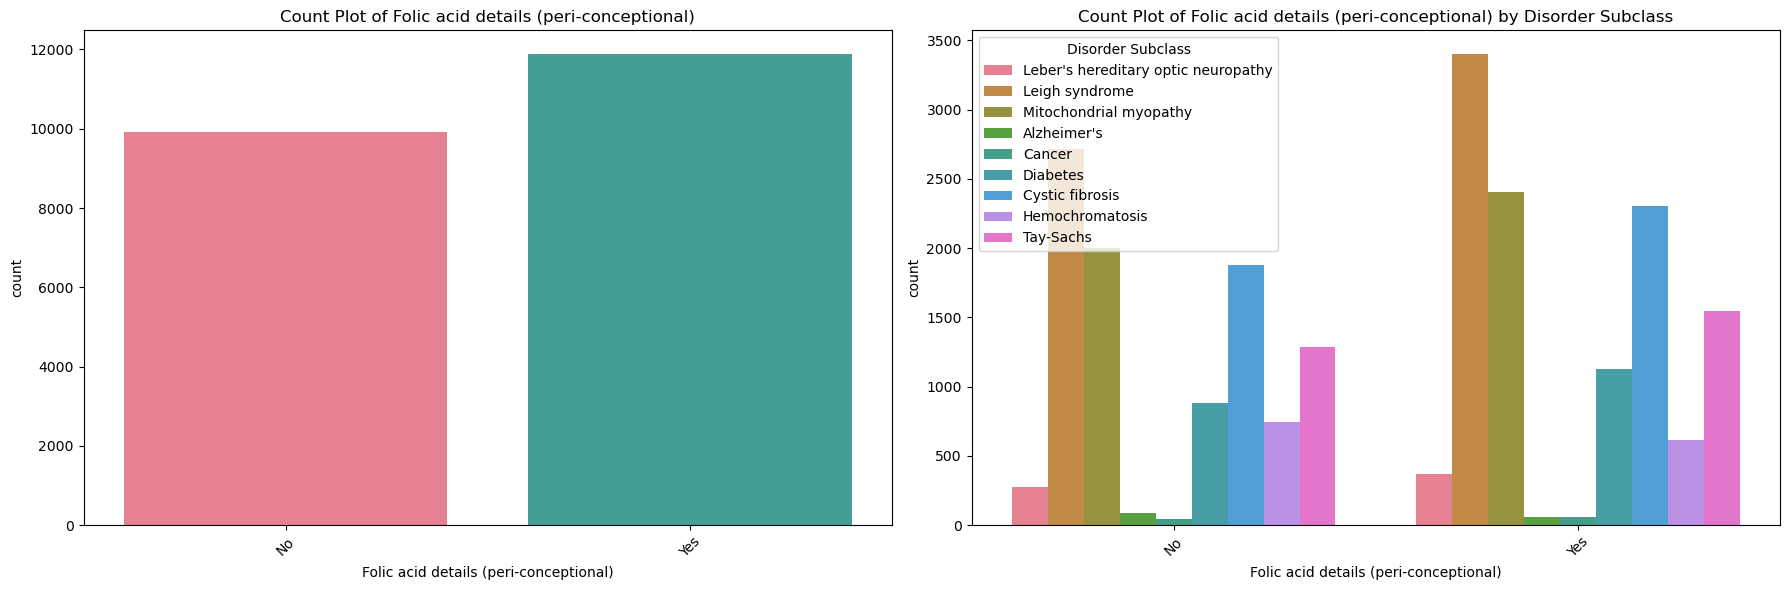

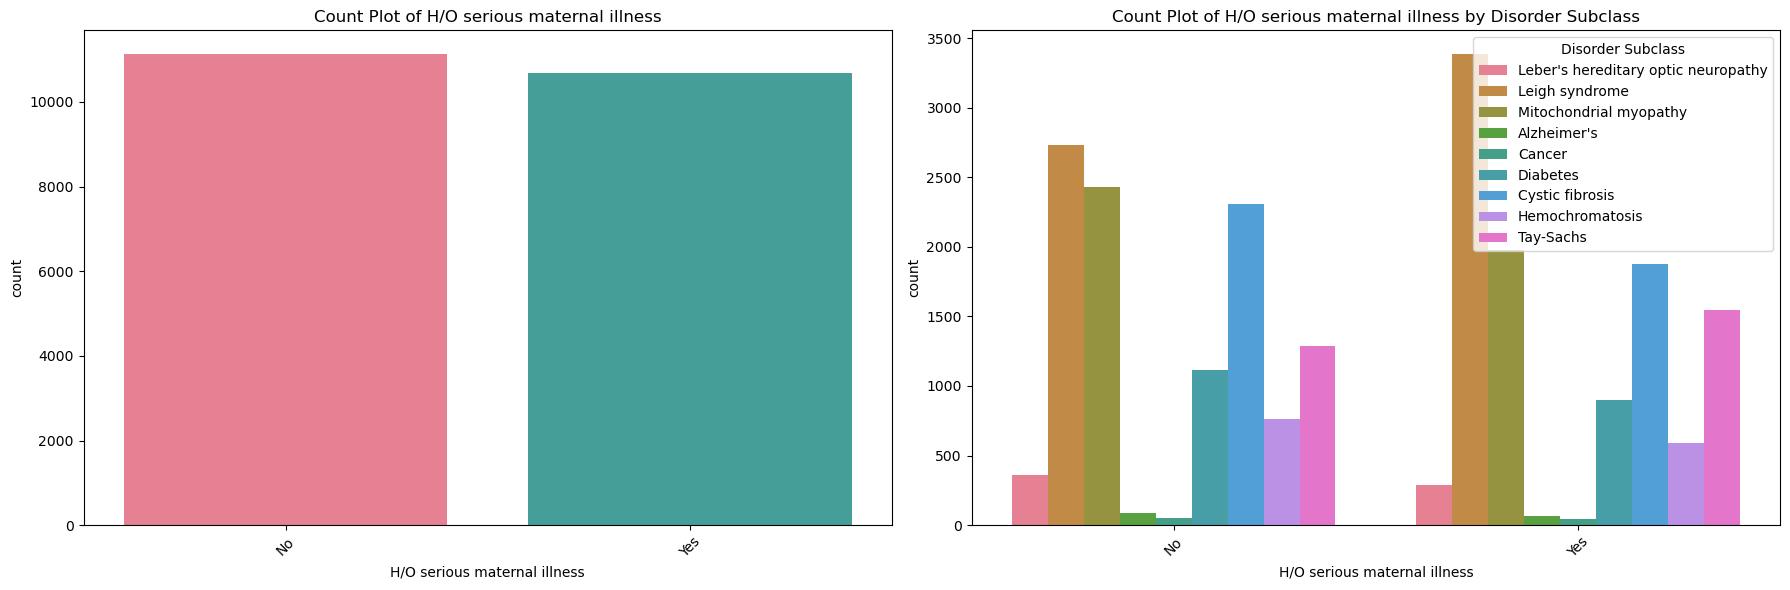

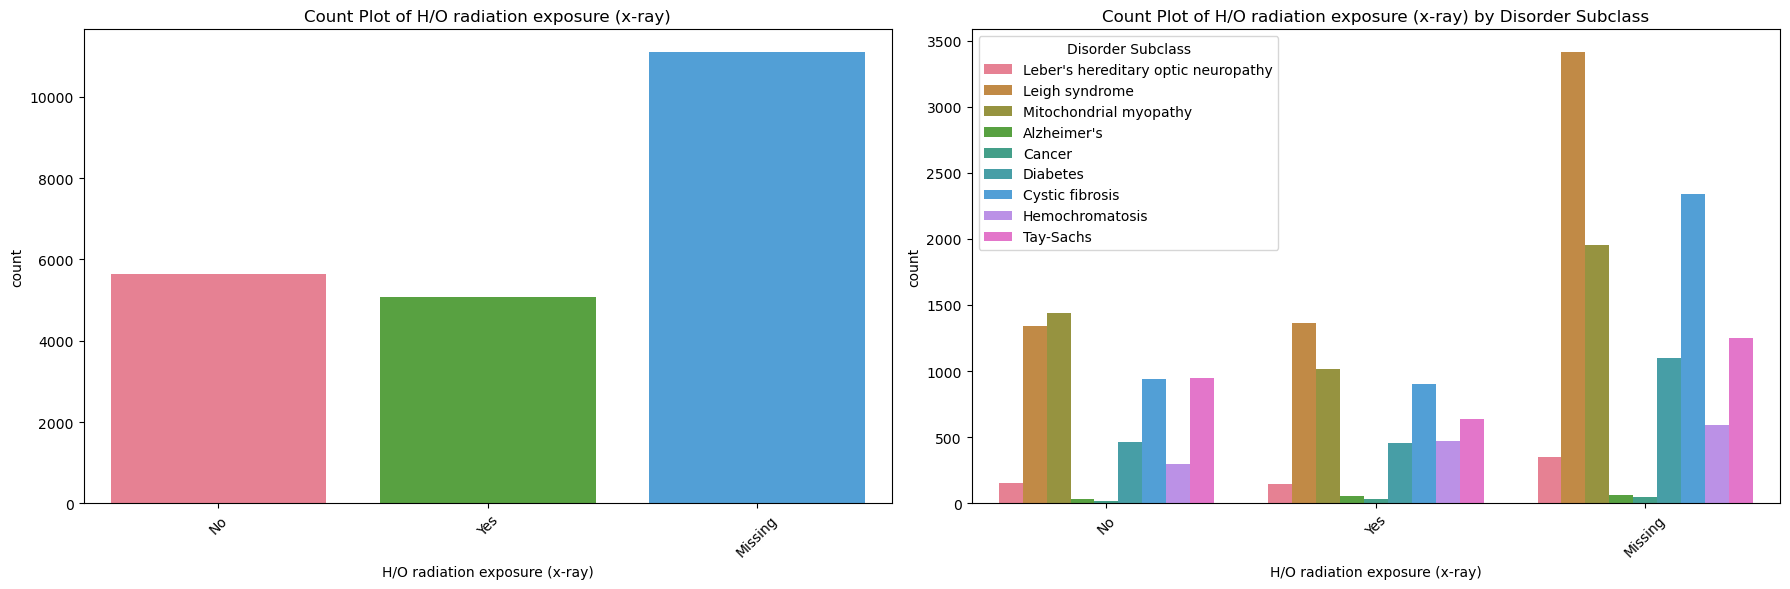

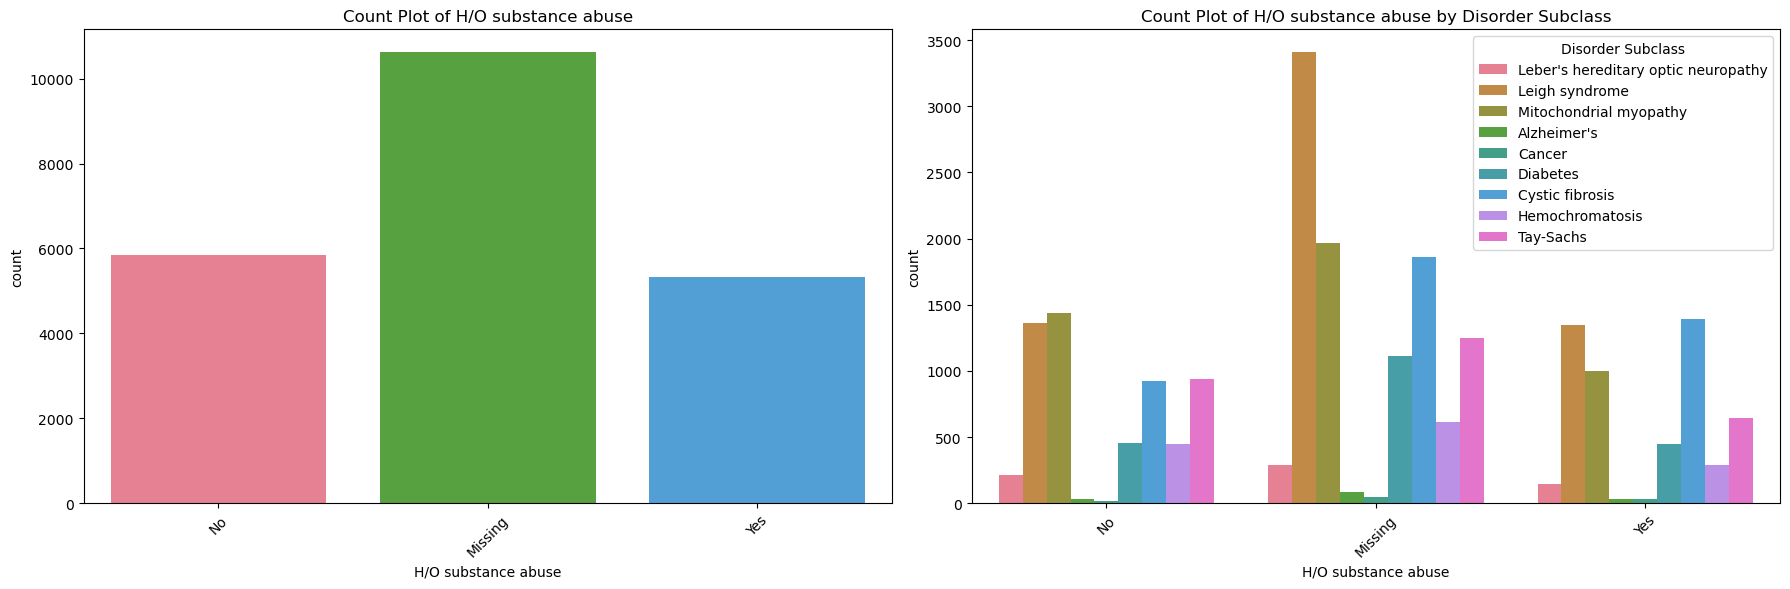

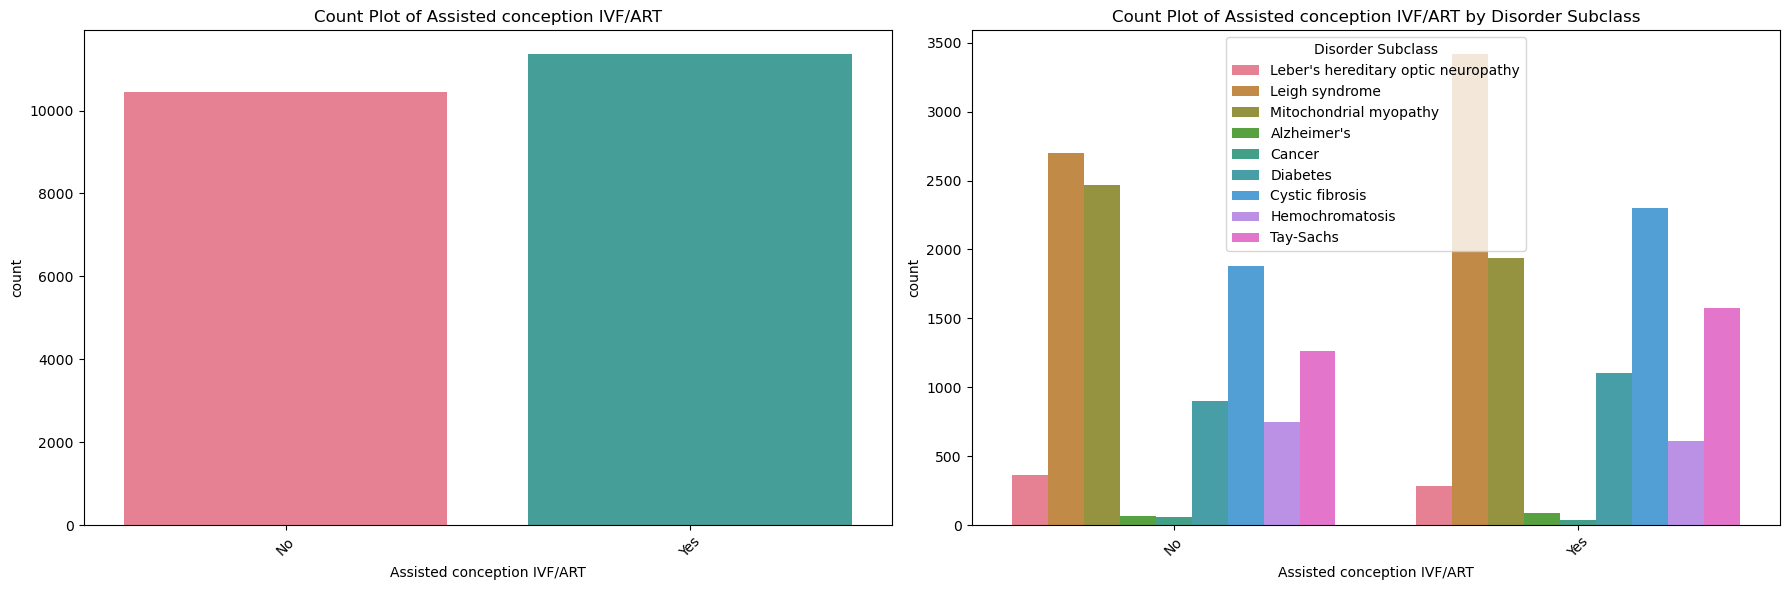

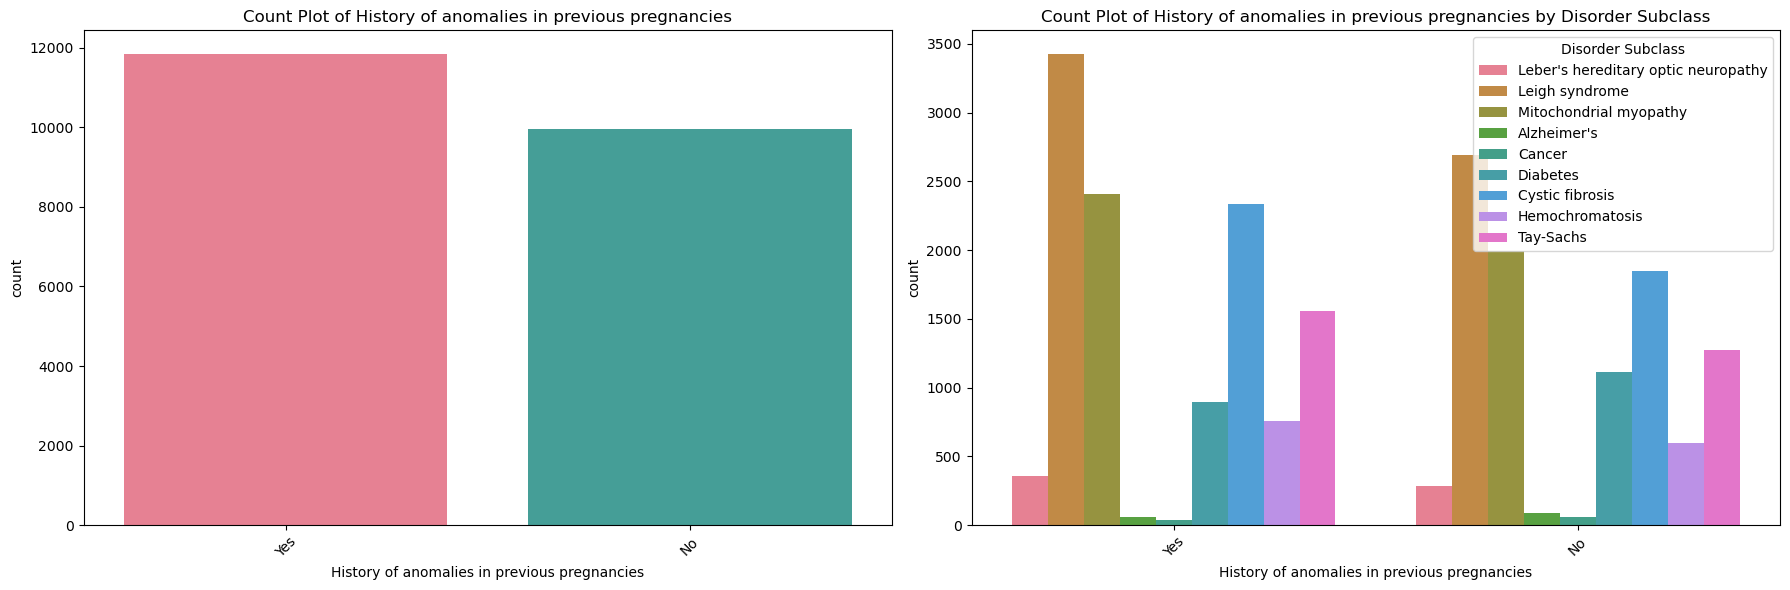

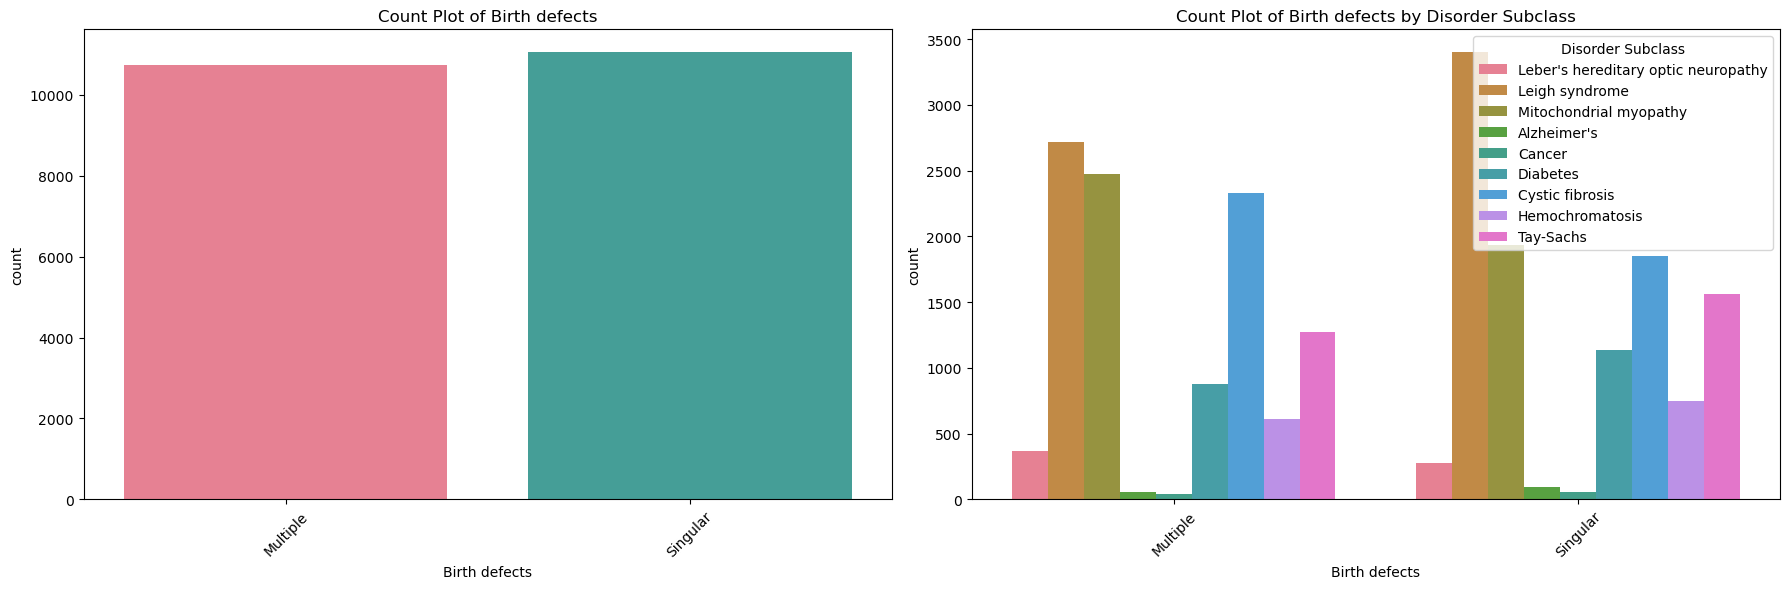

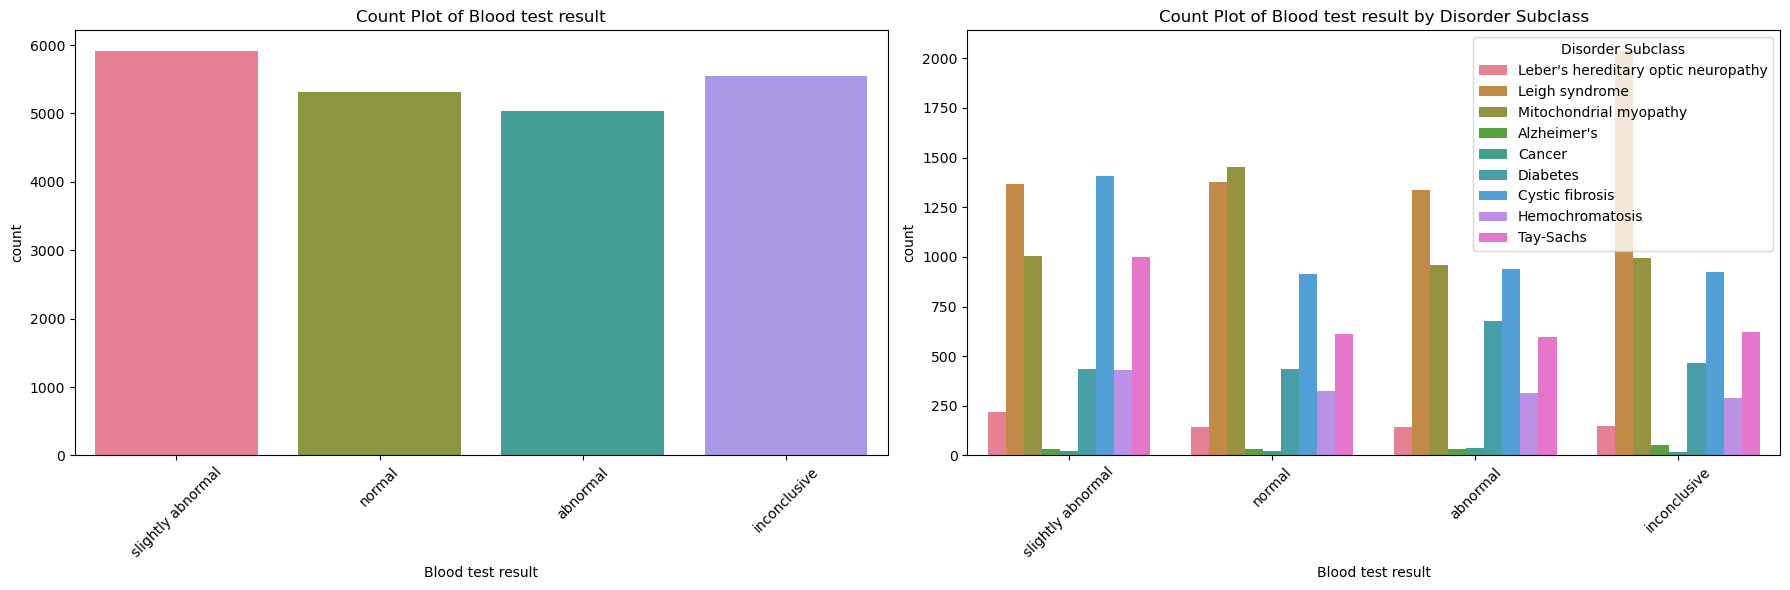

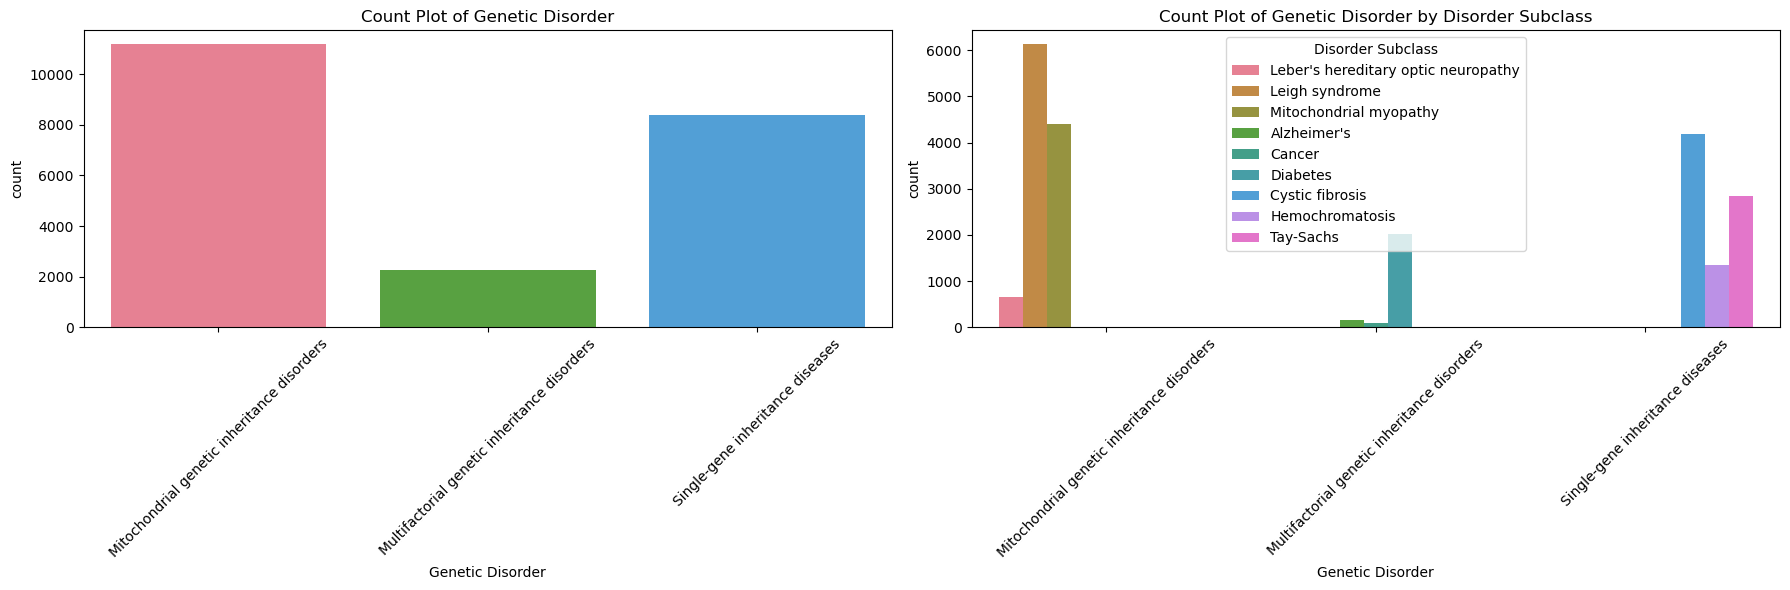

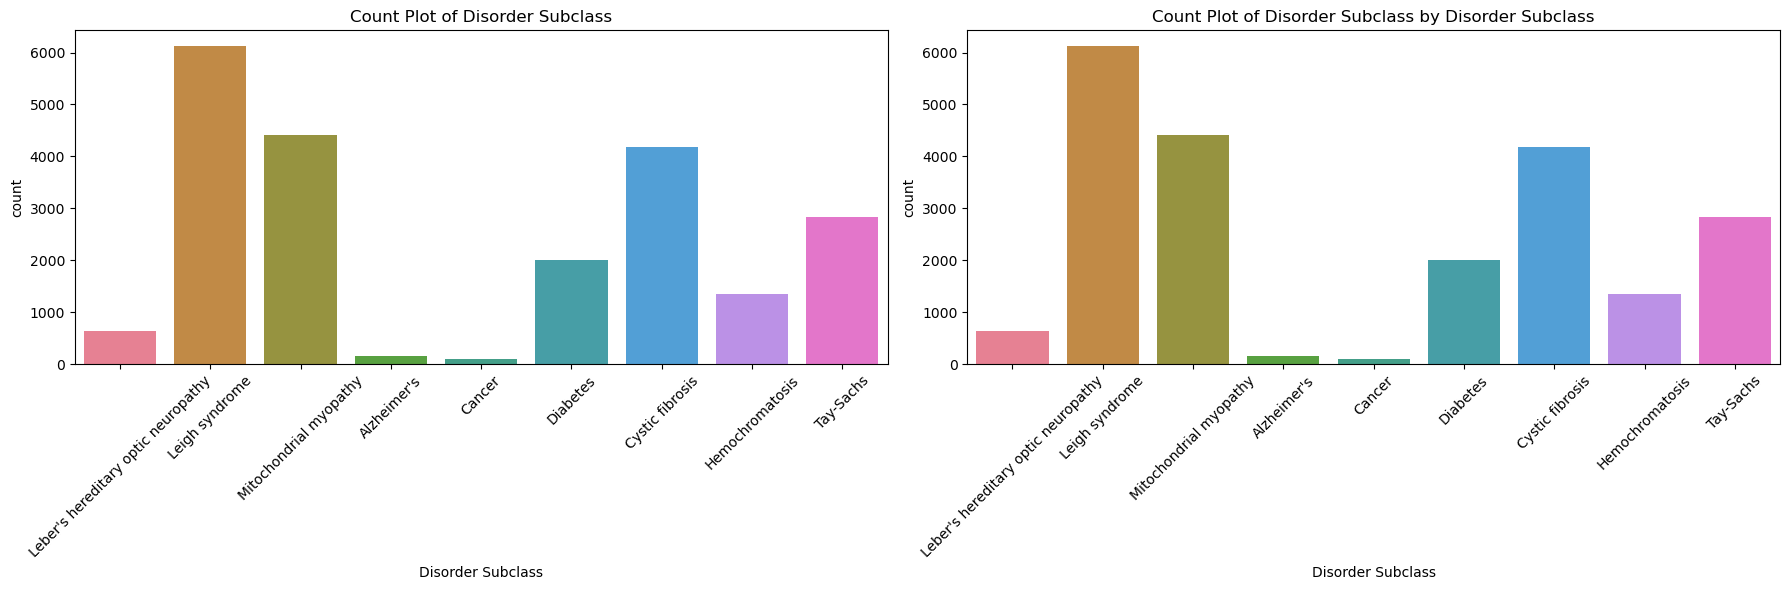

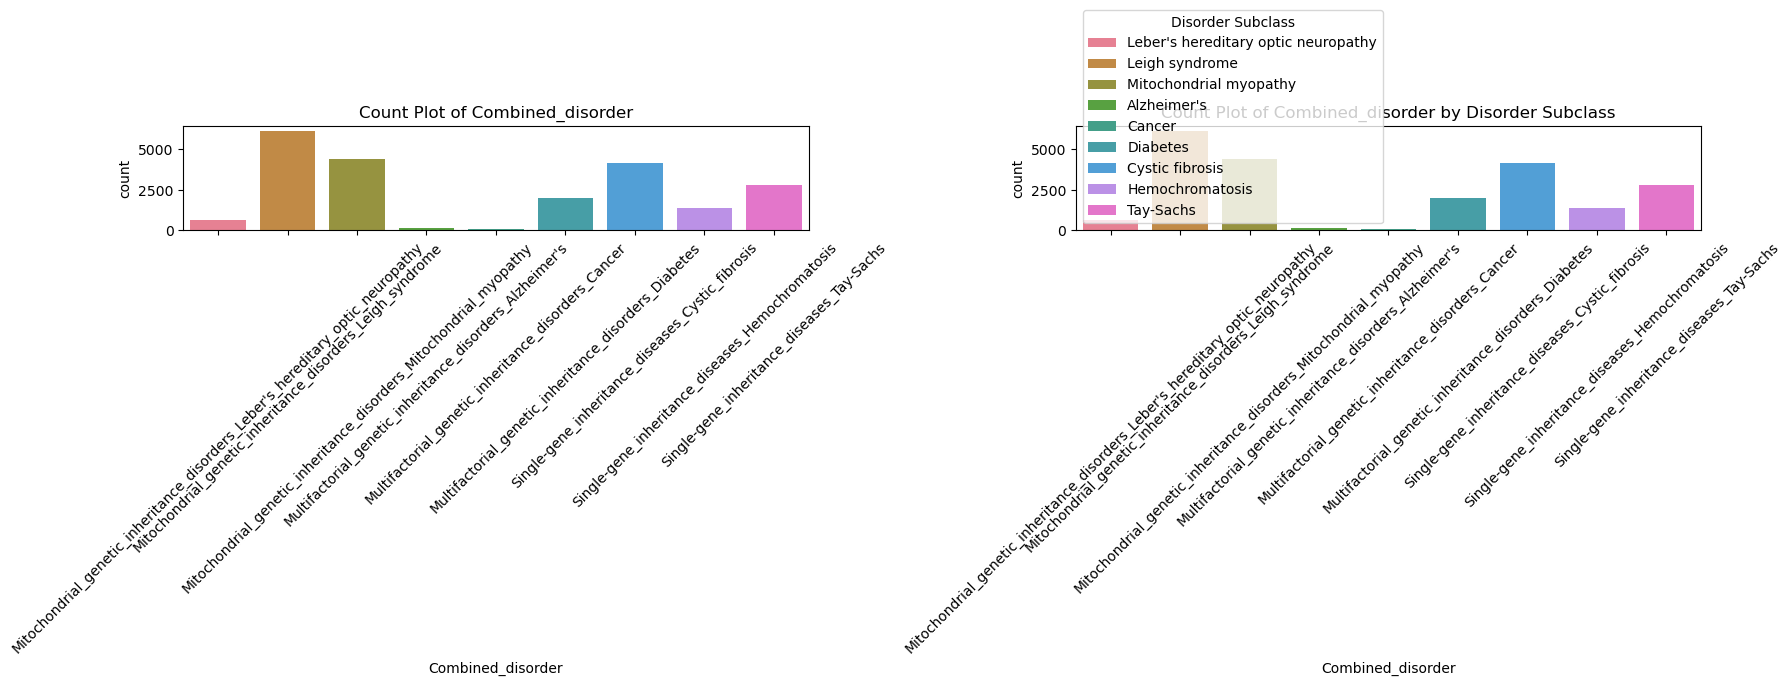

In [62]:
for feature in categorical_cols:

    # Determine the number of unique values in the hue feature
    num_unique_hue = df_train[feature].nunique()
    num_unique_target = df_train['Disorder Subclass'].nunique()

    custom_colors = sns.color_palette("husl", n_colors=num_unique_hue)  # Or any other palette with sufficient colors

    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

    # First subplot: Count plot of the feature without the target
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue=feature, data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    custom_colors = sns.color_palette("husl", n_colors=num_unique_target)  # Or any other palette with sufficient colors

    # Second subplot: Count plot of the feature with the target
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='Disorder Subclass', data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature} by Disorder Subclass')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

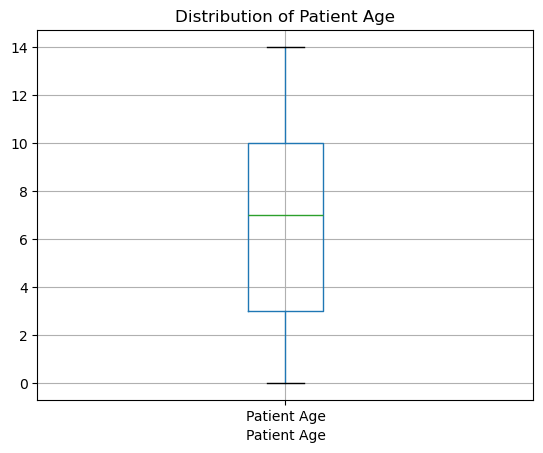

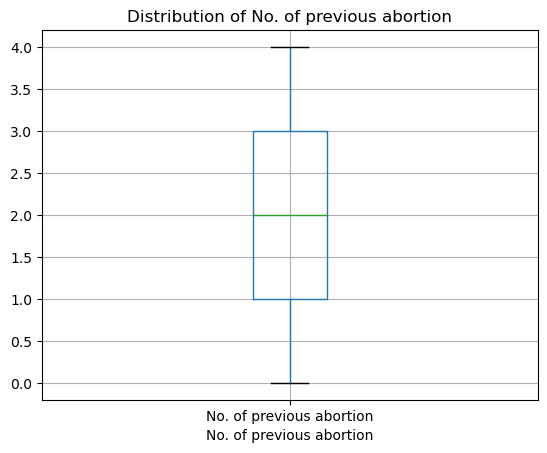

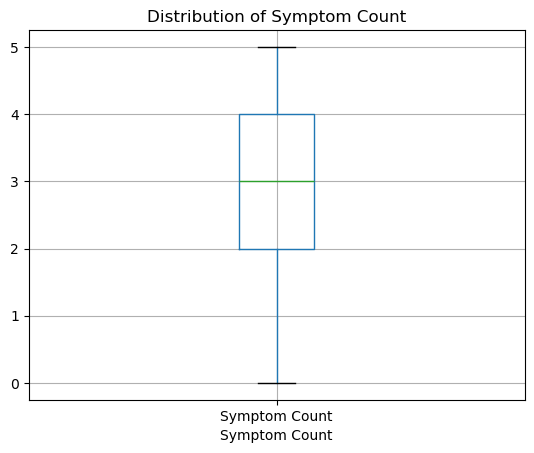

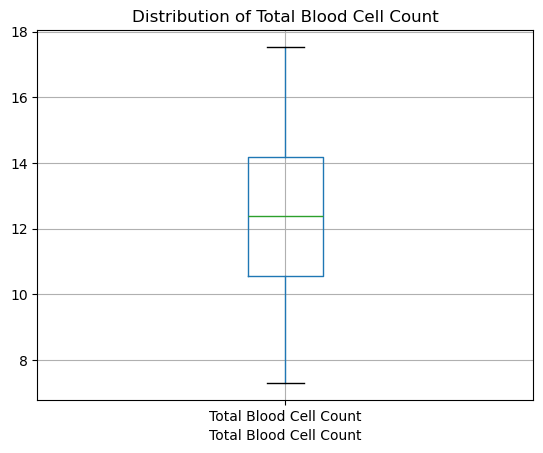

In [64]:
for col in df_train.select_dtypes(include='number').columns:
    df_train.boxplot(column=col)
    plt.xlabel(col)  # Set the xlabel to the current column name
    plt.title(f'Distribution of {col}')  # Title explaining what the plot represents
    plt.show()

In [66]:
import scipy.stats as stats

numerical_cols = df_train.select_dtypes(include=["number"]).columns

skewness = df_train[numerical_cols].apply(lambda x: stats.skew(x.dropna()))
print(skewness)

Patient Age                 0.009616
No. of previous abortion   -0.000546
Symptom Count               0.042411
Total Blood Cell Count      0.004615
dtype: float64


In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(df):
    """
    Compute VIF for all features in the given DataFrame and identify high VIF values.
    """
    # Ensure all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing values
    df = df.dropna()

    # Add constant to the feature set
    x = add_constant(df)

    # Create DataFrame to store VIF values
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    # Drop the intercept term from VIF DataFrame
    vif = vif[vif['Variable'] != 'const']

    # Filter features with VIF > 5
    high_vif = vif[vif['VIF'] > 5]

    # Print high VIF results
    print("Columns with VIF > 5:")
    print(high_vif)

    # Map high VIF columns to their related columns
    high_vif_columns = high_vif["Variable"].tolist()
    collinear_info = {}

    for col in high_vif_columns:
        collinear_info[col] = []
        # Check collinearity by comparing VIF values
        for other_col in df.columns:
            if other_col != col:
                temp_df = df[[col, other_col]].copy()
                temp_df = add_constant(temp_df)
                temp_vif = pd.DataFrame()
                temp_vif["Variable"] = temp_df.columns
                temp_vif["VIF"] = [variance_inflation_factor(temp_df.values, i) for i in range(temp_df.shape[1])]
                temp_vif = temp_vif[temp_vif['Variable'] != 'const']
                if temp_vif[temp_vif["Variable"] == col]["VIF"].values[0] > 5:
                    collinear_info[col].append((other_col, temp_vif[temp_vif["Variable"] == col]["VIF"].values[0]))

    # Print collinearity information
    print("\nCollinear Information (high VIF columns and their related columns):")
    for col, related_cols in collinear_info.items():
        if related_cols:
            print(f"Column '{col}' has high VIF with:")
            for other_col, vif_value in related_cols:
                print(f"  - Column '{other_col}' (VIF: {vif_value})")
    return vif


# Assuming df_cleaned is your DataFrame with features
considered_features = df_train.select_dtypes(include='number').columns
vif_data=compute_vif(df_train[considered_features])
vif_data

Columns with VIF > 5:
Empty DataFrame
Columns: [Variable, VIF]
Index: []

Collinear Information (high VIF columns and their related columns):


Variable       VIF
1               Patient Age  1.000284
2  No. of previous abortion  1.000054
3             Symptom Count  1.000206
4    Total Blood Cell Count  1.000062

In [76]:
df_train.shape


(21805, 27)

In [78]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [82]:
from sklearn.model_selection import train_test_split

With 'Genetic Disorder' as a target column¶


In [84]:
X =df_train.drop(columns=['Genetic Disorder'])
Y = df_train[['Genetic Disorder']]

In [86]:
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.feature_selection import chi2, f_classif, SelectKBest


# Apply chi-square test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, Y)

# Get scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Create a DataFrame to display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(pd.DataFrame(feature_scores))

                                         Feature    Chi2 Score       P-Value
25                             Combined_disorder  38710.231167  0.000000e+00
22                             Disorder Subclass   6615.264607  0.000000e+00
23                                 Symptom Count   1689.246784  0.000000e+00
21                             Blood test result    175.522329  7.687950e-39
2                          Inherited from father    139.402341  5.360017e-31
16                           H/O substance abuse    105.916159  1.001379e-23
3                                  Maternal gene     99.666902  2.278281e-22
1                         Genes in mother's side     82.601571  1.156902e-18
4                                  Paternal gene     65.380048  6.351891e-15
8                                      Follow-up     49.782094  1.548659e-11
18  History of anomalies in previous pregnancies     49.257447  2.013173e-11
12                                Place of birth     42.341531  6.392245e-10

In [88]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Logistic Regression using MinMaxScaler:


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


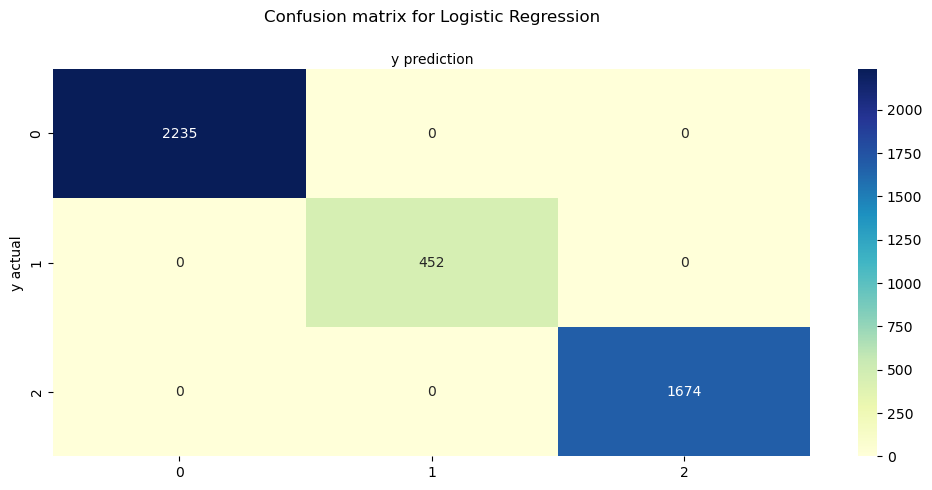

Classification Report for Logistic Regression using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


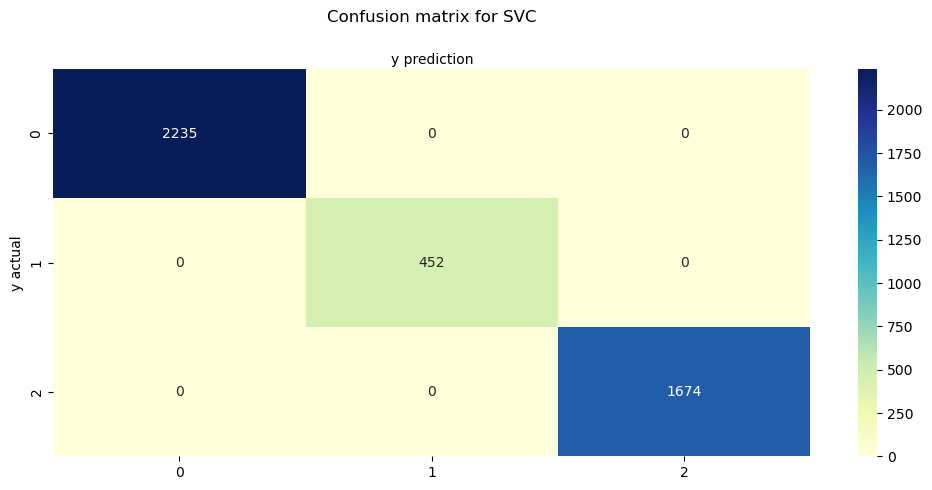

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 0.9741
Test Accuracy: 0.9768
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 0.9741
Test Accuracy: 0.9768
----------------------------------------
Using StandardScaler with Naive Bayes:
Train Accuracy: 0.9741
Test Accuracy: 0.9768
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


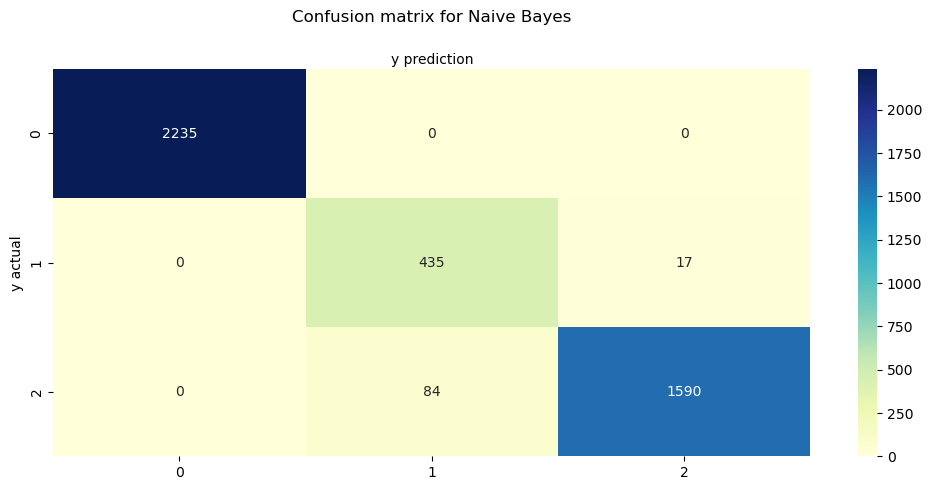

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       0.84      0.96      0.90       452
           2       0.99      0.95      0.97      1674

    accuracy                           0.98      4361
   macro avg       0.94      0.97      0.96      4361
weighted avg       0.98      0.98      0.98      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.8649
Test Accuracy: 0.7792
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.9368
Test Accuracy: 0.8959
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.9357
Test Accuracy: 0.8938
----------------------------------------
Confusion Matrix for KNN using RobustScaler:


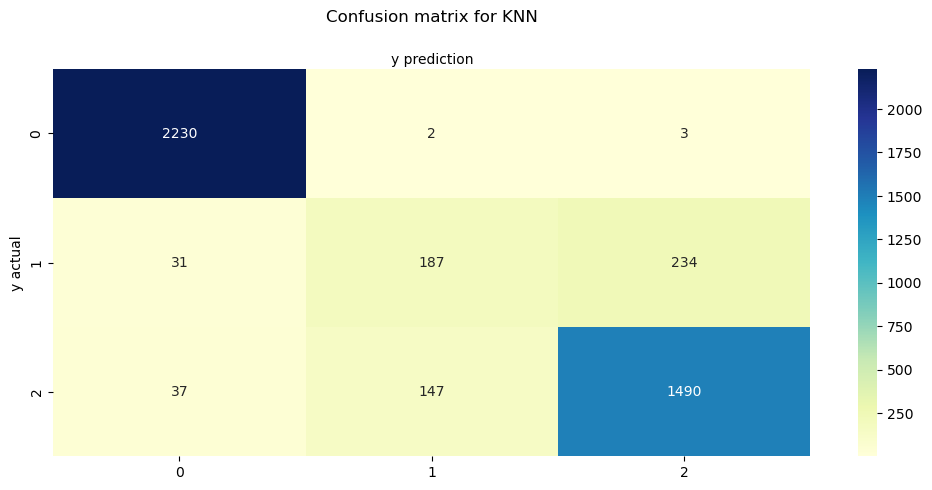

Classification Report for KNN using RobustScaler:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2235
           1       0.56      0.41      0.47       452
           2       0.86      0.89      0.88      1674

    accuracy                           0.90      4361
   macro avg       0.80      0.77      0.78      4361
weighted avg       0.89      0.90      0.89      4361

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


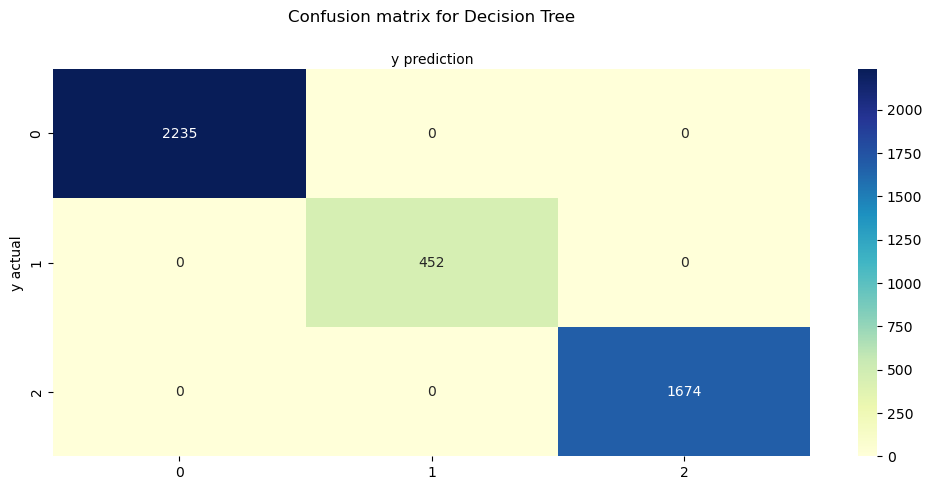

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9899
Test Accuracy: 0.9920
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9940
Test Accuracy: 0.9963
----------------------------------------
Using StandardScaler with Random Forest:
Train Accuracy: 0.9865
Test Accuracy: 0.9869
----------------------------------------
Confusion Matrix for Random Forest using RobustScaler:


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


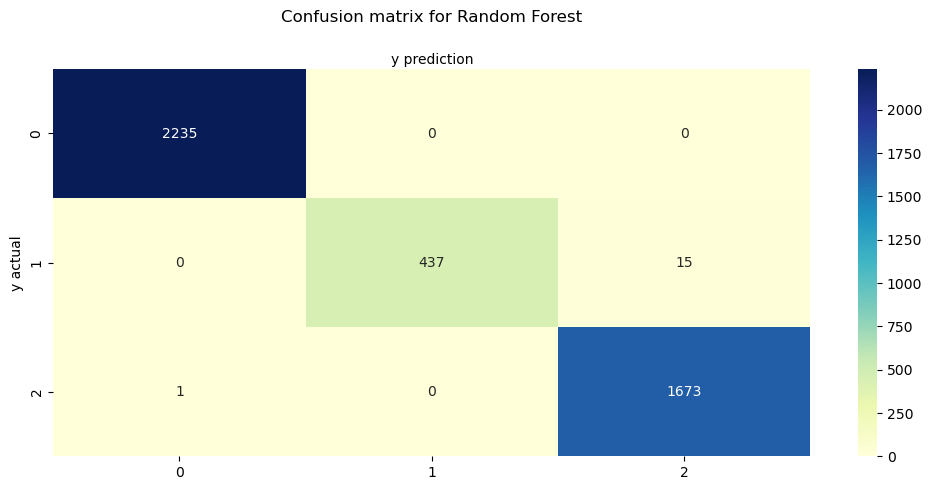

Classification Report for Random Forest using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      0.97      0.98       452
           2       0.99      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      0.99      0.99      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using MinMaxScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using RobustScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using StandardScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


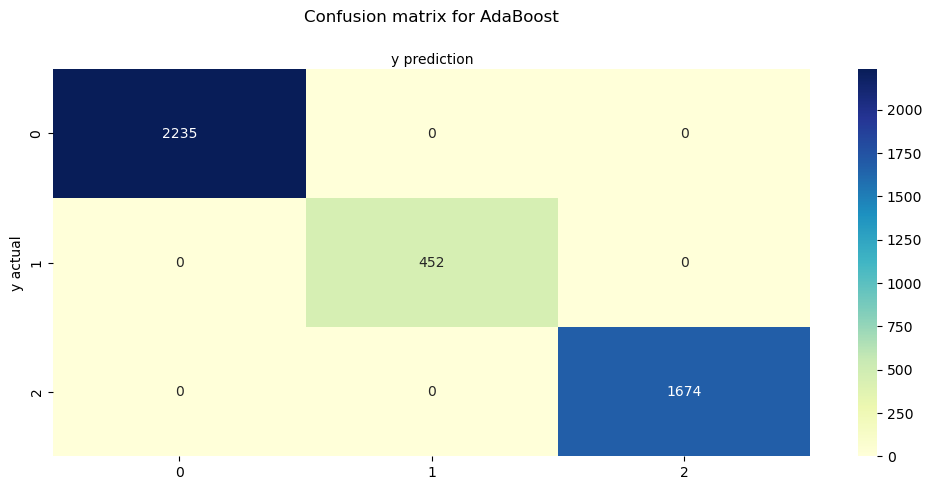

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


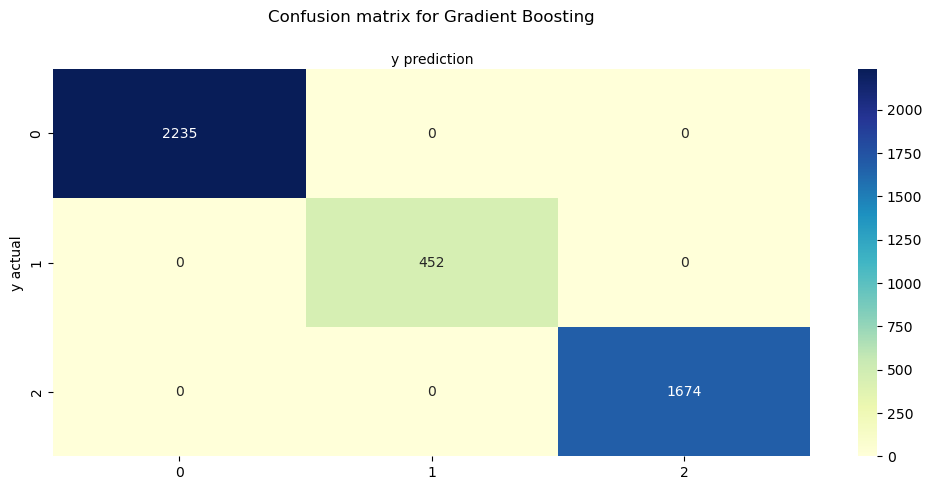

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for XGBoost using MinMaxScaler:


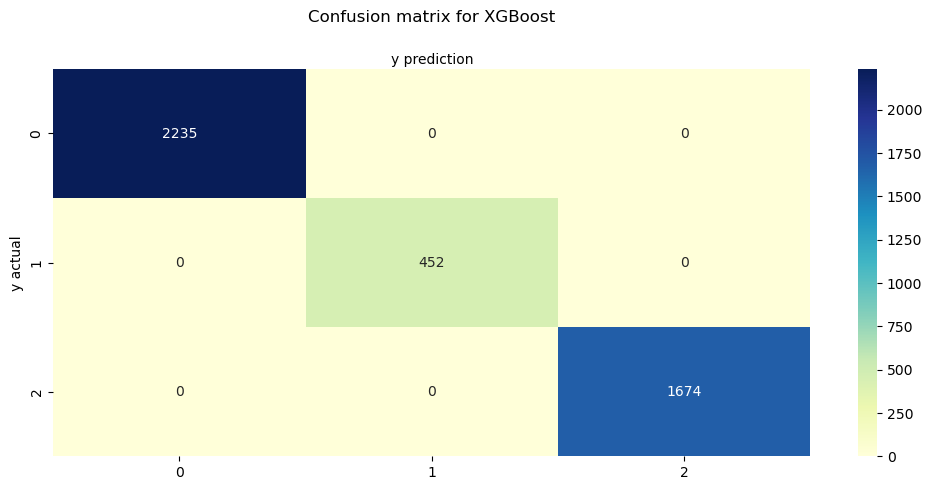

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



Model        Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  MinMaxScaler        1.000000       1.000000
1                  SVC  MinMaxScaler        1.000000       1.000000
2          Naive Bayes  MinMaxScaler        0.974089       0.976840
3                  KNN  RobustScaler        0.935737       0.895895
4        Decision Tree  MinMaxScaler        1.000000       1.000000
5        Random Forest  RobustScaler        0.986528       0.996331
6             AdaBoost  MinMaxScaler        1.000000       1.000000
7    Gradient Boosting  MinMaxScaler        1.000000       1.000000
8              XGBoost  MinMaxScaler        1.000000       1.000000

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10,kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=15,max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)

}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        
        classifier.fit(x_train_scaled, y_train)
        y_pred = classifier.predict(x_test_scaled)
        
        
        train_accuracy = accuracy_score(y_train, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()
    
    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)

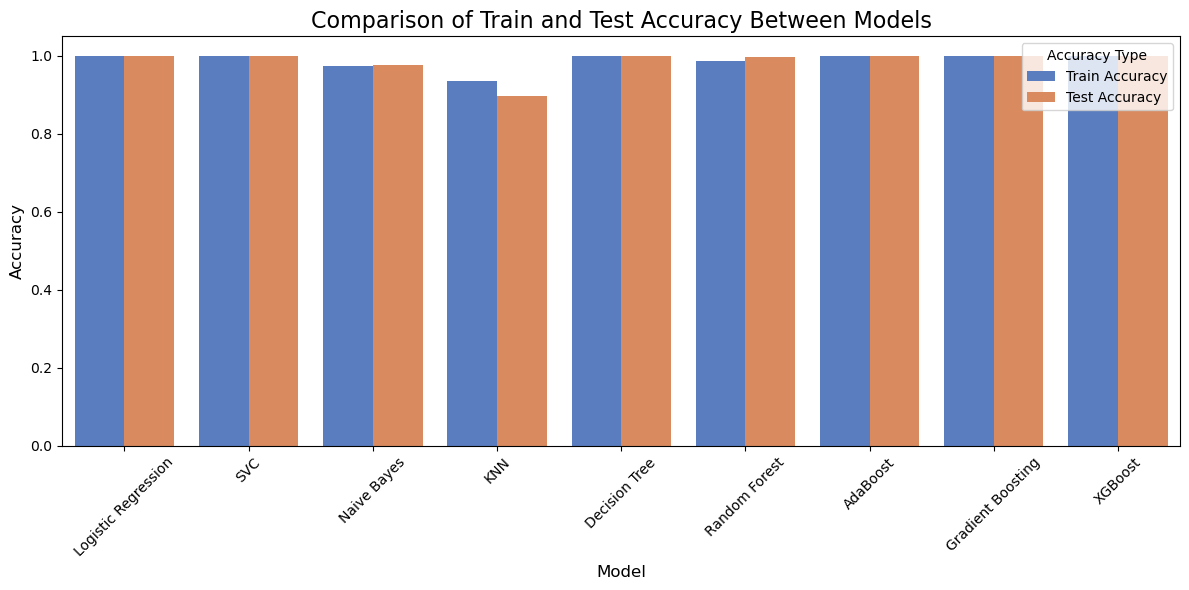

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()

In [94]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.3/124.9 MB 2.9 MB/s eta 0:00:44
   ---------------------------------------- 1.4/124.9 MB 9.0 MB/s eta 0:00:14
    --------------------------------------- 1.8/124.9 MB 9.3 MB/s eta 0:00:14
    --------------------------------------- 2.1/124.9 MB 8.9 MB/s eta 0:00:14
    --------------------------------------- 2.2/124.9 MB 7.9 MB/s eta 0:00:16
    --------------------------------------- 2.4/124.9 MB 7.8 MB/s eta 0:00:16
    --------------------------------------- 2.7/124.9 MB 7.5 MB/s eta 0:00:17
    --------------------------------------- 2.9/124.9 MB 7.5 MB/s eta 0:00:17
   - -----

Applying SOMTE¶


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Logistic Regression using MinMaxScaler:


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


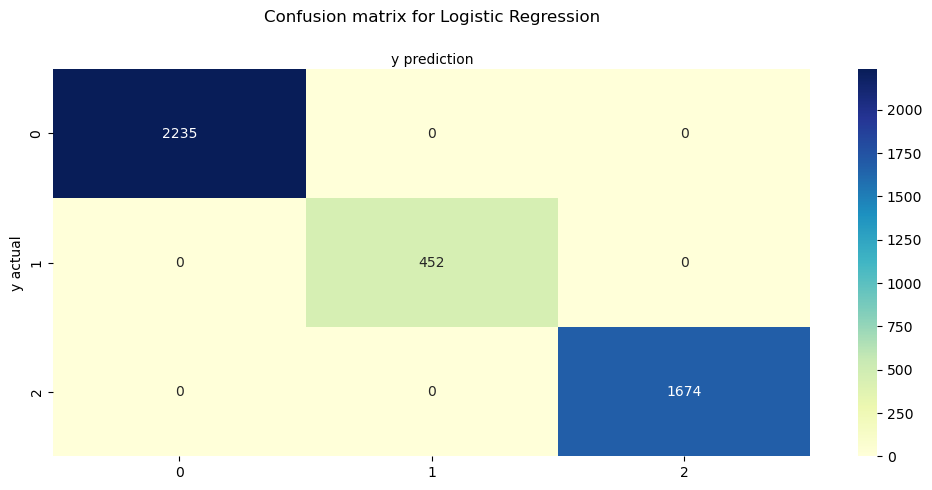

Classification Report for Logistic Regression using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


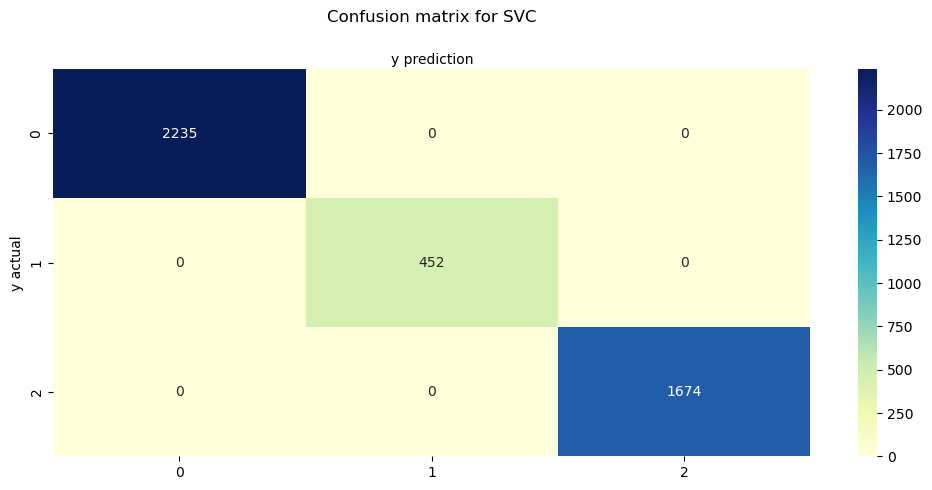

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 0.9231
Test Accuracy: 0.9408
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 0.9231
Test Accuracy: 0.9408
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted witho

Using StandardScaler with Naive Bayes:
Train Accuracy: 0.9231
Test Accuracy: 0.9408
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


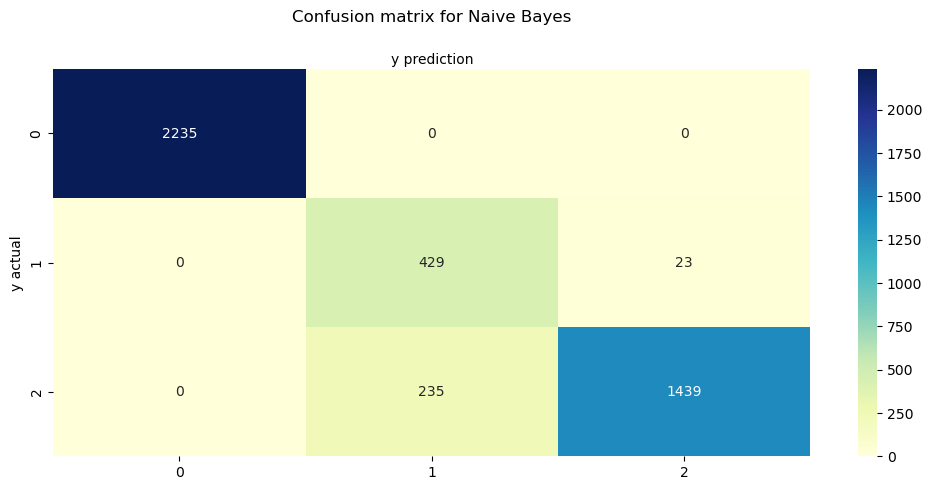

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       0.65      0.95      0.77       452
           2       0.98      0.86      0.92      1674

    accuracy                           0.94      4361
   macro avg       0.88      0.94      0.90      4361
weighted avg       0.96      0.94      0.94      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.8762
Test Accuracy: 0.7104
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.9614
Test Accuracy: 0.8801
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.9481
Test Accuracy: 0.8610
----------------------------------------
Confusion Matrix for KNN using RobustScaler:


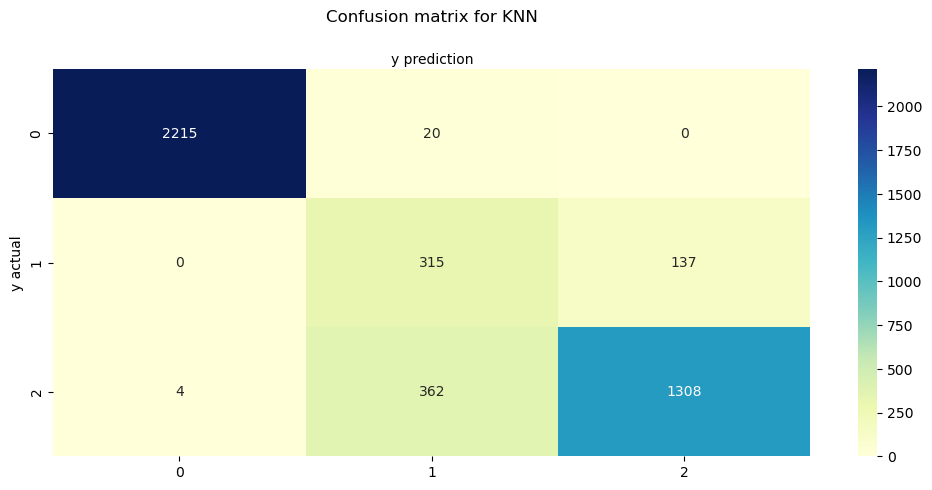

Classification Report for KNN using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2235
           1       0.45      0.70      0.55       452
           2       0.91      0.78      0.84      1674

    accuracy                           0.88      4361
   macro avg       0.79      0.82      0.79      4361
weighted avg       0.91      0.88      0.89      4361

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Using StandardScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


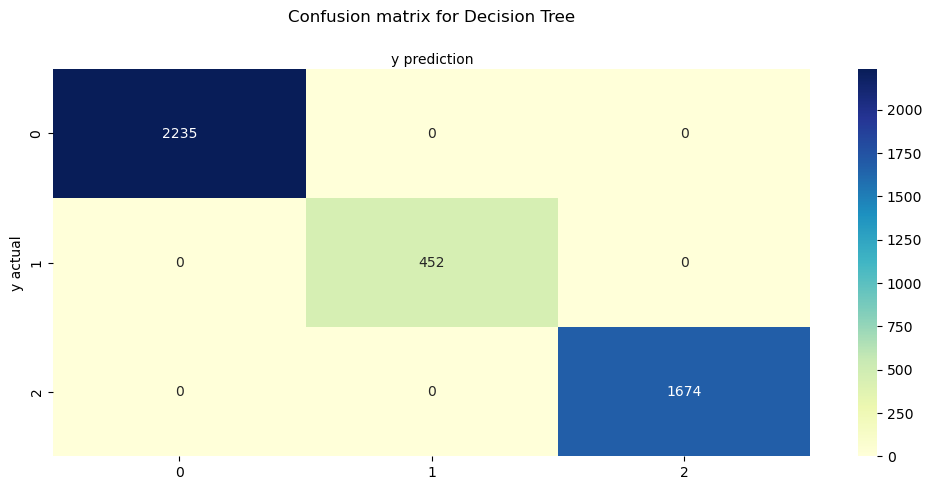

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9991
Test Accuracy: 0.9998
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using RobustScaler with Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using StandardScaler with Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Random Forest using RobustScaler:


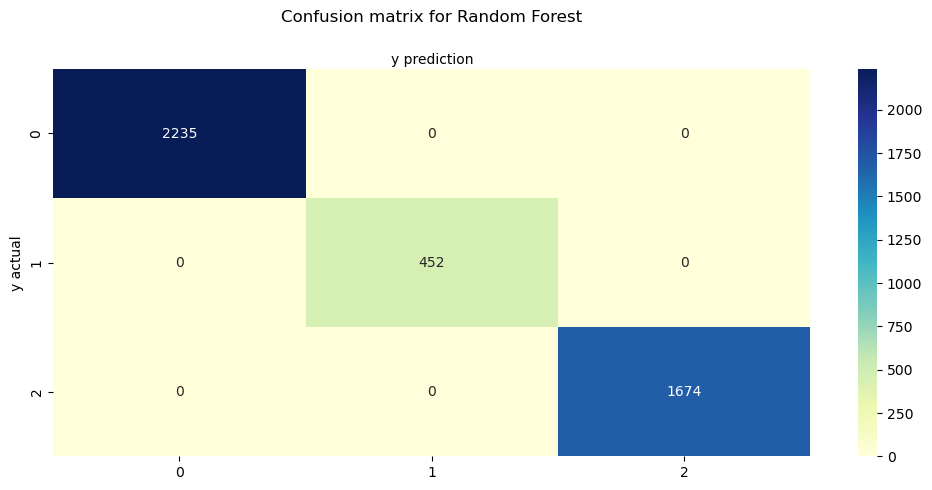

Classification Report for Random Forest using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using MinMaxScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using RobustScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using StandardScaler with AdaBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


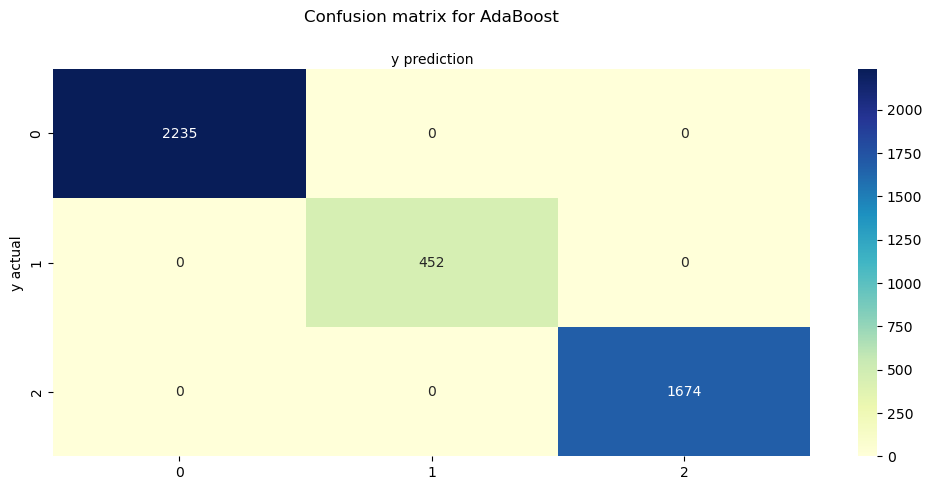

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


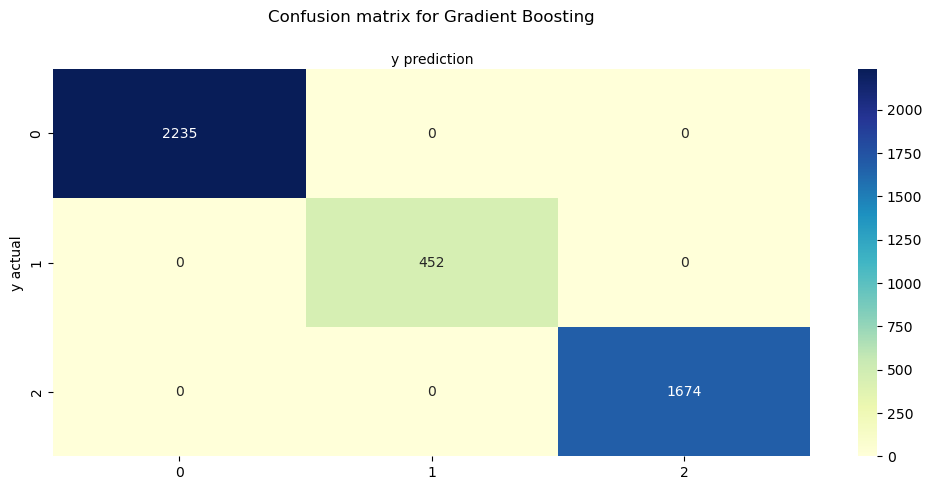

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Using StandardScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for XGBoost using MinMaxScaler:


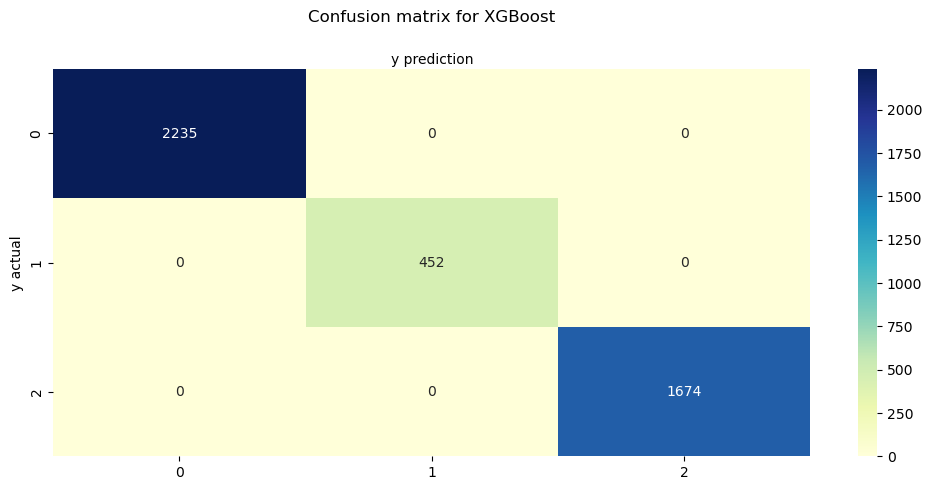

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



Model        Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  MinMaxScaler        1.000000       1.000000
1                  SVC  MinMaxScaler        1.000000       1.000000
2          Naive Bayes  MinMaxScaler        0.923146       0.940839
3                  KNN  RobustScaler        0.948055       0.880073
4        Decision Tree  MinMaxScaler        1.000000       1.000000
5        Random Forest  RobustScaler        1.000000       1.000000
6             AdaBoost  MinMaxScaler        1.000000       1.000000
7    Gradient Boosting  MinMaxScaler        1.000000       1.000000
8              XGBoost  MinMaxScaler        1.000000       1.000000

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10, kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),#
    'Random Forest': RandomForestClassifier(n_estimators=15, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy like 'median'
x_train_resampled = imputer.fit_transform(x_train_resampled)


for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train_resampled)
        x_test_scaled = scaler.transform(x_test)
        
        classifier.fit(x_train_scaled, y_train_resampled)
        y_pred = classifier.predict(x_test_scaled)
        
        train_accuracy = accuracy_score(y_train_resampled, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()

    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)

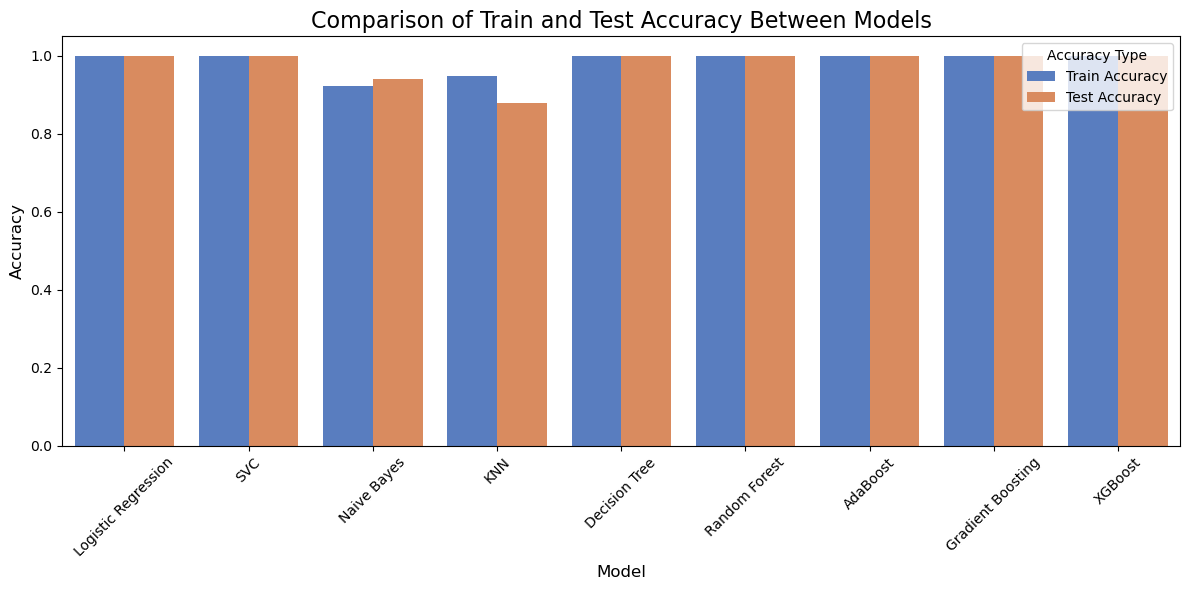

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()

With "Disorder Subclass" as a target column¶


In [104]:
X =df_train.drop(columns=['Disorder Subclass'])
Y = df_train[['Disorder Subclass']]

In [106]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9956
Test Accuracy: 0.9945
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9995
Test Accuracy: 0.9986
----------------------------------------
Using StandardScaler with Logistic Regression:
Train Accuracy: 0.9999
Test Accuracy: 0.9995
----------------------------------------
Confusion Matrix for Logistic Regression using StandardScaler:


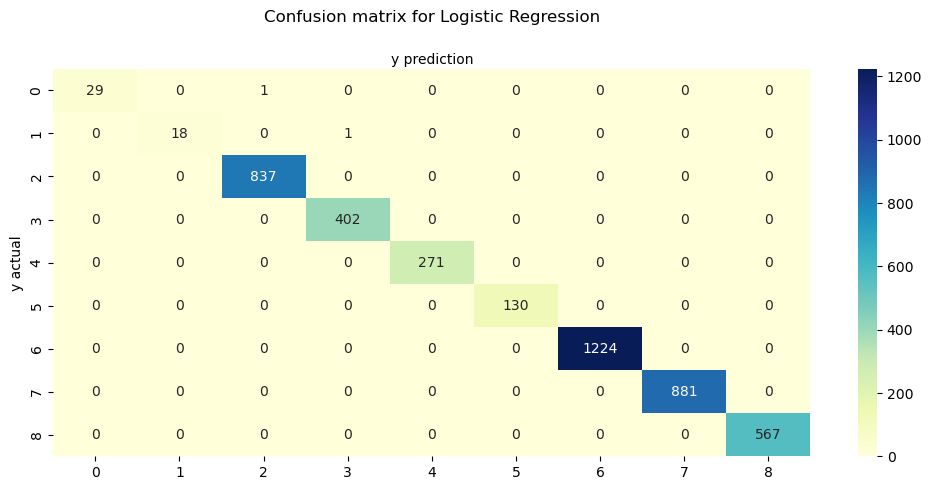

Classification Report for Logistic Regression using StandardScaler:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00       837
           3       1.00      1.00      1.00       402
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00      1224
           7       1.00      1.00      1.00       881
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      0.99      0.99      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 0.9999
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 0.9999
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


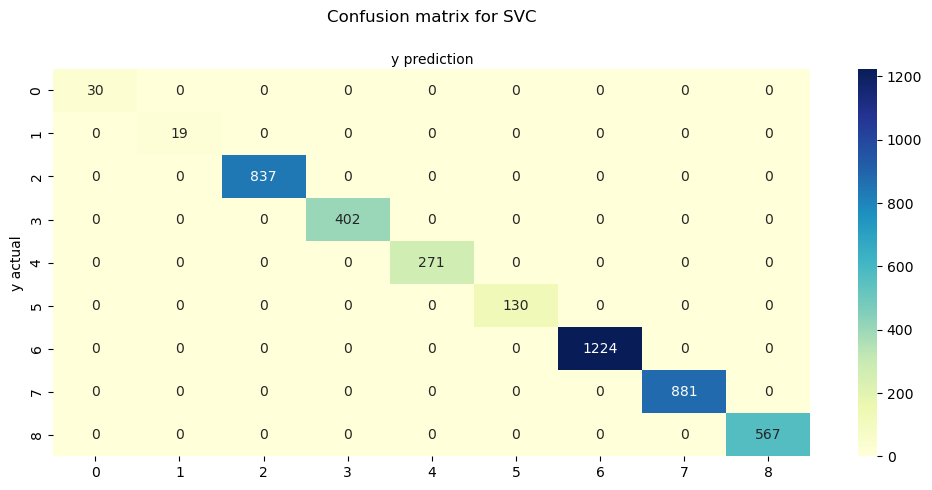

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       837
           3       1.00      1.00      1.00       402
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00      1224
           7       1.00      1.00      1.00       881
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


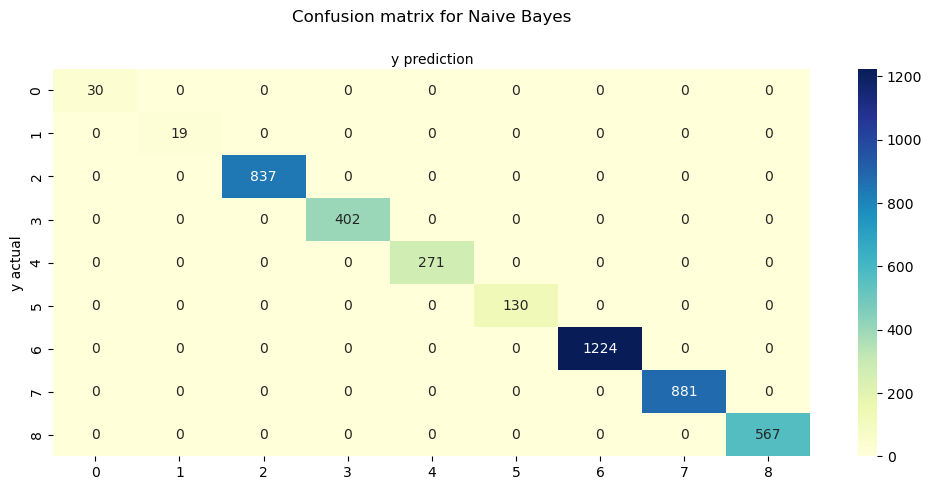

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       837
           3       1.00      1.00      1.00       402
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00      1224
           7       1.00      1.00      1.00       881
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.7072
Test Accuracy: 0.5432
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.7520
Test Accuracy: 0.6035
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.7509
Test Accuracy: 0.6038
----------------------------------------
Confusion Matrix for KNN using StandardScaler:


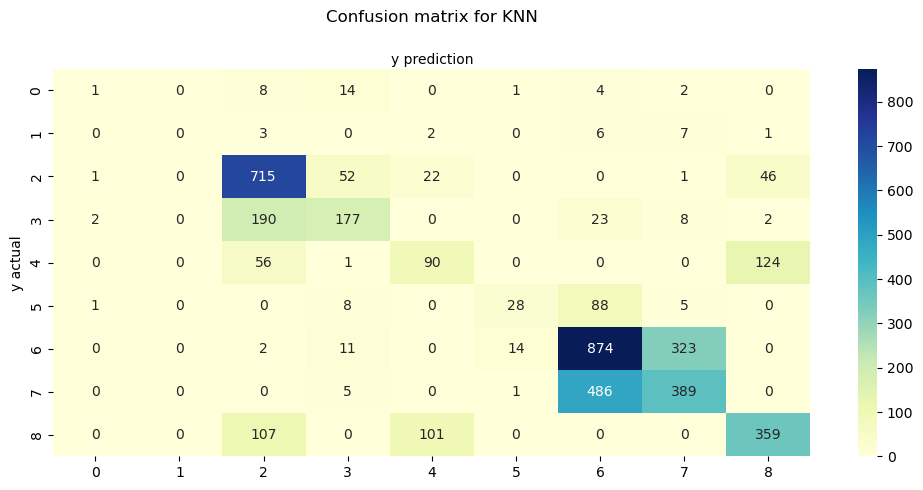

Classification Report for KNN using StandardScaler:
              precision    recall  f1-score   support

           0       0.20      0.03      0.06        30
           1       0.00      0.00      0.00        19
           2       0.66      0.85      0.75       837
           3       0.66      0.44      0.53       402
           4       0.42      0.33      0.37       271
           5       0.64      0.22      0.32       130
           6       0.59      0.71      0.65      1224
           7       0.53      0.44      0.48       881
           8       0.67      0.63      0.65       567

    accuracy                           0.60      4361
   macro avg       0.49      0.41      0.42      4361
weighted avg       0.59      0.60      0.59      4361

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using StandardScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


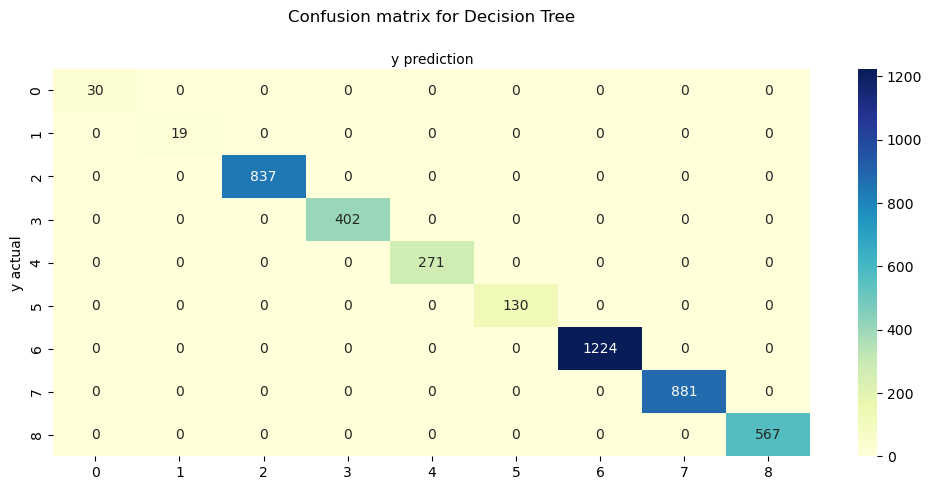

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       837
           3       1.00      1.00      1.00       402
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00      1224
           7       1.00      1.00      1.00       881
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9512
Test Accuracy: 0.9502
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9329
Test Accuracy: 0.9324
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using StandardScaler with Random Forest:
Train Accuracy: 0.9048
Test Accuracy: 0.9087
----------------------------------------
Confusion Matrix for Random Forest using MinMaxScaler:


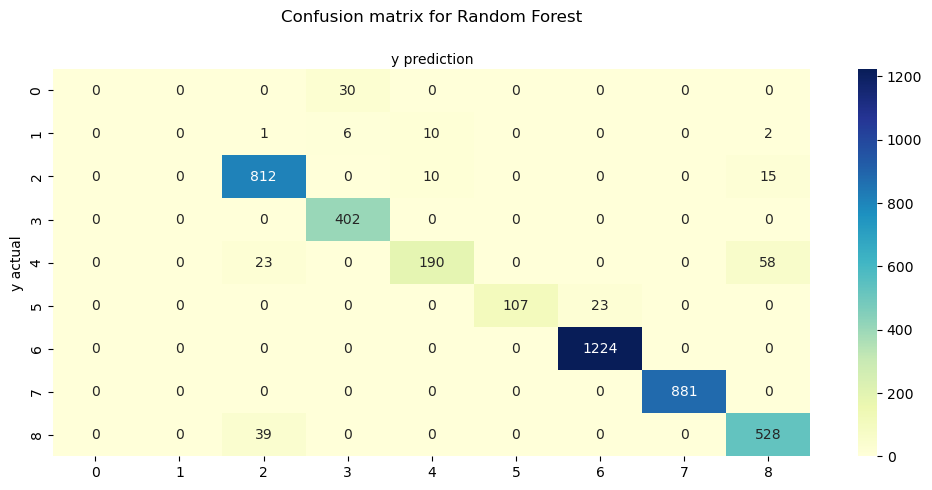

Classification Report for Random Forest using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        19
           2       0.93      0.97      0.95       837
           3       0.92      1.00      0.96       402
           4       0.90      0.70      0.79       271
           5       1.00      0.82      0.90       130
           6       0.98      1.00      0.99      1224
           7       1.00      1.00      1.00       881
           8       0.88      0.93      0.90       567

    accuracy                           0.95      4361
   macro avg       0.73      0.71      0.72      4361
weighted avg       0.94      0.95      0.94      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-pa

Using MinMaxScaler with AdaBoost:
Train Accuracy: 0.8963
Test Accuracy: 0.8966
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using RobustScaler with AdaBoost:
Train Accuracy: 0.8963
Test Accuracy: 0.8966
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using StandardScaler with AdaBoost:
Train Accuracy: 0.8963
Test Accuracy: 0.8966
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


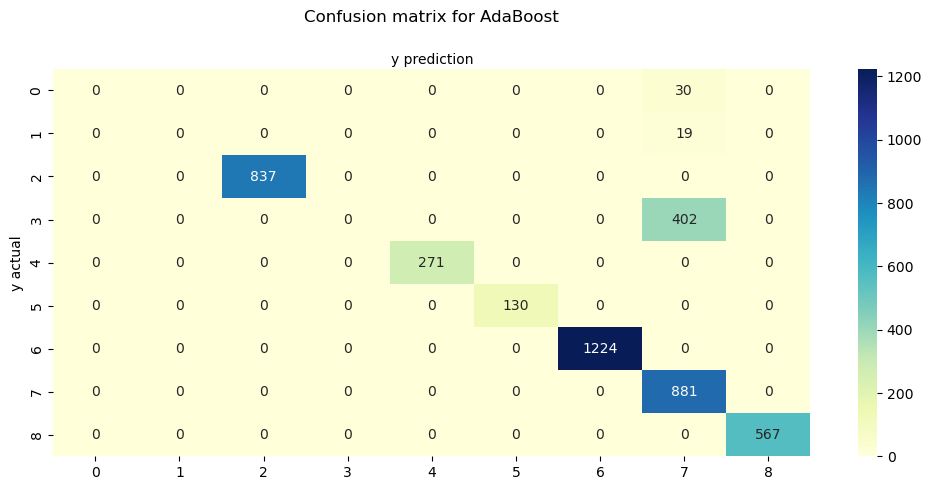

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        19
           2       1.00      1.00      1.00       837
           3       0.00      0.00      0.00       402
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00      1224
           7       0.66      1.00      0.80       881
           8       1.00      1.00      1.00       567

    accuracy                           0.90      4361
   macro avg       0.63      0.67      0.64      4361
weighted avg       0.83      0.90      0.86      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-pa

Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


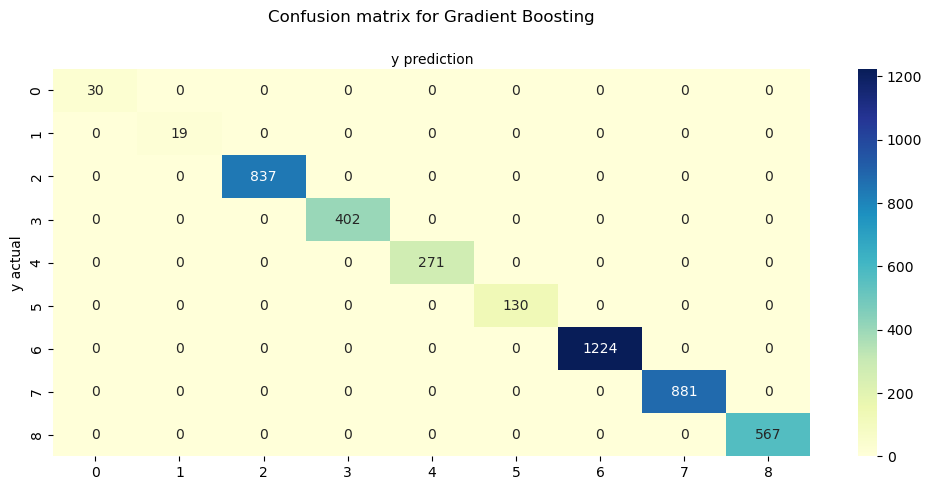

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       837
           3       1.00      1.00      1.00       402
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00      1224
           7       1.00      1.00      1.00       881
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------

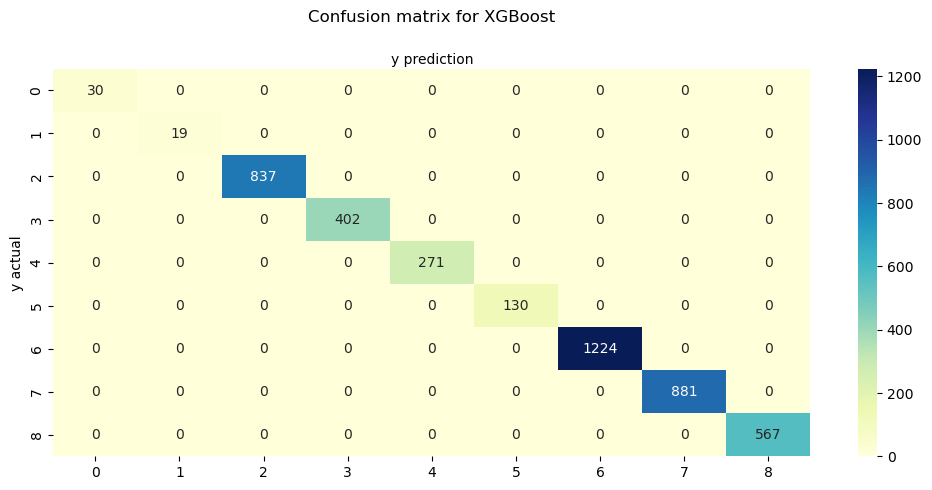

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       837
           3       1.00      1.00      1.00       402
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00      1224
           7       1.00      1.00      1.00       881
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  StandardScaler        0.999943       0.999541
1                  SVC    MinMaxScaler        1.000000       1.000000
2          Naive Bayes    MinMaxScaler        1.000000       1.000000
3                  KNN  StandardScaler        0.750860       0.603761
4        Decision Tree    MinMaxScaler        1.000000       1.000000
5        Random Forest    MinMaxScaler        0.904781       0.950241
6             AdaBoost    MinMaxScaler        0.896297       0.896583
7    Gradient Boosting    MinMaxScaler        1.000000       1.000000
8              XGBoost    MinMaxScaler        1.000000       1.000000

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10,kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=15,max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        
        classifier.fit(x_train_scaled, y_train)
        y_pred = classifier.predict(x_test_scaled)
        
        
        train_accuracy = accuracy_score(y_train, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()
    
    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)

    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)

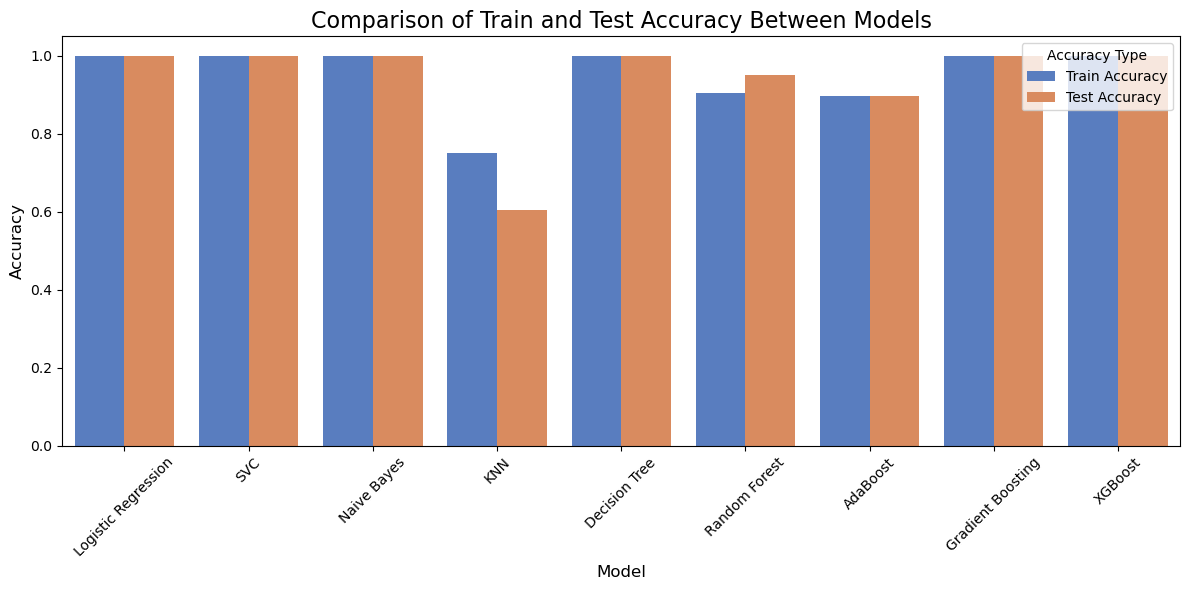

In [109]:

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


With 'Combined_disorder' as a target column


In [112]:
X =df_train.drop(columns=["Combined_disorder"])
Y = df_train[["Combined_disorder"]]

In [114]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9932
Test Accuracy: 0.9938
----------------------------------------
Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9997
Test Accuracy: 0.9993
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 0.9998
----------------------------------------
Confusion Matrix for Logistic Regression using StandardScaler:


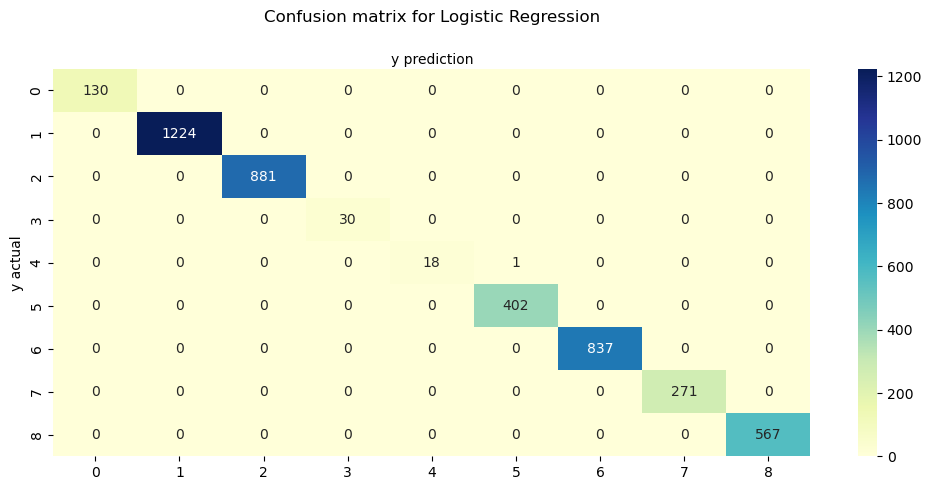

Classification Report for Logistic Regression using StandardScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      0.95      0.97        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      0.99      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


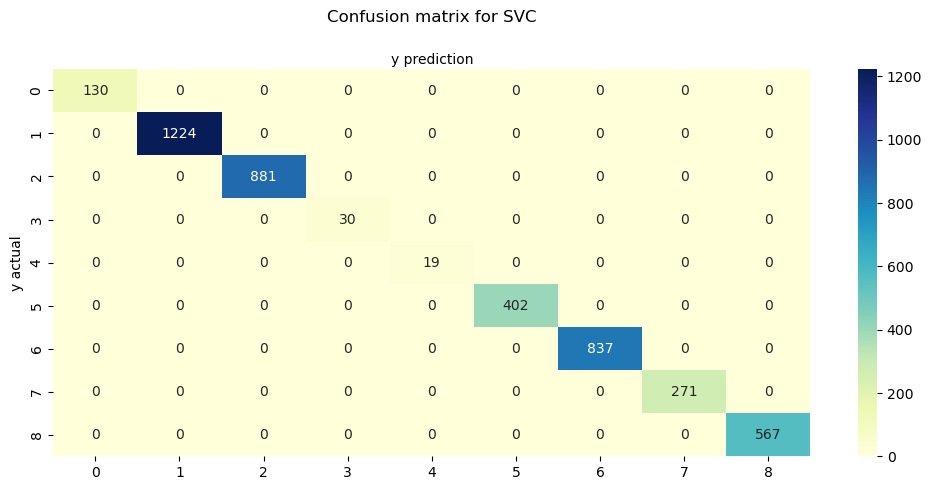

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


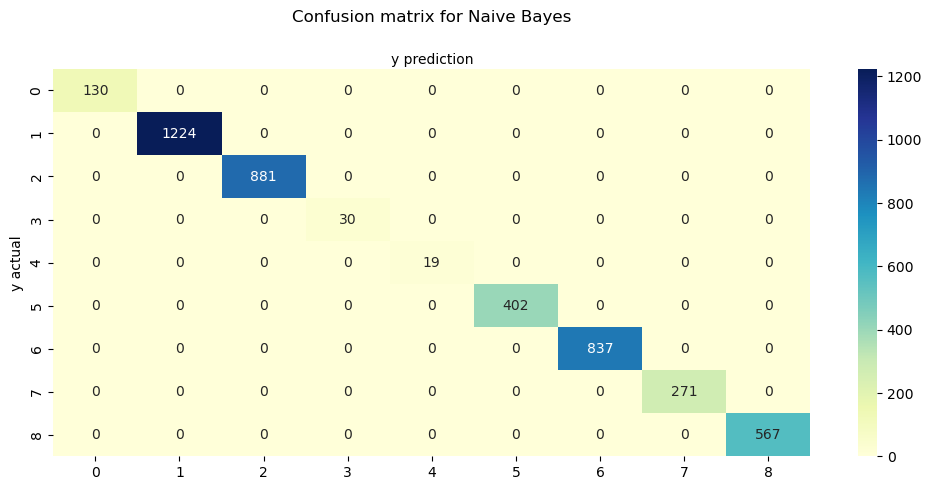

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.7299
Test Accuracy: 0.5719
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.7928
Test Accuracy: 0.6604
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.8054
Test Accuracy: 0.6797
----------------------------------------
Confusion Matrix for KNN using StandardScaler:


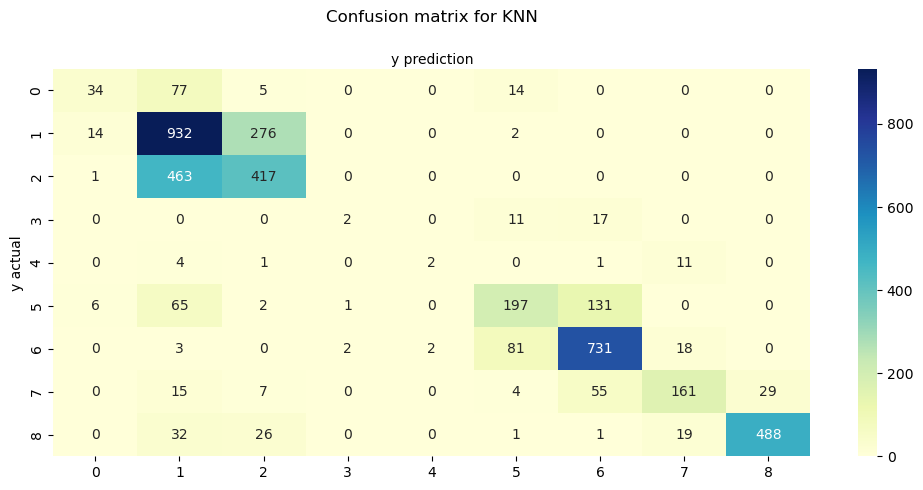

Classification Report for KNN using StandardScaler:
              precision    recall  f1-score   support

           0       0.62      0.26      0.37       130
           1       0.59      0.76      0.66      1224
           2       0.57      0.47      0.52       881
           3       0.40      0.07      0.11        30
           4       0.50      0.11      0.17        19
           5       0.64      0.49      0.55       402
           6       0.78      0.87      0.82       837
           7       0.77      0.59      0.67       271
           8       0.94      0.86      0.90       567

    accuracy                           0.68      4361
   macro avg       0.64      0.50      0.53      4361
weighted avg       0.68      0.68      0.67      4361

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------

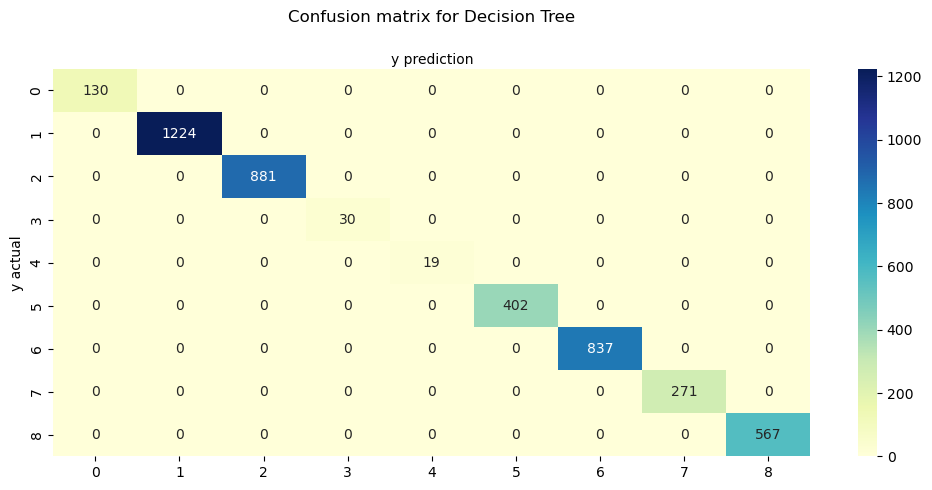

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9829
Test Accuracy: 0.9819
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9620
Test Accuracy: 0.9610
----------------------------------------
Using StandardScaler with Random Forest:
Train Accuracy: 0.9669
Test Accuracy: 0.9665
----------------------------------------
Confusion Matrix for Random Forest using MinMaxScaler:


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


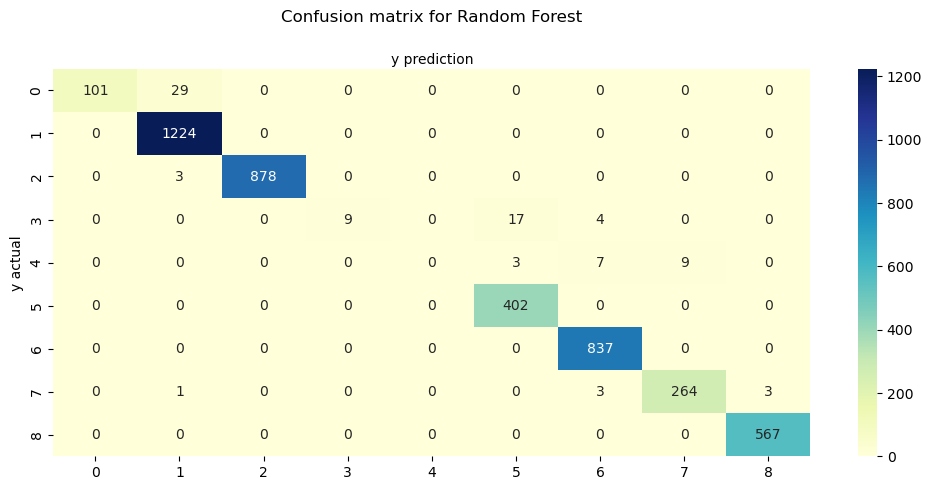

Classification Report for Random Forest using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87       130
           1       0.97      1.00      0.99      1224
           2       1.00      1.00      1.00       881
           3       1.00      0.30      0.46        30
           4       0.00      0.00      0.00        19
           5       0.95      1.00      0.98       402
           6       0.98      1.00      0.99       837
           7       0.97      0.97      0.97       271
           8       0.99      1.00      1.00       567

    accuracy                           0.98      4361
   macro avg       0.87      0.78      0.81      4361
weighted avg       0.98      0.98      0.98      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-pa

Using MinMaxScaler with AdaBoost:
Train Accuracy: 0.6094
Test Accuracy: 0.6095
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using RobustScaler with AdaBoost:
Train Accuracy: 0.6094
Test Accuracy: 0.6095
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using StandardScaler with AdaBoost:
Train Accuracy: 0.6094
Test Accuracy: 0.6095
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


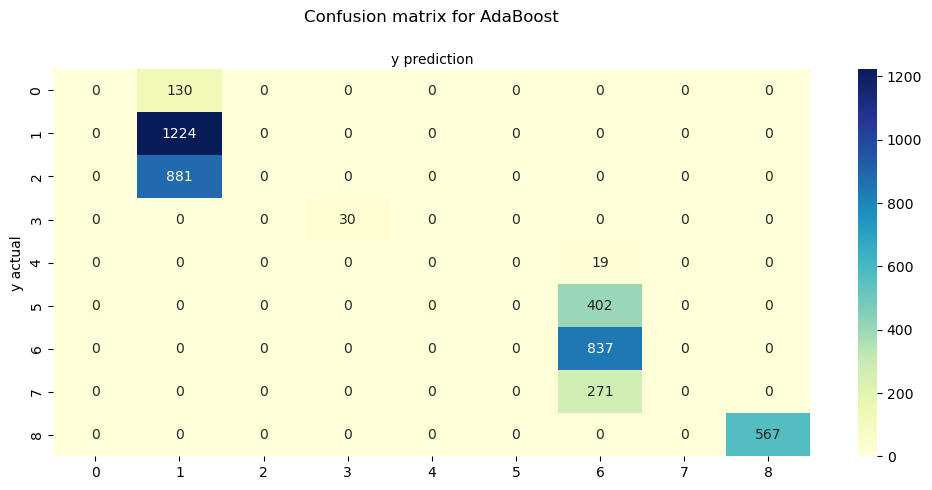

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.55      1.00      0.71      1224
           2       0.00      0.00      0.00       881
           3       1.00      1.00      1.00        30
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00       402
           6       0.55      1.00      0.71       837
           7       0.00      0.00      0.00       271
           8       1.00      1.00      1.00       567

    accuracy                           0.61      4361
   macro avg       0.34      0.44      0.38      4361
weighted avg       0.40      0.61      0.47      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-pa

Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


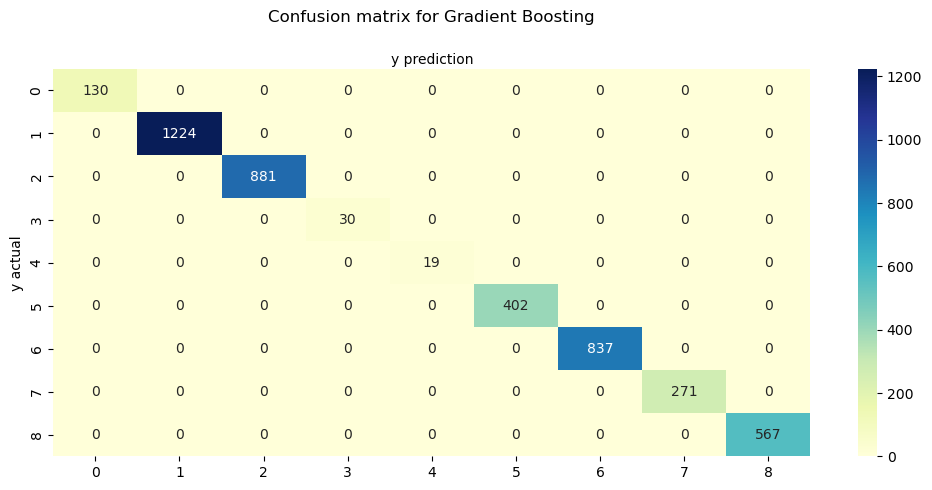

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361

Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------

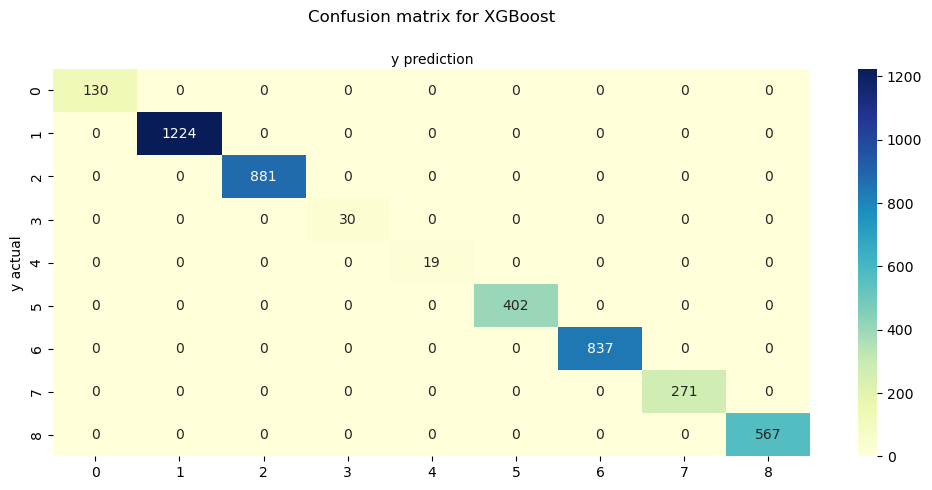

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression  StandardScaler        1.000000       0.999771
1                  SVC    MinMaxScaler        1.000000       1.000000
2          Naive Bayes    MinMaxScaler        1.000000       1.000000
3                  KNN  StandardScaler        0.805377       0.679661
4        Decision Tree    MinMaxScaler        1.000000       1.000000
5        Random Forest    MinMaxScaler        0.966865       0.981885
6             AdaBoost    MinMaxScaler        0.609436       0.609493
7    Gradient Boosting    MinMaxScaler        1.000000       1.000000
8              XGBoost    MinMaxScaler        1.000000       1.000000

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10,kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=15,max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        
        classifier.fit(x_train_scaled, y_train)
        y_pred = classifier.predict(x_test_scaled)
        
        
        train_accuracy = accuracy_score(y_train, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()
    
    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)

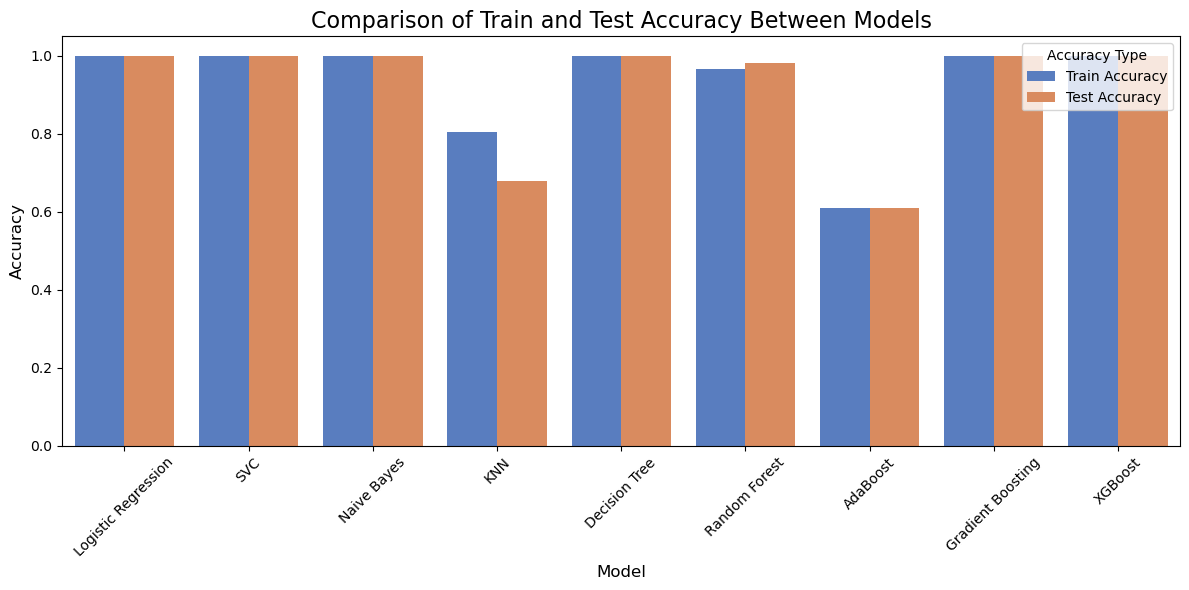

In [117]:
# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()


APPLYING SMOTE

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.9992
Test Accuracy: 0.9977
----------------------------------------
Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9999
Test Accuracy: 0.9998
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Logistic Regression:
Train Accuracy: 1.0000
Test Accuracy: 0.9998
----------------------------------------
Confusion Matrix for Logistic Regression using RobustScaler:


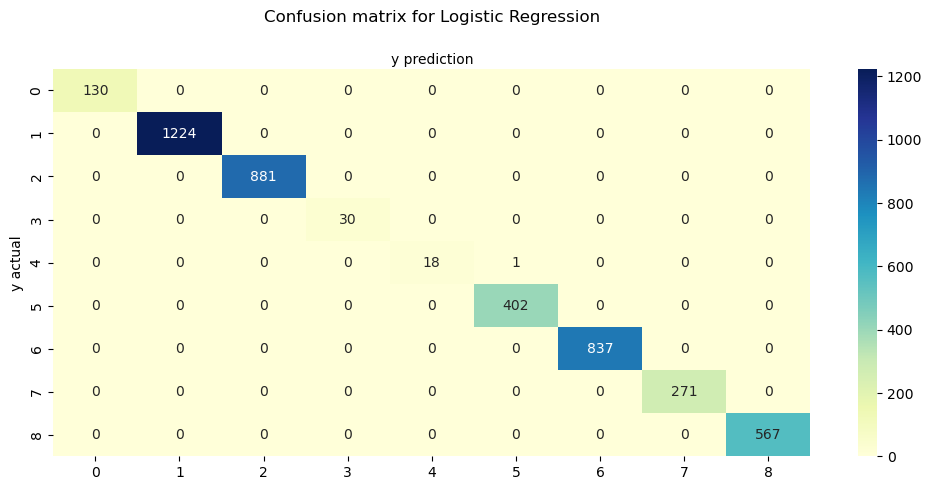

Classification Report for Logistic Regression using RobustScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      0.95      0.97        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      0.99      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with SVC:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for SVC using MinMaxScaler:


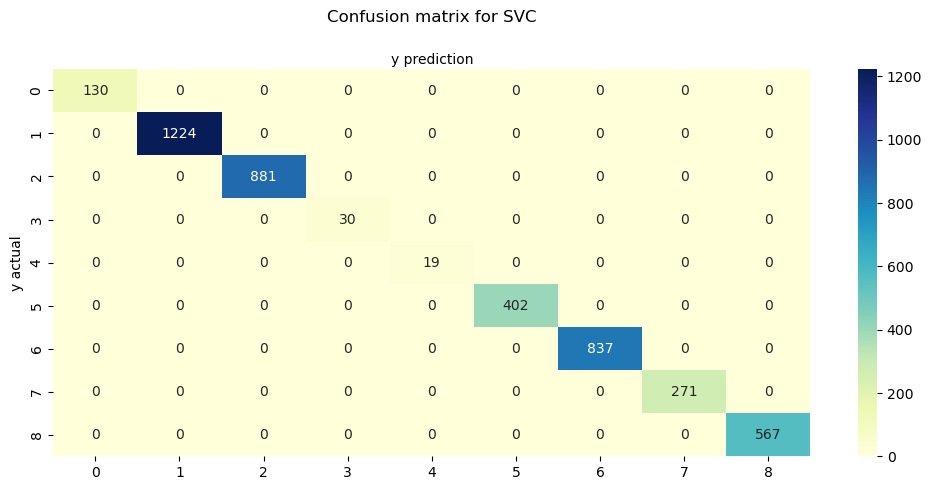

Classification Report for SVC using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using MinMaxScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Naive Bayes:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Naive Bayes using MinMaxScaler:


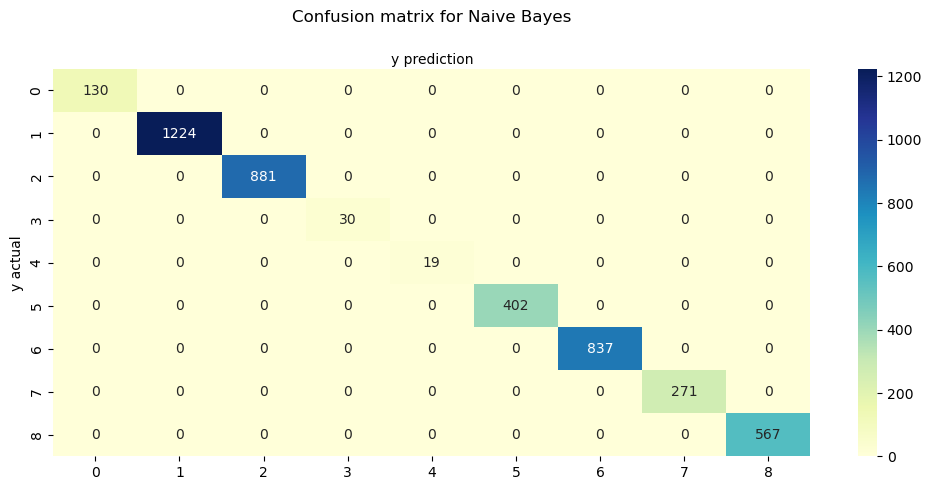

Classification Report for Naive Bayes using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using MinMaxScaler with KNN:
Train Accuracy: 0.8643
Test Accuracy: 0.5029
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using RobustScaler with KNN:
Train Accuracy: 0.9174
Test Accuracy: 0.5852
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Using StandardScaler with KNN:
Train Accuracy: 0.9118
Test Accuracy: 0.5967
----------------------------------------
Confusion Matrix for KNN using StandardScaler:


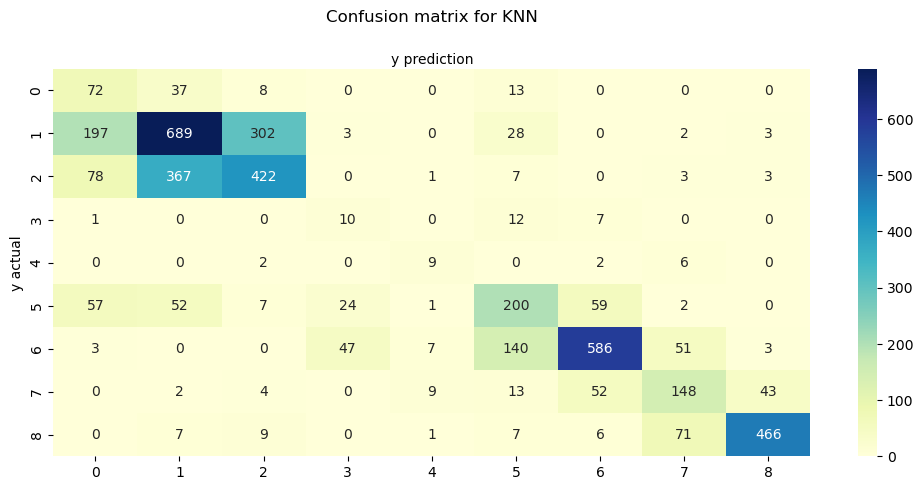

Classification Report for KNN using StandardScaler:
              precision    recall  f1-score   support

           0       0.18      0.55      0.27       130
           1       0.60      0.56      0.58      1224
           2       0.56      0.48      0.52       881
           3       0.12      0.33      0.18        30
           4       0.32      0.47      0.38        19
           5       0.48      0.50      0.49       402
           6       0.82      0.70      0.76       837
           7       0.52      0.55      0.53       271
           8       0.90      0.82      0.86       567

    accuracy                           0.60      4361
   macro avg       0.50      0.55      0.51      4361
weighted avg       0.64      0.60      0.61      4361

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using StandardScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Decision Tree using MinMaxScaler:


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


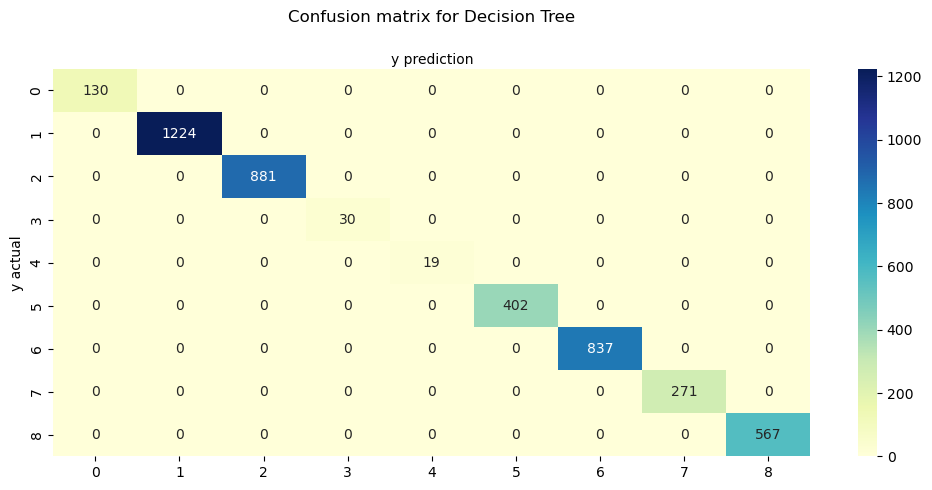

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using MinMaxScaler with Random Forest:
Train Accuracy: 0.9740
Test Accuracy: 0.9399
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using RobustScaler with Random Forest:
Train Accuracy: 0.9919
Test Accuracy: 0.9782
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using StandardScaler with Random Forest:
Train Accuracy: 0.9872
Test Accuracy: 0.9677
----------------------------------------
Confusion Matrix for Random Forest using RobustScaler:


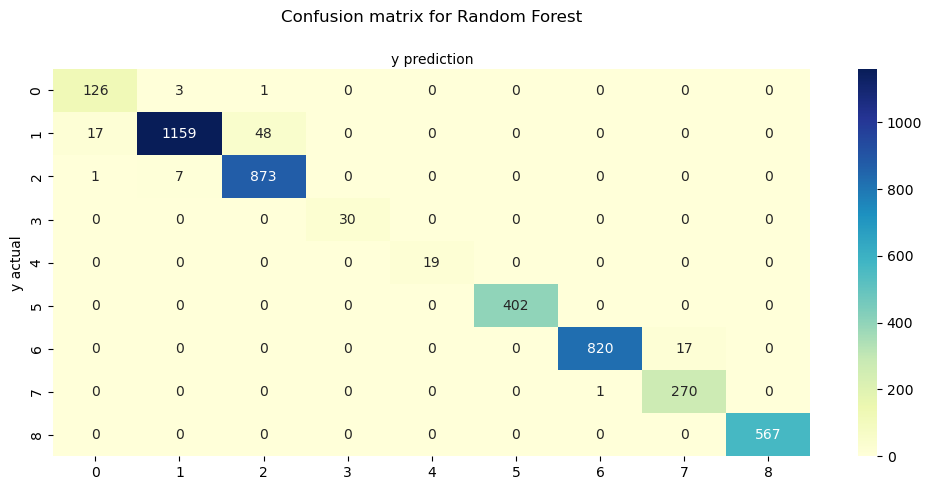

Classification Report for Random Forest using RobustScaler:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       130
           1       0.99      0.95      0.97      1224
           2       0.95      0.99      0.97       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      0.98      0.99       837
           7       0.94      1.00      0.97       271
           8       1.00      1.00      1.00       567

    accuracy                           0.98      4361
   macro avg       0.97      0.99      0.98      4361
weighted avg       0.98      0.98      0.98      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using MinMaxScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1667
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using RobustScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1667
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using StandardScaler with AdaBoost:
Train Accuracy: 0.3333
Test Accuracy: 0.1667
----------------------------------------
Confusion Matrix for AdaBoost using MinMaxScaler:


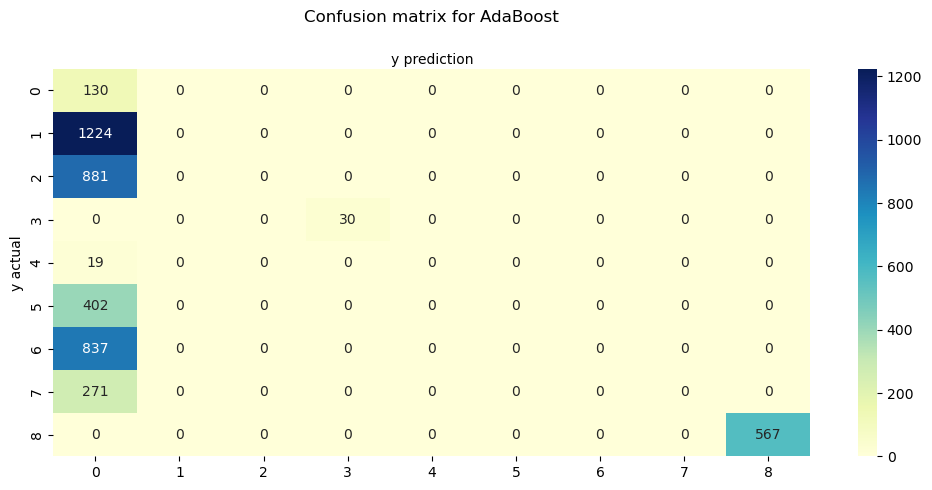

Classification Report for AdaBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       0.03      1.00      0.07       130
           1       0.00      0.00      0.00      1224
           2       0.00      0.00      0.00       881
           3       1.00      1.00      1.00        30
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00       402
           6       0.00      0.00      0.00       837
           7       0.00      0.00      0.00       271
           8       1.00      1.00      1.00       567

    accuracy                           0.17      4361
   macro avg       0.23      0.33      0.23      4361
weighted avg       0.14      0.17      0.14      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda33\Lib\site-pa

Using MinMaxScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using RobustScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using StandardScaler with Gradient Boosting:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for Gradient Boosting using MinMaxScaler:


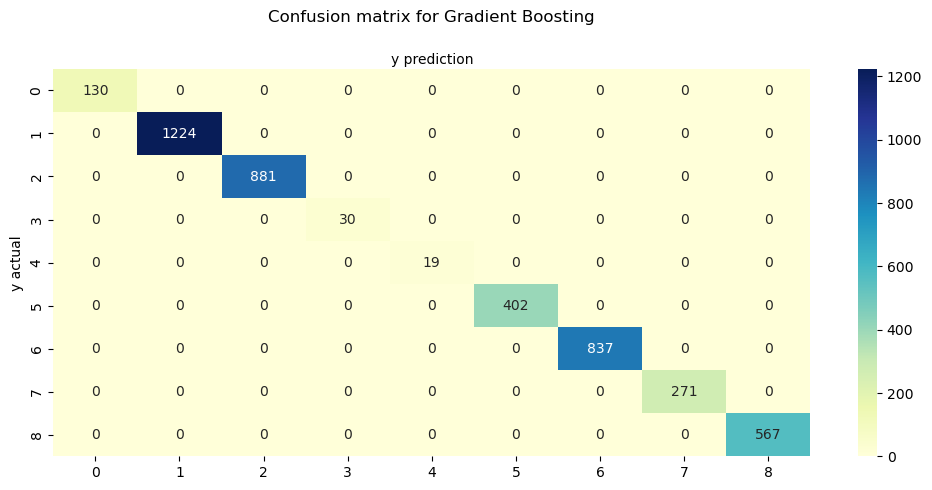

Classification Report for Gradient Boosting using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Using MinMaxScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Using RobustScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Using StandardScaler with XGBoost:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Confusion Matrix for XGBoost using MinMaxScaler:


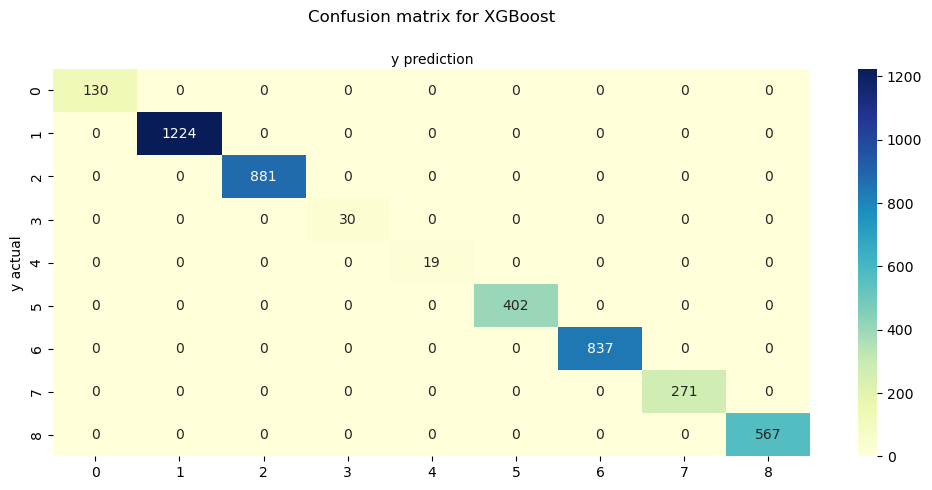

Classification Report for XGBoost using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00       881
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       402
           6       1.00      1.00      1.00       837
           7       1.00      1.00      1.00       271
           8       1.00      1.00      1.00       567

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



Model          Scaler  Train Accuracy  Test Accuracy
0  Logistic Regression    RobustScaler        0.999955       0.999771
1                  SVC    MinMaxScaler        1.000000       1.000000
2          Naive Bayes    MinMaxScaler        1.000000       1.000000
3                  KNN  StandardScaler        0.911760       0.596652
4        Decision Tree    MinMaxScaler        1.000000       1.000000
5        Random Forest    RobustScaler        0.987203       0.978216
6             AdaBoost    MinMaxScaler        0.333333       0.166705
7    Gradient Boosting    MinMaxScaler        1.000000       1.000000
8              XGBoost    MinMaxScaler        1.000000       1.000000

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(C=10),
    'SVC': SVC(C=10, kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),#
    'Random Forest': RandomForestClassifier(n_estimators=15, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

best_models = {}
accuracy_results = []

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy like 'median'
x_train_resampled = imputer.fit_transform(x_train_resampled)


for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None
    
    for scaler_name, scaler in scalers.items():
        
        x_train_scaled = scaler.fit_transform(x_train_resampled)
        x_test_scaled = scaler.transform(x_test)
        
        classifier.fit(x_train_scaled, y_train_resampled)
        y_pred = classifier.predict(x_test_scaled)
        
        train_accuracy = accuracy_score(y_train_resampled, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)
        
        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    
    best_models[classifier_name] = (best_model, best_scaler_name)
    
    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()

    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)
    
    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)

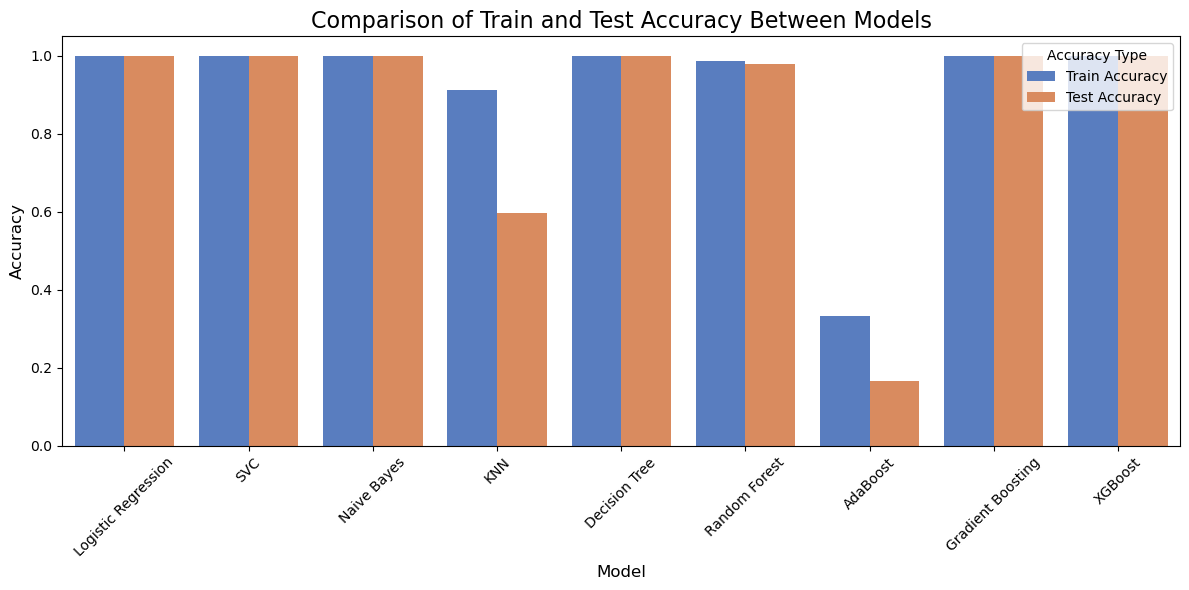

In [127]:

# Assuming the rest of your code (model training and accuracy calculations) is unchanged

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the dataframe for easy plotting (Train vs Test Accuracy comparison)
melted_accuracy_df = pd.melt(accuracy_df, id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                             var_name='Accuracy Type', value_name='Accuracy')

# Plot the comparison of train and test accuracy between models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=melted_accuracy_df, palette="muted")
plt.title('Comparison of Train and Test Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accuracy Type')
plt.tight_layout()
plt.show()

applying grid search with cross-validation

In [129]:
X =df_train.drop(columns=['Genetic Disorder'])
Y = df_train[['Genetic Disorder']]

In [130]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

In [131]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

param_grids = {
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'gamma': [0, 0.1, 0.2]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    }
}

grid_search_results = []

models = {
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for model_name, model in models.items():
    print(f'Performing Grid Search for {model_name}...')
    
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

    for scaler_name, scaler in scalers.items():
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        grid_search.fit(x_train_scaled, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Compute F1 scores
        y_train_pred = best_model.predict(x_train_scaled)
        y_test_pred = best_model.predict(x_test_scaled)
        
        train_f1_weighted = f1_score(y_train, y_train_pred, average='weighted')
        test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
        train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
        test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
        
        grid_search_results.append({
            'Model': model_name,
            'Scaler': scaler_name,
            'Best Params': best_params,
            'Best CV Weighted F1 Score': best_score,
            'Train Weighted F1 Score': train_f1_weighted,
            'Test Weighted F1 Score': test_f1_weighted,
            'Train Macro F1 Score': train_f1_macro,
            'Test Macro F1 Score': test_f1_macro
        })
        
        print(f'Best Params for {model_name} with {scaler_name}: {best_params}')
        print(f'Best CV Weighted F1 Score: {best_score:.4f}')
        print(f'Train Weighted F1 Score: {train_f1_weighted:.4f}')
        print(f'Test Weighted F1 Score: {test_f1_weighted:.4f}')
        print(f'Train Macro F1 Score: {train_f1_macro:.4f}')
        print(f'Test Macro F1 Score: {test_f1_macro:.4f}')
        print('-' * 40)

grid_search_df = pd.DataFrame(grid_search_results)
grid_search_df = grid_search_df.sort_values(by='Test Weighted F1 Score', ascending=False).reset_index(drop=True)
display(grid_search_df)

Performing Grid Search for AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Params for AdaBoost with MinMaxScaler: {'learning_rate': 0.01, 'n_estimators': 50}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Params for AdaBoost with RobustScaler: {'learning_rate': 0.01, 'n_estimators': 50}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda33\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Params for AdaBoost with StandardScaler: {'learning_rate': 0.01, 'n_estimators': 50}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Performing Grid Search for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for Gradient Boosting with MinMaxScaler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for Gradient Boosting with RobustScaler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for Gradient Boosting with StandardScaler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Performing Grid Search for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params for XGBoost with MinMaxScaler: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params for XGBoost with RobustScaler: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Tra

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for SVM with MinMaxScaler: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for SVM with RobustScaler: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for SVM with StandardScaler: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Performing Grid Search for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Params for Random Forest with MinMaxScaler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Params for Random Forest with RobustScaler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Params for Random Forest with StandardScaler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for Logistic Regression with MinMaxScaler: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for Logistic Regression with RobustScaler: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params for Logistic Regression with StandardScaler: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best CV Weighted F1 Score: 1.0000
Train Weighted F1 Score: 1.0000
Test Weighted F1 Score: 1.0000
Train Macro F1 Score: 1.0000
Test Macro F1 Score: 1.0000
----------------------------------------


Model          Scaler  \
0              AdaBoost    MinMaxScaler   
1              AdaBoost    RobustScaler   
2   Logistic Regression    RobustScaler   
3   Logistic Regression    MinMaxScaler   
4         Random Forest  StandardScaler   
5         Random Forest    RobustScaler   
6         Random Forest    MinMaxScaler   
7                   SVM  StandardScaler   
8                   SVM    RobustScaler   
9                   SVM    MinMaxScaler   
10              XGBoost  StandardScaler   
11              XGBoost    RobustScaler   
12              XGBoost    MinMaxScaler   
13    Gradient Boosting  StandardScaler   
14    Gradient Boosting    RobustScaler   
15    Gradient Boosting    MinMaxScaler   
16             AdaBoost  StandardScaler   
17  Logistic Regression  StandardScaler   

                                          Best Params  \
0         {'learning_rate': 0.01, 'n_estimators': 50}   
1         {'learning_rate': 0.01, 'n_estimators': 50}   
2       {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}   
3       {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}   
4   {'max_depth': None, 'min_samples_split': 2, 'n...   
5   {'max_depth': None, 'min_samples_split': 2, 'n...   
6   {'max_depth': None, 'min_samples_split': 2, 'n...   
7    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}   
8    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}   
9    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}   
10  {'gamma': 0, 'learning_rate': 0.01, 'max_depth...   
11  {'gamma': 0, 'learning_rate': 0.01, 'max_depth...   
12  {'gamma': 0, 'learning_rate': 0.01, 'max_depth...   
13  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
14  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
15  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
16        {'learning_rate': 0.01, 'n_estimators': 50}   
17     {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}   

    Best CV Weighted F1 Score  Train Weighted F1 Score  \
0                         1.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   
5                         1.0                      1.0   
6                         1.0                      1.0   
7                         1.0                      1.0   
8                         1.0                      1.0   
9                         1.0                      1.0   
10                        1.0                      1.0   
11                        1.0                      1.0   
12                        1.0                      1.0   
13                        1.0                      1.0   
14                        1.0                      1.0   
15                        1.0                      1.0   
16                        1.0                      1.0   
17                        1.0                      1.0   

    Test Weighted F1 Score  Train Macro F1 Score  Test Macro F1 Score  
0                      1.0                   1.0                  1.0  
1                      1.0                   1.0                  1.0  
2                      1.0                   1.0                  1.0  
3                      1.0                   1.0                  1.0  
4                      1.0                   1.0                  1.0  
5                      1.0                   1.0                  1.0  
6                      1.0                   1.0                  1.0  
7                      1.0                   1.0                  1.0  
8                      1.0                   1.0                  1.0  
9                      1.0                   1.0                  1.0  
10                     1.0                   1.0                  1.0  
11                     1.0                   1.0                  1.0  
12                     1.0                   1.0                  1.0  
13   

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



In [151]:
from transformers import pipeline

# Initialize a summarization pipeline
summarizer = pipeline("summarization", model="t5-small")

# Generate explanation
features = x_test.iloc[0].to_dict()
features_summary = " ".join([f"{key}: {value}" for key, value in features.items()])
explanation = summarizer(f"Explain the features {features_summary} for disorder prediction.", max_length=100)
print("Explanation:", explanation[0]["summary_text"])


Explanation: explain the features Patient Age: 11.0 Genes in mother's side: 1.0 Inherited from father: 0.0 Maternal gene: 0 Status: 1. Respiratory Rate (breaths/min): 1. Heart Rate: . 1.0 Heart Rate (rates/mine): 1.1 Follow-up: 1. Gender: 0.1 Birth defect (if applicable): 2.0 Place of birth: 1.2 Folic acid details (peri


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00       452
           2       1.00      1.00      1.00      1674

    accuracy                           1.00      4361
   macro avg       1.00      1.00      1.00      4361
weighted avg       1.00      1.00      1.00      4361



In [157]:
from transformers import pipeline

# Initialize a summarization pipeline
summarizer = pipeline("summarization", model="t5-small")

# Generate explanation
features = x_test.iloc[0].to_dict()
features_summary = " ".join([f"{key}: {value}" for key, value in features.items()])
explanation = summarizer(f"Explain the features {features_summary} for disorder prediction.", max_length=100)
print("Explanation:", explanation[0]["summary_text"])


Explanation: explain the features Patient Age: 11.0 Genes in mother's side: 1.0 Inherited from father: 0.0 Maternal gene: 0 Status: 1. Respiratory Rate (breaths/min): 1. Heart Rate: . 1.0 Heart Rate (rates/mine): 1.1 Follow-up: 1. Gender: 0.1 Birth defect (if applicable): 2.0 Place of birth: 1.2 Folic acid details (peri


In [167]:
import json

# Reset the indices of both x_train and y_train to ensure alignment
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Initialize an empty list to store the train data
train_data = []

# Iterate through each row in x_train
for index, row in x_train.iterrows():
    # Combine the columns of x_train into a single string
    input_text = " | ".join([f"{col}: {row[col]}" for col in x_train.columns])
    
    # Fetch the corresponding label from y_train
    output_text = y_train.iloc[index]  # This could be a Pandas Series or a single value
    
    # If it's a Series, extract the value (assuming it's a single label per row)
    if isinstance(output_text, pd.Series):
        output_text = output_text.iloc[0]
    
    # Ensure that all values are serializable by converting them to native types
    if isinstance(output_text, (np.int32, np.float32)):
        output_text = output_text.item()  # Convert to a native Python type (e.g., int or float)
    
    # Append the data in the required format
    train_data.append({"input": input_text, "output": output_text})

# Save the train_data in JSONL format
with open("train_data.jsonl", "w") as f:
    for item in train_data:
        f.write(json.dumps(item) + "\n")

print("Data has been saved in JSONL format.")


Data has been saved in JSONL format.


In [173]:
import subprocess

# Define the command as a list of arguments
command = [
    "python", "run_summarization.py",
    "--model_name_or_path", "t5-small",
    "--train_file", "train_data.jsonl",
    "--output_dir", "./output",
    "--do_train",
    "--max_source_length", "512",
    "--max_target_length", "128",
    "--per_device_train_batch_size", "4",
    "--learning_rate", "5e-5",
    "--num_train_epochs", "3"
]

# Run the command
subprocess.run(command)


CompletedProcess(args=['python', 'run_summarization.py', '--model_name_or_path', 't5-small', '--train_file', 'train_data.jsonl', '--output_dir', './output', '--do_train', '--max_source_length', '512', '--max_target_length', '128', '--per_device_train_batch_size', '4', '--learning_rate', '5e-5', '--num_train_epochs', '3'], returncode=2)

In [177]:
# Example anomalies
anomalies = x_test[(x_test["Maternal gene"] == "Unknown") & (x_test["Inherited from father"] == "Yes")]

# LLM explanation
for index, row in anomalies.iterrows():
    row_summary = " | ".join([f"{col}: {row[col]}" for col in X.columns])
    explanation = summarizer(f"Explain anomaly in {row_summary}.", max_length=100)
    print("Anomaly Explanation:", explanation[0]["summary_text"])


In [179]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Initialize model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

# Multi-modal input
structured_input = " | ".join([f"{col}: {x_test.iloc[0][col]}" for col in X.columns])
text_input = "Patient reported symptoms of fatigue and nausea."
multi_modal_input = f"Structured Data: {structured_input}. Notes: {text_input}"

# Prediction
input_ids = tokenizer(multi_modal_input, return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print("Prediction:", tokenizer.decode(outputs[0], skip_special_tokens=True))


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--google--flan-t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Prediction: 1.0 | Symptoms: 1.0 | Symptoms: 1.0 | Symptom


In [193]:
print(df_test.columns)

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S